In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dpat.utils.evaluation import compute_mean_and_confidence_interval
import scipy.stats as st
from itertools import combinations, combinations_with_replacement

In [2]:
# TESTING
experiments = {
    "imagenet+varmil": {
        0: {"target": [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1], "prediction": [0.9515714645385742, 0.9917844533920288, 0.978024959564209, 0.8983545899391174, 0.9897540211677551, 0.9524157047271729, 0.9865372180938721, 0.9996869564056396, 0.5558533072471619, 0.621216893196106, 0.9898202419281006, 0.8137208819389343, 0.8219476938247681, 0.8311947584152222, 0.8169826865196228, 0.8718218803405762, 0.3469066619873047, 0.3934204876422882, 0.24288824200630188, 0.9675687551498413, 0.9446275234222412, 0.8008922338485718], "auc": 0.8095237612724304, "prauc": 0.8204959630966187, "prgauc": 0.6476190476190476, "prcurve": {"precision": [0.8823529481887817, 0.875, 0.8666666746139526, 0.8571428656578064, 0.8461538553237915, 0.8333333134651184, 0.9090909361839294, 0.8999999761581421, 0.8888888955116272, 0.875, 0.8571428656578064, 0.8333333134651184, 0.800000011920929, 0.75, 0.6666666865348816, 0.5, 0.0, 1.0], "recall": [1.0, 0.9333333373069763, 0.8666666746139526, 0.800000011920929, 0.7333333492279053, 0.6666666865348816, 0.6666666865348816, 0.6000000238418579, 0.5333333611488342, 0.46666666865348816, 0.4000000059604645, 0.3333333432674408, 0.2666666805744171, 0.20000000298023224, 0.13333334028720856, 0.06666667014360428, 0.0, 0.0], "thresholds": [0.8008922338485718, 0.8137208819389343, 0.8169826865196228, 0.8219476938247681, 0.8311947584152222, 0.8718218803405762, 0.8983545899391174, 0.9446275234222412, 0.9515714645385742, 0.9524157047271729, 0.9675687551498413, 0.978024959564209, 0.9865372180938721, 0.9897540211677551, 0.9898202419281006, 0.9917844533920288, 0.9996869564056396]}, "prgcurve": {"precision_gain": [-1.1428571428571428, -0.0714285714285714, 0.2857142857142858, 0.4642857142857143, 0.5714285714285714, 0.6428571428571429, 0.6938775510204083, 0.7321428571428572, 0.7619047619047619, 0.7857142857142857, 0.5714285714285714, 0.5809523809523809, 0.6103896103896104, 0.6428571428571429, 0.6703296703296704, 0.6938775510204083, 0.7142857142857143, 0.5714285714285714, 0.4285714285714286, 0.2857142857142858, 0.1428571428571428, 0.0], "recall_gain": [-29.0, -12.928571428571429, -7.571428571428571, -4.892857142857142, -3.2857142857142856, -2.2142857142857144, -1.4489795918367343, -0.875, -0.4285714285714284, -0.0714285714285714, -0.0714285714285714, 0.0, 0.22077922077922074, 0.4642857142857143, 0.6703296703296704, 0.8469387755102041, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, "roccurve": {"tpr": [0.0, 0.0, 0.06666667014360428, 0.13333334028720856, 0.20000000298023224, 0.2666666805744171, 0.3333333432674408, 0.4000000059604645, 0.46666666865348816, 0.5333333611488342, 0.6000000238418579, 0.6666666865348816, 0.6666666865348816, 0.7333333492279053, 0.800000011920929, 0.8666666746139526, 0.9333333373069763, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "fpr": [0.0, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.2857142984867096, 0.2857142984867096, 0.2857142984867096, 0.2857142984867096, 0.2857142984867096, 0.2857142984867096, 0.4285714328289032, 0.5714285969734192, 0.7142857313156128, 0.8571428656578064, 1.0], "thresholds": [1.0, 0.9996869564056396, 0.9917844533920288, 0.9898202419281006, 0.9897540211677551, 0.9865372180938721, 0.978024959564209, 0.9675687551498413, 0.9524157047271729, 0.9515714645385742, 0.9446275234222412, 0.8983545899391174, 0.8718218803405762, 0.8311947584152222, 0.8219476938247681, 0.8169826865196228, 0.8137208819389343, 0.8008922338485718, 0.621216893196106, 0.5558533072471619, 0.3934204876422882, 0.3469066619873047, 0.24288824200630188]}, "accuracy": 0.8181818127632141},
        1: {"target": [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], "prediction": [0.9757328033447266, 0.930895984172821, 0.9769636988639832, 0.9907825589179993, 0.9604234099388123, 0.18157674372196198, 0.5045262575149536, 0.0005202491884119809, 0.9075421094894409, 0.7953799962997437, 0.807174801826477, 0.27503377199172974, 0.35423505306243896, 0.9900496006011963, 0.8648311495780945, 0.9209475517272949, 0.0012956064892932773, 0.47457703948020935, 0.5285406112670898, 0.9214591979980469, 7.352445408059793e-08, 0.0009639270720072091, 0.4392630457878113, 0.21868346631526947, 3.878977076965384e-05, 0.9860610961914062, 0.061515938490629196, 0.9829791188240051, 0.6818742752075195, 0.9801585078239441, 0.9604529142379761, 0.9864147305488586, 0.8868494629859924, 0.9995524287223816, 0.7753546833992004, 0.8849149346351624, 0.7859625220298767, 0.9884386658668518, 0.9582912921905518], "auc": 0.20710060000419617, "prauc": 0.5662190914154053, "prgauc": -0.19483690912262336, "prcurve": {"precision": [0.6666666865348816, 0.6578947305679321, 0.6486486196517944, 0.6388888955116272, 0.6285714507102966, 0.6176470518112183, 0.6363636255264282, 0.625, 0.6129032373428345, 0.6000000238418579, 0.5862069129943848, 0.5714285969734192, 0.5555555820465088, 0.5384615659713745, 0.5199999809265137, 0.5416666865348816, 0.52173912525177, 0.5, 0.4761904776096344, 0.44999998807907104, 0.42105263471603394, 0.3888888955116272, 0.4117647111415863, 0.375, 0.3333333432674408, 0.2857142984867096, 0.3076923191547394, 0.25, 0.27272728085517883, 0.30000001192092896, 0.3333333432674408, 0.375, 0.4285714328289032, 0.5, 0.6000000238418579, 0.75, 0.6666666865348816, 0.5, 1.0, 1.0], "recall": [1.0, 0.9615384340286255, 0.9230769276618958, 0.8846153616905212, 0.8461538553237915, 0.807692289352417, 0.807692289352417, 0.7692307829856873, 0.7307692170143127, 0.692307710647583, 0.6538461446762085, 0.6153846383094788, 0.5769230723381042, 0.5384615659713745, 0.5, 0.5, 0.4615384638309479, 0.42307692766189575, 0.38461539149284363, 0.3461538553237915, 0.3076923191547394, 0.26923078298568726, 0.26923078298568726, 0.23076923191547394, 0.19230769574642181, 0.1538461595773697, 0.1538461595773697, 0.11538461595773697, 0.11538461595773697, 0.11538461595773697, 0.11538461595773697, 0.11538461595773697, 0.11538461595773697, 0.11538461595773697, 0.11538461595773697, 0.11538461595773697, 0.07692307978868484, 0.03846153989434242, 0.03846153989434242, 0.0], "thresholds": [7.352445408059793e-08, 3.878977076965384e-05, 0.0005202491884119809, 0.0009639270720072091, 0.0012956064892932773, 0.061515938490629196, 0.18157674372196198, 0.21868346631526947, 0.27503377199172974, 0.35423505306243896, 0.4392630457878113, 0.47457703948020935, 0.5045262575149536, 0.5285406112670898, 0.6818742752075195, 0.7753546833992004, 0.7859625220298767, 0.7953799962997437, 0.807174801826477, 0.8648311495780945, 0.8849149346351624, 0.8868494629859924, 0.9075421094894409, 0.9209475517272949, 0.9214591979980469, 0.930895984172821, 0.9582912921905518, 0.9604234099388123, 0.9604529142379761, 0.9757328033447266, 0.9769636988639832, 0.9801585078239441, 0.9829791188240051, 0.9860610961914062, 0.9864147305488586, 0.9884386658668518, 0.9900496006011963, 0.9907825589179993, 0.9995524287223816]}, "prgcurve": {"precision_gain": [1.0, -1.0, 0.0, 0.33333333333333337, -0.33333333333333326, -1.0, -1.6666666666666665, -2.3333333333333335, -3.0, -3.666666666666667, -4.333333333333333, -5.0, -3.5, -4.0, -3.0, -2.3333333333333335, -1.8571428571428572, -2.142857142857143, -1.75, -1.4444444444444446, -1.2000000000000002, -1.0, -0.8333333333333333, -0.6923076923076923, -0.8461538461538463, -0.7142857142857142, -0.6000000000000001, -0.5, -0.41176470588235303, -0.3846153846153848, -0.33333333333333326, -0.26315789473684204, -0.19999999999999996, -0.1428571428571428, -0.23809523809523814, -0.18181818181818188, -0.13043478260869557, -0.08333333333333326, -0.040000000000000036, 0.0], "recall_gain": [-49.0, -49.0, -23.0, -14.333333333333334, -14.333333333333334, -14.333333333333334, -14.333333333333334, -14.333333333333334, -14.333333333333334, -14.333333333333334, -14.333333333333334, -14.333333333333334, -10.0, -10.0, -7.4, -5.666666666666667, -4.428571428571429, -4.428571428571429, -3.5, -2.7777777777777777, -2.2, -1.727272727272727, -1.3333333333333335, -1.0, -1.0, -0.7142857142857142, -0.46666666666666656, -0.25, -0.05882352941176472, 0.0, 0.11111111111111116, 0.26315789473684215, 0.4, 0.5238095238095238, 0.5238095238095238, 0.6363636363636364, 0.7391304347826086, 0.8333333333333334, 0.92, 1.0]}, "roccurve": {"tpr": [0.0, 0.03846153989434242, 0.03846153989434242, 0.07692307978868484, 0.11538461595773697, 0.11538461595773697, 0.11538461595773697, 0.11538461595773697, 0.11538461595773697, 0.11538461595773697, 0.11538461595773697, 0.11538461595773697, 0.11538461595773697, 0.1538461595773697, 0.1538461595773697, 0.19230769574642181, 0.23076923191547394, 0.26923078298568726, 0.26923078298568726, 0.3076923191547394, 0.3461538553237915, 0.38461539149284363, 0.42307692766189575, 0.4615384638309479, 0.5, 0.5, 0.5384615659713745, 0.5769230723381042, 0.6153846383094788, 0.6538461446762085, 0.692307710647583, 0.7307692170143127, 0.7692307829856873, 0.807692289352417, 0.807692289352417, 0.8461538553237915, 0.8846153616905212, 0.9230769276618958, 0.9615384340286255, 1.0], "fpr": [0.0, 0.0, 0.07692307978868484, 0.07692307978868484, 0.07692307978868484, 0.1538461595773697, 0.23076923191547394, 0.3076923191547394, 0.38461539149284363, 0.4615384638309479, 0.5384615659713745, 0.6153846383094788, 0.692307710647583, 0.692307710647583, 0.7692307829856873, 0.7692307829856873, 0.7692307829856873, 0.7692307829856873, 0.8461538553237915, 0.8461538553237915, 0.8461538553237915, 0.8461538553237915, 0.8461538553237915, 0.8461538553237915, 0.8461538553237915, 0.9230769276618958, 0.9230769276618958, 0.9230769276618958, 0.9230769276618958, 0.9230769276618958, 0.9230769276618958, 0.9230769276618958, 0.9230769276618958, 0.9230769276618958, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "thresholds": [1.0, 0.9995524287223816, 0.9907825589179993, 0.9900496006011963, 0.9884386658668518, 0.9864147305488586, 0.9860610961914062, 0.9829791188240051, 0.9801585078239441, 0.9769636988639832, 0.9757328033447266, 0.9604529142379761, 0.9604234099388123, 0.9582912921905518, 0.930895984172821, 0.9214591979980469, 0.9209475517272949, 0.9075421094894409, 0.8868494629859924, 0.8849149346351624, 0.8648311495780945, 0.807174801826477, 0.7953799962997437, 0.7859625220298767, 0.7753546833992004, 0.6818742752075195, 0.5285406112670898, 0.5045262575149536, 0.47457703948020935, 0.4392630457878113, 0.35423505306243896, 0.27503377199172974, 0.21868346631526947, 0.18157674372196198, 0.061515938490629196, 0.0012956064892932773, 0.0009639270720072091, 0.0005202491884119809, 3.878977076965384e-05, 7.352445408059793e-08]}, "accuracy": 0.3589743673801422},
        2: {"target": [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], "prediction": [0.06011761352419853, 0.05962790176272392, 0.036293983459472656, 0.94832843542099, 0.035690709948539734, 0.04396199807524681, 0.9118323922157288, 0.9251152873039246, 0.8740696310997009, 0.9204380512237549, 0.8989813327789307, 0.5484778881072998, 0.9244933128356934, 0.9998489618301392, 0.7546535134315491, 0.5488947033882141, 0.8873556852340698, 0.8602335453033447, 0.8439661264419556, 0.7160725593566895], "auc": 0.8681318163871765, "prauc": 0.8652644157409668, "prgauc": 0.8186813186813188, "prcurve": {"precision": [0.9285714030265808, 0.9230769276618958, 0.9166666865348816, 0.9090909361839294, 0.8999999761581421, 0.8888888955116272, 0.875, 0.8571428656578064, 0.8333333134651184, 0.800000011920929, 0.75, 0.6666666865348816, 0.5, 1.0, 1.0], "recall": [1.0, 0.9230769276618958, 0.8461538553237915, 0.7692307829856873, 0.692307710647583, 0.6153846383094788, 0.5384615659713745, 0.4615384638309479, 0.38461539149284363, 0.3076923191547394, 0.23076923191547394, 0.1538461595773697, 0.07692307978868484, 0.07692307978868484, 0.0], "thresholds": [0.5488947033882141, 0.7160725593566895, 0.7546535134315491, 0.8439661264419556, 0.8602335453033447, 0.8740696310997009, 0.8873556852340698, 0.8989813327789307, 0.9118323922157288, 0.9204380512237549, 0.9244933128356934, 0.9251152873039246, 0.94832843542099, 0.9998489618301392]}, "prgcurve": {"precision_gain": [1.0, -0.8571428571428572, 0.0714285714285714, 0.38095238095238093, 0.5357142857142857, 0.6285714285714286, 0.6904761904761905, 0.7346938775510203, 0.7678571428571428, 0.7802197802197802, 0.7936507936507937, 0.8142857142857143, 0.8311688311688312, 0.8452380952380952, 0.8571428571428571, 0.7142857142857142, 0.5714285714285714, 0.4285714285714285, 0.2857142857142857, 0.1428571428571428, 0.0], "recall_gain": [-21.285714285714285, -21.285714285714285, -9.214285714285715, -5.190476190476191, -3.178571428571429, -1.9714285714285715, -1.166666666666667, -0.5918367346938775, -0.1607142857142858, 0.0, 0.17460317460317465, 0.44285714285714284, 0.6623376623376623, 0.8452380952380952, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, "roccurve": {"tpr": [0.0, 0.07692307978868484, 0.07692307978868484, 0.1538461595773697, 0.23076923191547394, 0.3076923191547394, 0.38461539149284363, 0.4615384638309479, 0.5384615659713745, 0.6153846383094788, 0.692307710647583, 0.7692307829856873, 0.8461538553237915, 0.9230769276618958, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "fpr": [0.0, 0.0, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.2857142984867096, 0.4285714328289032, 0.5714285969734192, 0.7142857313156128, 0.8571428656578064, 1.0], "thresholds": [1.0, 0.9998489618301392, 0.94832843542099, 0.9251152873039246, 0.9244933128356934, 0.9204380512237549, 0.9118323922157288, 0.8989813327789307, 0.8873556852340698, 0.8740696310997009, 0.8602335453033447, 0.8439661264419556, 0.7546535134315491, 0.7160725593566895, 0.5488947033882141, 0.5484778881072998, 0.06011761352419853, 0.05962790176272392, 0.04396199807524681, 0.036293983459472656, 0.035690709948539734]}, "accuracy": 0.8999999761581421},
        3: {"target": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], "prediction": [0.9603644609451294, 0.9221492409706116, 0.9771260023117065, 0.9765937328338623, 0.9476212859153748, 0.986335039138794, 0.9999912977218628, 0.9875920414924622, 0.9810940027236938, 0.9859058856964111, 0.9156485795974731, 0.9857368469238281, 0.9243840575218201, 0.8933206796646118, 0.5971847772598267, 0.923241376876831, 0.9447835087776184, 0.7483704686164856, 0.8308413624763489, 0.8619170188903809, 0.9963982105255127, 0.8548054695129395, 0.5523123145103455, 0.4098251461982727, 0.9998327493667603, 0.27172988653182983, 0.8067811131477356, 0.9999160766601562, 0.30253511667251587], "auc": 0.5700000524520874, "prauc": 0.8980891704559326, "prgauc": -0.07999999999999996, "prcurve": {"precision": [0.8620689511299133, 0.8571428656578064, 0.8518518805503845, 0.8461538553237915, 0.8399999737739563, 0.8333333134651184, 0.8260869383811951, 0.8181818127632141, 0.8571428656578064, 0.8999999761581421, 0.9473684430122375, 0.9444444179534912, 0.9411764740943909, 0.9375, 0.9333333373069763, 0.9285714030265808, 0.9230769276618958, 0.9166666865348816, 0.9090909361839294, 0.8999999761581421, 0.8888888955116272, 0.875, 0.8571428656578064, 0.8333333134651184, 0.800000011920929, 0.75, 1.0, 1.0, 1.0, 1.0], "recall": [1.0, 0.9599999785423279, 0.9200000166893005, 0.8799999952316284, 0.8399999737739563, 0.800000011920929, 0.7599999904632568, 0.7200000286102295, 0.7200000286102295, 0.7200000286102295, 0.7200000286102295, 0.6800000071525574, 0.6399999856948853, 0.6000000238418579, 0.5600000023841858, 0.5199999809265137, 0.47999998927116394, 0.4399999976158142, 0.4000000059604645, 0.36000001430511475, 0.3199999928474426, 0.2800000011920929, 0.23999999463558197, 0.20000000298023224, 0.1599999964237213, 0.11999999731779099, 0.11999999731779099, 0.07999999821186066, 0.03999999910593033, 0.0], "thresholds": [0.27172988653182983, 0.30253511667251587, 0.4098251461982727, 0.5523123145103455, 0.5971847772598267, 0.7483704686164856, 0.8067811131477356, 0.8308413624763489, 0.8548054695129395, 0.8619170188903809, 0.8933206796646118, 0.9156485795974731, 0.9221492409706116, 0.923241376876831, 0.9243840575218201, 0.9447835087776184, 0.9476212859153748, 0.9603644609451294, 0.9765937328338623, 0.9771260023117065, 0.9810940027236938, 0.9857368469238281, 0.9859058856964111, 0.986335039138794, 0.9875920414924622, 0.9963982105255127, 0.9998327493667603, 0.9999160766601562, 0.9999912977218628]}, "prgcurve": {"precision_gain": [1.0, 1.0, 1.0, -1.083333333333333, -0.5625, -0.25, -0.04166666666666652, 0.1071428571428572, 0.21875, 0.3055555555555556, 0.375, 0.43181818181818177, 0.47916666666666674, 0.5192307692307692, 0.5535714285714286, 0.5833333333333333, 0.609375, 0.6323529411764706, 0.6527777777777778, 0.3055555555555556, -0.04166666666666652, -0.38888888888888884, -0.3157894736842104, -0.25, -0.19047619047619047, -0.15999999999999992, -0.13636363636363646, -0.08695652173913038, -0.04166666666666652, 0.0], "recall_gain": [-149.0, -70.875, -44.83333333333333, -44.83333333333333, -31.8125, -24.0, -18.791666666666664, -15.071428571428573, -12.28125, -10.11111111111111, -8.375, -6.954545454545454, -5.770833333333333, -4.769230769230769, -3.9107142857142856, -3.166666666666666, -2.515625, -1.941176470588235, -1.4305555555555558, -1.4305555555555558, -1.4305555555555558, -1.4305555555555558, -0.9736842105263157, -0.5625, -0.19047619047619047, 0.0, 0.14772727272727282, 0.4565217391304348, 0.7395833333333334, 1.0]}, "roccurve": {"tpr": [0.0, 0.03999999910593033, 0.07999999821186066, 0.11999999731779099, 0.11999999731779099, 0.1599999964237213, 0.20000000298023224, 0.23999999463558197, 0.2800000011920929, 0.3199999928474426, 0.36000001430511475, 0.4000000059604645, 0.4399999976158142, 0.47999998927116394, 0.5199999809265137, 0.5600000023841858, 0.6000000238418579, 0.6399999856948853, 0.6800000071525574, 0.7200000286102295, 0.7200000286102295, 0.7200000286102295, 0.7200000286102295, 0.7599999904632568, 0.800000011920929, 0.8399999737739563, 0.8799999952316284, 0.9200000166893005, 0.9599999785423279, 1.0], "fpr": [0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "thresholds": [1.0, 0.9999912977218628, 0.9999160766601562, 0.9998327493667603, 0.9963982105255127, 0.9875920414924622, 0.986335039138794, 0.9859058856964111, 0.9857368469238281, 0.9810940027236938, 0.9771260023117065, 0.9765937328338623, 0.9603644609451294, 0.9476212859153748, 0.9447835087776184, 0.9243840575218201, 0.923241376876831, 0.9221492409706116, 0.9156485795974731, 0.8933206796646118, 0.8619170188903809, 0.8548054695129395, 0.8308413624763489, 0.8067811131477356, 0.7483704686164856, 0.5971847772598267, 0.5523123145103455, 0.4098251461982727, 0.30253511667251587, 0.27172988653182983]}, "accuracy": 0.7241379022598267},
        4: {"target": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], "prediction": [0.9616909623146057, 0.8952579498291016, 0.9672157168388367, 0.9890788197517395, 0.9797326326370239, 0.9554957747459412, 0.952247142791748, 0.94264817237854, 0.9162807464599609, 0.9982123374938965, 0.80272376537323, 0.8745946288108826, 0.8889358639717102, 0.9385932683944702, 0.9031999707221985, 0.8218041658401489, 0.943365216255188, 0.8913663029670715, 0.9686221480369568, 0.7800671458244324, 0.7862381935119629, 0.8959627747535706, 0.7289262413978577, 0.8211989402770996], "auc": 0.4842105209827423, "prauc": 0.8317945599555969, "prgauc": -0.13157894736842107, "prcurve": {"precision": [0.7916666865348816, 0.782608687877655, 0.7727272510528564, 0.761904776096344, 0.75, 0.7368420958518982, 0.7777777910232544, 0.7647058963775635, 0.75, 0.800000011920929, 0.7857142686843872, 0.7692307829856873, 0.8333333134651184, 0.8181818127632141, 0.800000011920929, 0.7777777910232544, 0.875, 0.8571428656578064, 0.8333333134651184, 0.800000011920929, 0.75, 1.0, 1.0, 1.0, 1.0], "recall": [1.0, 0.9473684430122375, 0.8947368264198303, 0.8421052694320679, 0.7894737124443054, 0.7368420958518982, 0.7368420958518982, 0.6842105388641357, 0.6315789222717285, 0.6315789222717285, 0.5789473652839661, 0.5263158082962036, 0.5263158082962036, 0.4736842215061188, 0.42105263471603394, 0.3684210479259491, 0.3684210479259491, 0.31578946113586426, 0.2631579041481018, 0.21052631735801697, 0.15789473056793213, 0.15789473056793213, 0.10526315867900848, 0.05263157933950424, 0.0], "thresholds": [0.7289262413978577, 0.7800671458244324, 0.7862381935119629, 0.80272376537323, 0.8211989402770996, 0.8218041658401489, 0.8745946288108826, 0.8889358639717102, 0.8913663029670715, 0.8952579498291016, 0.8959627747535706, 0.9031999707221985, 0.9162807464599609, 0.9385932683944702, 0.94264817237854, 0.943365216255188, 0.952247142791748, 0.9554957747459412, 0.9616909623146057, 0.9672157168388367, 0.9686221480369568, 0.9797326326370239, 0.9890788197517395, 0.9982123374938965]}, "prgcurve": {"precision_gain": [1.0, 1.0, 1.0, -0.2666666666666666, 0.050000000000000044, 0.24, 0.3666666666666667, 0.4571428571428572, -0.08571428571428563, 0.050000000000000044, 0.15555555555555567, 0.24, -0.1399999999999999, -0.036363636363636154, 0.050000000000000044, -0.2666666666666666, -0.1692307692307693, -0.08571428571428563, -0.3571428571428572, -0.2666666666666666, -0.26315789473684204, -0.1875, -0.11764705882352944, -0.05555555555555558, 0.0], "recall_gain": [-67.39999999999999, -31.299999999999997, -19.266666666666666, -19.266666666666666, -13.25, -9.639999999999999, -7.2333333333333325, -5.514285714285713, -5.514285714285713, -4.225, -3.2222222222222223, -2.42, -2.42, -1.7636363636363637, -1.2166666666666668, -1.2166666666666668, -0.7538461538461538, -0.3571428571428572, -0.3571428571428572, -0.013333333333333197, 0.0, 0.2875000000000001, 0.5529411764705883, 0.788888888888889, 1.0]}, "roccurve": {"tpr": [0.0, 0.05263157933950424, 0.10526315867900848, 0.15789473056793213, 0.15789473056793213, 0.21052631735801697, 0.2631579041481018, 0.31578946113586426, 0.3684210479259491, 0.3684210479259491, 0.42105263471603394, 0.4736842215061188, 0.5263158082962036, 0.5263158082962036, 0.5789473652839661, 0.6315789222717285, 0.6315789222717285, 0.6842105388641357, 0.7368420958518982, 0.7368420958518982, 0.7894737124443054, 0.8421052694320679, 0.8947368264198303, 0.9473684430122375, 1.0], "fpr": [0.0, 0.0, 0.0, 0.0, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.4000000059604645, 0.4000000059604645, 0.4000000059604645, 0.4000000059604645, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.800000011920929, 0.800000011920929, 0.800000011920929, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "thresholds": [1.0, 0.9982123374938965, 0.9890788197517395, 0.9797326326370239, 0.9686221480369568, 0.9672157168388367, 0.9616909623146057, 0.9554957747459412, 0.952247142791748, 0.943365216255188, 0.94264817237854, 0.9385932683944702, 0.9162807464599609, 0.9031999707221985, 0.8959627747535706, 0.8952579498291016, 0.8913663029670715, 0.8889358639717102, 0.8745946288108826, 0.8218041658401489, 0.8211989402770996, 0.80272376537323, 0.7862381935119629, 0.7800671458244324, 0.7289262413978577]}, "accuracy": 0.7916666865348816},
    },
    "simclr+varmil": {
        0: {"target": [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1], "prediction": [0.955779492855072, 0.9472862482070923, 0.9160967469215393, 0.7806819081306458, 0.8698986172676086, 0.9442306160926819, 0.959004819393158, 0.38604897260665894, 0.34362727403640747, 0.4232816696166992, 0.6677770018577576, 0.9456396698951721, 0.8305832147598267, 0.6579931974411011, 0.9145312905311584, 0.2127852588891983, 0.800701379776001, 0.2714986801147461, 0.32428956031799316, 0.8421409130096436, 0.7513288855552673, 0.598270058631897], "auc": 0.952380895614624, "prauc": 0.9759432673454285, "prgauc": 0.8238095238095238, "prcurve": {"precision": [0.9375, 0.9333333373069763, 0.9285714030265808, 0.9230769276618958, 0.9166666865348816, 0.9090909361839294, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "recall": [1.0, 0.9333333373069763, 0.8666666746139526, 0.800000011920929, 0.7333333492279053, 0.6666666865348816, 0.6666666865348816, 0.6000000238418579, 0.5333333611488342, 0.46666666865348816, 0.4000000059604645, 0.3333333432674408, 0.2666666805744171, 0.20000000298023224, 0.13333334028720856, 0.06666667014360428, 0.0], "thresholds": [0.598270058631897, 0.6579931974411011, 0.6677770018577576, 0.7513288855552673, 0.7806819081306458, 0.800701379776001, 0.8305832147598267, 0.8421409130096436, 0.8698986172676086, 0.9145312905311584, 0.9160967469215393, 0.9442306160926819, 0.9456396698951721, 0.9472862482070923, 0.955779492855072, 0.959004819393158]}, "prgcurve": {"precision_gain": [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7857142857142857, 0.7904761904761904, 0.8051948051948052, 0.8214285714285714, 0.8351648351648352, 0.8469387755102041, 0.8571428571428572, 0.7142857142857143, 0.5714285714285714, 0.4285714285714286, 0.2857142857142858, 0.1428571428571428, 0.0], "recall_gain": [-29.0, -12.928571428571429, -7.571428571428571, -4.892857142857142, -3.2857142857142856, -2.2142857142857144, -1.4489795918367343, -0.875, -0.4285714285714284, -0.0714285714285714, -0.0714285714285714, 0.0, 0.22077922077922074, 0.4642857142857143, 0.6703296703296704, 0.8469387755102041, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, "roccurve": {"tpr": [0.0, 0.06666667014360428, 0.13333334028720856, 0.20000000298023224, 0.2666666805744171, 0.3333333432674408, 0.4000000059604645, 0.46666666865348816, 0.5333333611488342, 0.6000000238418579, 0.6666666865348816, 0.6666666865348816, 0.7333333492279053, 0.800000011920929, 0.8666666746139526, 0.9333333373069763, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "fpr": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.2857142984867096, 0.4285714328289032, 0.5714285969734192, 0.7142857313156128, 0.8571428656578064, 1.0], "thresholds": [1.0, 0.959004819393158, 0.955779492855072, 0.9472862482070923, 0.9456396698951721, 0.9442306160926819, 0.9160967469215393, 0.9145312905311584, 0.8698986172676086, 0.8421409130096436, 0.8305832147598267, 0.800701379776001, 0.7806819081306458, 0.7513288855552673, 0.6677770018577576, 0.6579931974411011, 0.598270058631897, 0.4232816696166992, 0.38604897260665894, 0.34362727403640747, 0.32428956031799316, 0.2714986801147461, 0.2127852588891983]}, "accuracy": 0.9545454382896423},
        1: {"target": [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], "prediction": [0.6253117918968201, 0.611642062664032, 0.6746740937232971, 0.7357396483421326, 0.6789224147796631, 0.8220586776733398, 0.894295871257782, 0.775048553943634, 0.7936903238296509, 0.6818121671676636, 0.735715389251709, 0.7888182401657104, 0.9629011750221252, 0.9938340187072754, 0.46879279613494873, 0.8606051802635193, 0.8362200260162354, 0.9236741065979004, 0.7445750832557678, 0.7841624021530151, 0.9143422245979309, 0.8251250386238098, 0.682772696018219, 0.921272873878479, 0.9196265339851379, 0.6901501417160034, 0.9080473780632019, 0.8312289714813232, 0.8663192987442017, 0.48614367842674255, 0.8450294137001038, 0.8189443349838257, 0.25753459334373474, 0.8683521151542664, 0.43161705136299133, 0.38156017661094666, 0.5243479609489441, 0.09921814501285553, 0.4416006803512573], "auc": 0.6094674468040466, "prauc": 0.7988193035125732, "prgauc": 0.07993080217842127, "prcurve": {"precision": [0.6666666865348816, 0.6578947305679321, 0.6756756901741028, 0.6666666865348816, 0.6571428775787354, 0.6470588445663452, 0.6363636255264282, 0.65625, 0.6451612710952759, 0.6666666865348816, 0.6896551847457886, 0.7142857313156128, 0.7407407164573669, 0.7307692170143127, 0.7200000286102295, 0.75, 0.739130437374115, 0.7727272510528564, 0.761904776096344, 0.75, 0.7368420958518982, 0.7222222089767456, 0.7058823704719543, 0.75, 0.7333333492279053, 0.7142857313156128, 0.7692307829856873, 0.75, 0.8181818127632141, 0.800000011920929, 0.8888888955116272, 0.875, 0.8571428656578064, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "recall": [1.0, 0.9615384340286255, 0.9615384340286255, 0.9230769276618958, 0.8846153616905212, 0.8461538553237915, 0.807692289352417, 0.807692289352417, 0.7692307829856873, 0.7692307829856873, 0.7692307829856873, 0.7692307829856873, 0.7692307829856873, 0.7307692170143127, 0.692307710647583, 0.692307710647583, 0.6538461446762085, 0.6538461446762085, 0.6153846383094788, 0.5769230723381042, 0.5384615659713745, 0.5, 0.4615384638309479, 0.4615384638309479, 0.42307692766189575, 0.38461539149284363, 0.38461539149284363, 0.3461538553237915, 0.3461538553237915, 0.3076923191547394, 0.3076923191547394, 0.26923078298568726, 0.23076923191547394, 0.23076923191547394, 0.19230769574642181, 0.1538461595773697, 0.11538461595773697, 0.07692307978868484, 0.03846153989434242, 0.0], "thresholds": [0.09921814501285553, 0.25753459334373474, 0.38156017661094666, 0.43161705136299133, 0.4416006803512573, 0.46879279613494873, 0.48614367842674255, 0.5243479609489441, 0.611642062664032, 0.6253117918968201, 0.6746740937232971, 0.6789224147796631, 0.6818121671676636, 0.682772696018219, 0.6901501417160034, 0.735715389251709, 0.7357396483421326, 0.7445750832557678, 0.775048553943634, 0.7841624021530151, 0.7888182401657104, 0.7936903238296509, 0.8189443349838257, 0.8220586776733398, 0.8251250386238098, 0.8312289714813232, 0.8362200260162354, 0.8450294137001038, 0.8606051802635193, 0.8663192987442017, 0.8683521151542664, 0.894295871257782, 0.9080473780632019, 0.9143422245979309, 0.9196265339851379, 0.921272873878479, 0.9236741065979004, 0.9629011750221252, 0.9938340187072754]}, "prgcurve": {"precision_gain": [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6666666666666667, 0.7142857142857143, 0.75, 0.5, 0.5555555555555556, 0.33333333333333337, 0.4, 0.19999999999999996, 0.2727272727272727, 0.33333333333333337, 0.16666666666666663, 0.23076923076923073, 0.2857142857142857, 0.33333333333333337, 0.375, 0.4117647058823529, 0.2941176470588235, 0.3076923076923076, 0.33333333333333337, 0.2222222222222222, 0.26315789473684215, 0.30000000000000004, 0.19999999999999996, 0.09999999999999998, 0.0, -0.10000000000000009, -0.04761904761904767, -0.1428571428571428, -0.09090909090909083, -0.04347826086956519, 0.0, 0.040000000000000036, 0.0, -0.040000000000000036, 0.0], "recall_gain": [-49.0, -23.0, -14.333333333333334, -10.0, -7.4, -5.666666666666667, -5.666666666666667, -4.428571428571429, -3.5, -3.5, -2.7777777777777777, -2.7777777777777777, -2.2, -2.2, -1.727272727272727, -1.3333333333333335, -1.3333333333333335, -1.0, -0.7142857142857142, -0.46666666666666656, -0.25, -0.05882352941176472, -0.05882352941176472, 0.0, 0.11111111111111116, 0.11111111111111116, 0.26315789473684215, 0.4, 0.4, 0.4, 0.4, 0.4, 0.5238095238095238, 0.5238095238095238, 0.6363636363636364, 0.7391304347826086, 0.8333333333333334, 0.92, 0.92, 0.92, 1.0]}, "roccurve": {"tpr": [0.0, 0.03846153989434242, 0.07692307978868484, 0.11538461595773697, 0.1538461595773697, 0.19230769574642181, 0.23076923191547394, 0.23076923191547394, 0.26923078298568726, 0.3076923191547394, 0.3076923191547394, 0.3461538553237915, 0.3461538553237915, 0.38461539149284363, 0.38461539149284363, 0.42307692766189575, 0.4615384638309479, 0.4615384638309479, 0.5, 0.5384615659713745, 0.5769230723381042, 0.6153846383094788, 0.6538461446762085, 0.6538461446762085, 0.692307710647583, 0.692307710647583, 0.7307692170143127, 0.7692307829856873, 0.7692307829856873, 0.7692307829856873, 0.7692307829856873, 0.7692307829856873, 0.807692289352417, 0.807692289352417, 0.8461538553237915, 0.8846153616905212, 0.9230769276618958, 0.9615384340286255, 0.9615384340286255, 1.0], "fpr": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07692307978868484, 0.07692307978868484, 0.07692307978868484, 0.1538461595773697, 0.1538461595773697, 0.23076923191547394, 0.23076923191547394, 0.3076923191547394, 0.3076923191547394, 0.3076923191547394, 0.38461539149284363, 0.38461539149284363, 0.38461539149284363, 0.38461539149284363, 0.38461539149284363, 0.38461539149284363, 0.4615384638309479, 0.4615384638309479, 0.5384615659713745, 0.5384615659713745, 0.5384615659713745, 0.6153846383094788, 0.692307710647583, 0.7692307829856873, 0.8461538553237915, 0.8461538553237915, 0.9230769276618958, 0.9230769276618958, 0.9230769276618958, 0.9230769276618958, 0.9230769276618958, 1.0, 1.0], "thresholds": [1.0, 0.9938340187072754, 0.9629011750221252, 0.9236741065979004, 0.921272873878479, 0.9196265339851379, 0.9143422245979309, 0.9080473780632019, 0.894295871257782, 0.8683521151542664, 0.8663192987442017, 0.8606051802635193, 0.8450294137001038, 0.8362200260162354, 0.8312289714813232, 0.8251250386238098, 0.8220586776733398, 0.8189443349838257, 0.7936903238296509, 0.7888182401657104, 0.7841624021530151, 0.775048553943634, 0.7445750832557678, 0.7357396483421326, 0.735715389251709, 0.6901501417160034, 0.682772696018219, 0.6818121671676636, 0.6789224147796631, 0.6746740937232971, 0.6253117918968201, 0.611642062664032, 0.5243479609489441, 0.48614367842674255, 0.46879279613494873, 0.4416006803512573, 0.43161705136299133, 0.38156017661094666, 0.25753459334373474, 0.09921814501285553]}, "accuracy": 0.5641025900840759},
        2: {"target": [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], "prediction": [0.7194725871086121, 0.5253925323486328, 0.9529260396957397, 0.938282310962677, 0.6987437009811401, 0.65716552734375, 0.8348630666732788, 0.8305824398994446, 0.8256838917732239, 0.8851344585418701, 0.8394428491592407, 0.7717635035514832, 0.873855471611023, 0.8528110980987549, 0.9583826065063477, 0.656124472618103, 0.956574022769928, 0.9007819890975952, 0.8907957077026367, 0.8500808477401733], "auc": 0.7142857313156128, "prauc": 0.7959809303283691, "prgauc": 0.5452424559567417, "prcurve": {"precision": [0.6842105388641357, 0.6666666865348816, 0.7058823704719543, 0.75, 0.800000011920929, 0.8571428656578064, 0.8461538553237915, 0.8333333134651184, 0.8181818127632141, 0.800000011920929, 0.7777777910232544, 0.75, 0.7142857313156128, 0.6666666865348816, 0.6000000238418579, 0.5, 0.6666666865348816, 1.0, 1.0, 1.0], "recall": [1.0, 0.9230769276618958, 0.9230769276618958, 0.9230769276618958, 0.9230769276618958, 0.9230769276618958, 0.8461538553237915, 0.7692307829856873, 0.692307710647583, 0.6153846383094788, 0.5384615659713745, 0.4615384638309479, 0.38461539149284363, 0.3076923191547394, 0.23076923191547394, 0.1538461595773697, 0.1538461595773697, 0.1538461595773697, 0.07692307978868484, 0.0], "thresholds": [0.656124472618103, 0.65716552734375, 0.6987437009811401, 0.7194725871086121, 0.7717635035514832, 0.8256838917732239, 0.8305824398994446, 0.8348630666732788, 0.8394428491592407, 0.8500808477401733, 0.8528110980987549, 0.873855471611023, 0.8851344585418701, 0.8907957077026367, 0.9007819890975952, 0.938282310962677, 0.9529260396957397, 0.956574022769928, 0.9583826065063477]}, "prgcurve": {"precision_gain": [1.0, 1.0, 0.0714285714285714, -0.8571428571428572, -0.23809523809523814, 0.0714285714285714, 0.2571428571428571, 0.38095238095238093, 0.4693877551020408, 0.5357142857142857, 0.5604395604395604, 0.5873015873015873, 0.6285714285714286, 0.6623376623376623, 0.6904761904761905, 0.5357142857142857, 0.38095238095238093, 0.22619047619047616, 0.0714285714285714, 0.1428571428571428, 0.0], "recall_gain": [-21.285714285714285, -9.214285714285715, -9.214285714285715, -9.214285714285715, -5.190476190476191, -3.178571428571429, -1.9714285714285715, -1.166666666666667, -0.5918367346938775, -0.1607142857142858, 0.0, 0.17460317460317465, 0.44285714285714284, 0.6623376623376623, 0.8452380952380952, 0.8452380952380952, 0.8452380952380952, 0.8452380952380952, 0.8452380952380952, 1.0, 1.0]}, "roccurve": {"tpr": [0.0, 0.07692307978868484, 0.1538461595773697, 0.1538461595773697, 0.1538461595773697, 0.23076923191547394, 0.3076923191547394, 0.38461539149284363, 0.4615384638309479, 0.5384615659713745, 0.6153846383094788, 0.692307710647583, 0.7692307829856873, 0.8461538553237915, 0.9230769276618958, 0.9230769276618958, 0.9230769276618958, 0.9230769276618958, 0.9230769276618958, 1.0, 1.0], "fpr": [0.0, 0.0, 0.0, 0.1428571492433548, 0.2857142984867096, 0.2857142984867096, 0.2857142984867096, 0.2857142984867096, 0.2857142984867096, 0.2857142984867096, 0.2857142984867096, 0.2857142984867096, 0.2857142984867096, 0.2857142984867096, 0.2857142984867096, 0.4285714328289032, 0.5714285969734192, 0.7142857313156128, 0.8571428656578064, 0.8571428656578064, 1.0], "thresholds": [1.0, 0.9583826065063477, 0.956574022769928, 0.9529260396957397, 0.938282310962677, 0.9007819890975952, 0.8907957077026367, 0.8851344585418701, 0.873855471611023, 0.8528110980987549, 0.8500808477401733, 0.8394428491592407, 0.8348630666732788, 0.8305824398994446, 0.8256838917732239, 0.7717635035514832, 0.7194725871086121, 0.6987437009811401, 0.65716552734375, 0.656124472618103, 0.5253925323486328]}, "accuracy": 0.699999988079071},
        3: {"target": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], "prediction": [0.9908620119094849, 0.9886053204536438, 0.9792593717575073, 0.9871582388877869, 0.9899206161499023, 0.9979878664016724, 0.9996751546859741, 0.9853238463401794, 0.7286787033081055, 0.9347344636917114, 0.9802117347717285, 0.8515791296958923, 0.5613651275634766, 0.6750627756118774, 0.8174152374267578, 0.6053876280784607, 0.9515653252601624, 0.7506213784217834, 0.8792770504951477, 0.8668926358222961, 0.8421509861946106, 0.03382984921336174, 0.3758942782878876, 0.3765510022640228, 0.6339635252952576, 0.20499445497989655, 0.5343604683876038, 0.9984021782875061, 0.33784937858581543], "auc": 0.6200000047683716, "prauc": 0.929093599319458, "prgauc": 0.19000000000000006, "prcurve": {"precision": [0.8928571343421936, 0.8888888955116272, 0.8846153616905212, 0.8799999952316284, 0.875, 0.8695651888847351, 0.8636363744735718, 0.8571428656578064, 0.8500000238418579, 0.8421052694320679, 0.8333333134651184, 0.8235294222831726, 0.8125, 0.8666666746139526, 0.8571428656578064, 0.9230769276618958, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "recall": [1.0, 0.9599999785423279, 0.9200000166893005, 0.8799999952316284, 0.8399999737739563, 0.800000011920929, 0.7599999904632568, 0.7200000286102295, 0.6800000071525574, 0.6399999856948853, 0.6000000238418579, 0.5600000023841858, 0.5199999809265137, 0.5199999809265137, 0.47999998927116394, 0.47999998927116394, 0.47999998927116394, 0.4399999976158142, 0.4000000059604645, 0.36000001430511475, 0.3199999928474426, 0.2800000011920929, 0.23999999463558197, 0.20000000298023224, 0.1599999964237213, 0.11999999731779099, 0.07999999821186066, 0.03999999910593033, 0.0], "thresholds": [0.20499445497989655, 0.33784937858581543, 0.3758942782878876, 0.3765510022640228, 0.5343604683876038, 0.5613651275634766, 0.6053876280784607, 0.6339635252952576, 0.6750627756118774, 0.7286787033081055, 0.7506213784217834, 0.8174152374267578, 0.8421509861946106, 0.8515791296958923, 0.8668926358222961, 0.8792770504951477, 0.9347344636917114, 0.9515653252601624, 0.9792593717575073, 0.9802117347717285, 0.9853238463401794, 0.9871582388877869, 0.9886053204536438, 0.9899206161499023, 0.9908620119094849, 0.9979878664016724, 0.9984021782875061, 0.9996751546859741]}, "prgcurve": {"precision_gain": [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.47916666666666674, -0.04166666666666652, 0.038461538461538436, -0.4423076923076923, -0.3392857142857142, -0.25, -0.171875, -0.10294117647058831, -0.04166666666666652, 0.013157894736842146, 0.0625, 0.1071428571428572, 0.13000000000000012, 0.14772727272727282, 0.18478260869565222, 0.21875, 0.25, 0.0], "recall_gain": [-149.0, -70.875, -44.83333333333333, -31.8125, -24.0, -18.791666666666664, -15.071428571428573, -12.28125, -10.11111111111111, -8.375, -6.954545454545454, -5.770833333333333, -5.770833333333333, -5.770833333333333, -4.769230769230769, -4.769230769230769, -3.9107142857142856, -3.166666666666666, -2.515625, -1.941176470588235, -1.4305555555555558, -0.9736842105263157, -0.5625, -0.19047619047619047, 0.0, 0.14772727272727282, 0.4565217391304348, 0.7395833333333334, 1.0, 1.0]}, "roccurve": {"tpr": [0.0, 0.03999999910593033, 0.07999999821186066, 0.11999999731779099, 0.1599999964237213, 0.20000000298023224, 0.23999999463558197, 0.2800000011920929, 0.3199999928474426, 0.36000001430511475, 0.4000000059604645, 0.4399999976158142, 0.47999998927116394, 0.47999998927116394, 0.47999998927116394, 0.5199999809265137, 0.5199999809265137, 0.5600000023841858, 0.6000000238418579, 0.6399999856948853, 0.6800000071525574, 0.7200000286102295, 0.7599999904632568, 0.800000011920929, 0.8399999737739563, 0.8799999952316284, 0.9200000166893005, 0.9599999785423279, 1.0, 1.0], "fpr": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.5, 0.5, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 1.0], "thresholds": [1.0, 0.9996751546859741, 0.9984021782875061, 0.9979878664016724, 0.9908620119094849, 0.9899206161499023, 0.9886053204536438, 0.9871582388877869, 0.9853238463401794, 0.9802117347717285, 0.9792593717575073, 0.9515653252601624, 0.9347344636917114, 0.8792770504951477, 0.8668926358222961, 0.8515791296958923, 0.8421509861946106, 0.8174152374267578, 0.7506213784217834, 0.7286787033081055, 0.6750627756118774, 0.6339635252952576, 0.6053876280784607, 0.5613651275634766, 0.5343604683876038, 0.3765510022640228, 0.3758942782878876, 0.33784937858581543, 0.20499445497989655, 0.03382984921336174]}, "accuracy": 0.7241379022598267},
        4: {"target": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], "prediction": [0.9994667172431946, 0.9939374923706055, 0.9692055583000183, 0.9966539144515991, 0.9272477030754089, 0.9624887108802795, 0.8565576076507568, 0.9964838027954102, 0.9890736937522888, 0.99565589427948, 0.9896427989006042, 0.9900233149528503, 0.9641997218132019, 0.9955783486366272, 0.807476282119751, 0.9444909691810608, 0.9924701452255249, 0.8415428996086121, 0.9617168307304382, 0.9604381322860718, 0.942897379398346, 0.9251992106437683, 0.9039062261581421, 0.9632028937339783], "auc": 0.7473683953285217, "prauc": 0.919079601764679, "prgauc": 0.32105263157894737, "prcurve": {"precision": [0.8636363744735718, 0.8571428656578064, 0.8500000238418579, 0.8421052694320679, 0.8333333134651184, 0.8235294222831726, 0.875, 0.8666666746139526, 0.9285714030265808, 0.9230769276618958, 0.9166666865348816, 0.9090909361839294, 0.8999999761581421, 0.8888888955116272, 0.875, 0.8571428656578064, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "recall": [1.0, 0.9473684430122375, 0.8947368264198303, 0.8421052694320679, 0.7894737124443054, 0.7368420958518982, 0.7368420958518982, 0.6842105388641357, 0.6842105388641357, 0.6315789222717285, 0.5789473652839661, 0.5263158082962036, 0.4736842215061188, 0.42105263471603394, 0.3684210479259491, 0.31578946113586426, 0.31578946113586426, 0.2631579041481018, 0.21052631735801697, 0.15789473056793213, 0.10526315867900848, 0.05263157933950424, 0.0], "thresholds": [0.8565576076507568, 0.9039062261581421, 0.9251992106437683, 0.9272477030754089, 0.942897379398346, 0.9444909691810608, 0.9604381322860718, 0.9617168307304382, 0.9624887108802795, 0.9632028937339783, 0.9641997218132019, 0.9692055583000183, 0.9890736937522888, 0.9896427989006042, 0.9900233149528503, 0.9924701452255249, 0.9939374923706055, 0.9955783486366272, 0.99565589427948, 0.9964838027954102, 0.9966539144515991, 0.9994667172431946]}, "prgcurve": {"precision_gain": [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3666666666666667, 0.4571428571428572, 0.525, 0.5777777777777778, 0.62, 0.6545454545454545, 0.6833333333333333, 0.7076923076923076, 0.41538461538461535, 0.4571428571428572, 0.18571428571428583, 0.24, 0.2421052631578947, 0.2875000000000001, 0.3294117647058823, 0.3666666666666667, 0.4, 0.20000000000000007, 0.0], "recall_gain": [-67.39999999999999, -31.299999999999997, -19.266666666666666, -13.25, -9.639999999999999, -7.2333333333333325, -7.2333333333333325, -5.514285714285713, -4.225, -3.2222222222222223, -2.42, -1.7636363636363637, -1.2166666666666668, -0.7538461538461538, -0.7538461538461538, -0.3571428571428572, -0.3571428571428572, -0.013333333333333197, 0.0, 0.2875000000000001, 0.5529411764705883, 0.788888888888889, 1.0, 1.0, 1.0]}, "roccurve": {"tpr": [0.0, 0.05263157933950424, 0.10526315867900848, 0.15789473056793213, 0.21052631735801697, 0.2631579041481018, 0.31578946113586426, 0.31578946113586426, 0.3684210479259491, 0.42105263471603394, 0.4736842215061188, 0.5263158082962036, 0.5789473652839661, 0.6315789222717285, 0.6842105388641357, 0.6842105388641357, 0.7368420958518982, 0.7368420958518982, 0.7894737124443054, 0.8421052694320679, 0.8947368264198303, 0.9473684430122375, 1.0, 1.0, 1.0], "fpr": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.4000000059604645, 0.4000000059604645, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.800000011920929, 1.0], "thresholds": [1.0, 0.9994667172431946, 0.9966539144515991, 0.9964838027954102, 0.99565589427948, 0.9955783486366272, 0.9939374923706055, 0.9924701452255249, 0.9900233149528503, 0.9896427989006042, 0.9890736937522888, 0.9692055583000183, 0.9641997218132019, 0.9632028937339783, 0.9624887108802795, 0.9617168307304382, 0.9604381322860718, 0.9444909691810608, 0.942897379398346, 0.9272477030754089, 0.9251992106437683, 0.9039062261581421, 0.8565576076507568, 0.8415428996086121, 0.807476282119751]}, "accuracy": 0.7916666865348816},
    },
    "simclr+ccmil": {
        0: {"target": [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1], "prediction": [0.9435697793960571, 0.9610252976417542, 0.9140945076942444, 0.7259175181388855, 0.8820688724517822, 0.9376293420791626, 0.967119038105011, 0.30308854579925537, 0.1632435917854309, 0.24533729255199432, 0.7506234645843506, 0.9398817420005798, 0.9053559303283691, 0.8115068674087524, 0.8582824468612671, 0.16225910186767578, 0.7748703956604004, 0.23763716220855713, 0.23969516158103943, 0.9565817713737488, 0.8730650544166565, 0.8131426572799683], "auc": 0.9809523224830627, "prauc": 0.9913888573646545, "prgauc": 0.9492814877430262, "prcurve": {"precision": [0.9375, 0.9333333373069763, 0.9285714030265808, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "recall": [1.0, 0.9333333373069763, 0.8666666746139526, 0.8666666746139526, 0.800000011920929, 0.7333333492279053, 0.6666666865348816, 0.6000000238418579, 0.5333333611488342, 0.46666666865348816, 0.4000000059604645, 0.3333333432674408, 0.2666666805744171, 0.20000000298023224, 0.13333334028720856, 0.06666667014360428, 0.0], "thresholds": [0.7259175181388855, 0.7506234645843506, 0.7748703956604004, 0.8115068674087524, 0.8131426572799683, 0.8582824468612671, 0.8730650544166565, 0.8820688724517822, 0.9053559303283691, 0.9140945076942444, 0.9376293420791626, 0.9398817420005798, 0.9435697793960571, 0.9565817713737488, 0.9610252976417542, 0.967119038105011]}, "prgcurve": {"precision_gain": [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8351648351648352, 0.8469387755102041, 0.8571428571428572, 0.7142857142857143, 0.5714285714285714, 0.4285714285714286, 0.2857142857142858, 0.1428571428571428, 0.0], "recall_gain": [-29.0, -12.928571428571429, -7.571428571428571, -4.892857142857142, -3.2857142857142856, -2.2142857142857144, -1.4489795918367343, -0.875, -0.4285714285714284, -0.0714285714285714, 0.0, 0.22077922077922074, 0.4642857142857143, 0.6703296703296704, 0.6703296703296704, 0.8469387755102041, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, "roccurve": {"tpr": [0.0, 0.06666667014360428, 0.13333334028720856, 0.20000000298023224, 0.2666666805744171, 0.3333333432674408, 0.4000000059604645, 0.46666666865348816, 0.5333333611488342, 0.6000000238418579, 0.6666666865348816, 0.7333333492279053, 0.800000011920929, 0.8666666746139526, 0.8666666746139526, 0.9333333373069763, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "fpr": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.2857142984867096, 0.4285714328289032, 0.5714285969734192, 0.7142857313156128, 0.8571428656578064, 1.0], "thresholds": [1.0, 0.967119038105011, 0.9610252976417542, 0.9565817713737488, 0.9435697793960571, 0.9398817420005798, 0.9376293420791626, 0.9140945076942444, 0.9053559303283691, 0.8820688724517822, 0.8730650544166565, 0.8582824468612671, 0.8131426572799683, 0.8115068674087524, 0.7748703956604004, 0.7506234645843506, 0.7259175181388855, 0.30308854579925537, 0.24533729255199432, 0.23969516158103943, 0.23763716220855713, 0.1632435917854309, 0.16225910186767578]}, "accuracy": 0.9545454382896423},
        1: {"target": [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], "prediction": [0.7109242677688599, 0.6642470359802246, 0.7209134697914124, 0.7613893747329712, 0.7457432746887207, 0.8599867224693298, 0.9015428423881531, 0.6122843027114868, 0.7958449125289917, 0.7796626091003418, 0.8087066411972046, 0.8330604434013367, 0.9751180410385132, 0.9895216226577759, 0.8565651178359985, 0.8607173562049866, 0.9015967845916748, 0.9403839707374573, 0.803881824016571, 0.709145724773407, 0.5196166634559631, 0.5105497241020203, 0.9344842433929443, 0.8255879878997803, 0.4799610376358032, 0.8762586712837219, 0.7223238348960876, 0.9371601939201355, 0.9030838012695312, 0.8006542325019836, 0.889604389667511, 0.9010255336761475, 0.6870205998420715, 0.8170433044433594, 0.6554690003395081, 0.6979721784591675, 0.6610147953033447, 0.10860353708267212, 0.6804695129394531], "auc": 0.4615384638309479, "prauc": 0.7066017985343933, "prgauc": -0.20838430233628757, "prcurve": {"precision": [0.6666666865348816, 0.6578947305679321, 0.6486486196517944, 0.6388888955116272, 0.6285714507102966, 0.6176470518112183, 0.6060606241226196, 0.59375, 0.6129032373428345, 0.6000000238418579, 0.6206896305084229, 0.6071428656578064, 0.5925925970077515, 0.6153846383094788, 0.6399999856948853, 0.6666666865348816, 0.695652186870575, 0.7272727489471436, 0.7142857313156128, 0.699999988079071, 0.7368420958518982, 0.7222222089767456, 0.7058823704719543, 0.6875, 0.6666666865348816, 0.6428571343421936, 0.6153846383094788, 0.5833333134651184, 0.5454545617103577, 0.6000000238418579, 0.6666666865348816, 0.75, 0.7142857313156128, 0.6666666865348816, 0.800000011920929, 0.75, 1.0, 1.0, 1.0, 1.0], "recall": [1.0, 0.9615384340286255, 0.9230769276618958, 0.8846153616905212, 0.8461538553237915, 0.807692289352417, 0.7692307829856873, 0.7307692170143127, 0.7307692170143127, 0.692307710647583, 0.692307710647583, 0.6538461446762085, 0.6153846383094788, 0.6153846383094788, 0.6153846383094788, 0.6153846383094788, 0.6153846383094788, 0.6153846383094788, 0.5769230723381042, 0.5384615659713745, 0.5384615659713745, 0.5, 0.4615384638309479, 0.42307692766189575, 0.38461539149284363, 0.3461538553237915, 0.3076923191547394, 0.26923078298568726, 0.23076923191547394, 0.23076923191547394, 0.23076923191547394, 0.23076923191547394, 0.19230769574642181, 0.1538461595773697, 0.1538461595773697, 0.11538461595773697, 0.11538461595773697, 0.07692307978868484, 0.03846153989434242, 0.0], "thresholds": [0.10860353708267212, 0.4799610376358032, 0.5105497241020203, 0.5196166634559631, 0.6122843027114868, 0.6554690003395081, 0.6610147953033447, 0.6642470359802246, 0.6804695129394531, 0.6870205998420715, 0.6979721784591675, 0.709145724773407, 0.7109242677688599, 0.7209134697914124, 0.7223238348960876, 0.7457432746887207, 0.7613893747329712, 0.7796626091003418, 0.7958449125289917, 0.8006542325019836, 0.803881824016571, 0.8087066411972046, 0.8170433044433594, 0.8255879878997803, 0.8330604434013367, 0.8565651178359985, 0.8599867224693298, 0.8607173562049866, 0.8762586712837219, 0.889604389667511, 0.9010255336761475, 0.9015428423881531, 0.9015967845916748, 0.9030838012695312, 0.9344842433929443, 0.9371601939201355, 0.9403839707374573, 0.9751180410385132, 0.9895216226577759]}, "prgcurve": {"precision_gain": [1.0, 1.0, 1.0, 0.33333333333333337, 0.5, 0.0, 0.19999999999999996, 0.33333333333333337, 0.0, -0.33333333333333326, -0.6666666666666667, -0.4285714285714286, -0.25, -0.11111111111111116, 0.0, 0.09090909090909094, 0.16666666666666663, 0.23076923076923073, 0.2857142857142857, 0.1428571428571429, 0.19999999999999996, 0.25, 0.125, 0.0, -0.125, -0.25, -0.375, -0.2941176470588236, -0.2692307692307694, -0.22222222222222232, -0.33333333333333326, -0.26315789473684204, -0.368421052631579, -0.30000000000000004, -0.23809523809523814, -0.18181818181818188, -0.13043478260869557, -0.08333333333333326, -0.040000000000000036, 0.0], "recall_gain": [-49.0, -23.0, -14.333333333333334, -14.333333333333334, -10.0, -10.0, -7.4, -5.666666666666667, -5.666666666666667, -5.666666666666667, -5.666666666666667, -4.428571428571429, -3.5, -2.7777777777777777, -2.2, -1.727272727272727, -1.3333333333333335, -1.0, -0.7142857142857142, -0.7142857142857142, -0.46666666666666656, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.05882352941176472, 0.0, 0.11111111111111116, 0.11111111111111116, 0.26315789473684215, 0.26315789473684215, 0.4, 0.5238095238095238, 0.6363636363636364, 0.7391304347826086, 0.8333333333333334, 0.92, 1.0]}, "roccurve": {"tpr": [0.0, 0.03846153989434242, 0.07692307978868484, 0.11538461595773697, 0.11538461595773697, 0.1538461595773697, 0.1538461595773697, 0.19230769574642181, 0.23076923191547394, 0.23076923191547394, 0.23076923191547394, 0.23076923191547394, 0.26923078298568726, 0.3076923191547394, 0.3461538553237915, 0.38461539149284363, 0.42307692766189575, 0.4615384638309479, 0.5, 0.5384615659713745, 0.5384615659713745, 0.5769230723381042, 0.6153846383094788, 0.6153846383094788, 0.6153846383094788, 0.6153846383094788, 0.6153846383094788, 0.6153846383094788, 0.6538461446762085, 0.692307710647583, 0.692307710647583, 0.7307692170143127, 0.7307692170143127, 0.7692307829856873, 0.807692289352417, 0.8461538553237915, 0.8846153616905212, 0.9230769276618958, 0.9615384340286255, 1.0], "fpr": [0.0, 0.0, 0.0, 0.0, 0.07692307978868484, 0.07692307978868484, 0.1538461595773697, 0.1538461595773697, 0.1538461595773697, 0.23076923191547394, 0.3076923191547394, 0.38461539149284363, 0.38461539149284363, 0.38461539149284363, 0.38461539149284363, 0.38461539149284363, 0.38461539149284363, 0.38461539149284363, 0.38461539149284363, 0.38461539149284363, 0.4615384638309479, 0.4615384638309479, 0.4615384638309479, 0.5384615659713745, 0.6153846383094788, 0.692307710647583, 0.7692307829856873, 0.8461538553237915, 0.8461538553237915, 0.8461538553237915, 0.9230769276618958, 0.9230769276618958, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "thresholds": [1.0, 0.9895216226577759, 0.9751180410385132, 0.9403839707374573, 0.9371601939201355, 0.9344842433929443, 0.9030838012695312, 0.9015967845916748, 0.9015428423881531, 0.9010255336761475, 0.889604389667511, 0.8762586712837219, 0.8607173562049866, 0.8599867224693298, 0.8565651178359985, 0.8330604434013367, 0.8255879878997803, 0.8170433044433594, 0.8087066411972046, 0.803881824016571, 0.8006542325019836, 0.7958449125289917, 0.7796626091003418, 0.7613893747329712, 0.7457432746887207, 0.7223238348960876, 0.7209134697914124, 0.7109242677688599, 0.709145724773407, 0.6979721784591675, 0.6870205998420715, 0.6804695129394531, 0.6642470359802246, 0.6610147953033447, 0.6554690003395081, 0.6122843027114868, 0.5196166634559631, 0.5105497241020203, 0.4799610376358032, 0.10860353708267212]}, "accuracy": 0.5641025900840759},
        2: {"target": [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1], "prediction": [0.45723792910575867, 0.252053439617157, 0.006954875309020281, 0.9749539494514465, 0.27374517917633057, 0.3183526396751404, 0.8890445828437805, 0.6861573457717896, 0.748856782913208, 0.9973589777946472, 0.595261812210083, 0.344918817281723, 0.8574148416519165, 0.7908094525337219, 0.9871887564659119, 0.23082640767097473, 0.9741702079772949, 0.9444520473480225, 0.9341485500335693, 0.8152647614479065], "auc": 0.8241758346557617, "prauc": 0.872108519077301, "prgauc": 0.7035310919239491, "prcurve": {"precision": [0.6842105388641357, 0.6666666865348816, 0.7058823704719543, 0.75, 0.800000011920929, 0.8571428656578064, 0.9230769276618958, 0.9166666865348816, 0.9090909361839294, 0.8999999761581421, 0.8888888955116272, 0.875, 0.8571428656578064, 0.8333333134651184, 0.800000011920929, 0.75, 0.6666666865348816, 1.0, 1.0, 1.0], "recall": [1.0, 0.9230769276618958, 0.9230769276618958, 0.9230769276618958, 0.9230769276618958, 0.9230769276618958, 0.9230769276618958, 0.8461538553237915, 0.7692307829856873, 0.692307710647583, 0.6153846383094788, 0.5384615659713745, 0.4615384638309479, 0.38461539149284363, 0.3076923191547394, 0.23076923191547394, 0.1538461595773697, 0.1538461595773697, 0.07692307978868484, 0.0], "thresholds": [0.23082640767097473, 0.252053439617157, 0.27374517917633057, 0.3183526396751404, 0.344918817281723, 0.45723792910575867, 0.595261812210083, 0.6861573457717896, 0.748856782913208, 0.7908094525337219, 0.8152647614479065, 0.8574148416519165, 0.8890445828437805, 0.9341485500335693, 0.9444520473480225, 0.9741702079772949, 0.9749539494514465, 0.9871887564659119, 0.9973589777946472]}, "prgcurve": {"precision_gain": [1.0, 1.0, 0.0714285714285714, 0.38095238095238093, 0.5357142857142857, 0.6285714285714286, 0.6904761904761905, 0.7346938775510203, 0.7678571428571428, 0.7802197802197802, 0.7936507936507937, 0.8142857142857143, 0.8311688311688312, 0.8452380952380952, 0.6904761904761905, 0.5357142857142857, 0.38095238095238093, 0.22619047619047616, 0.0714285714285714, 0.1428571428571428, 0.0], "recall_gain": [-21.285714285714285, -9.214285714285715, -9.214285714285715, -5.190476190476191, -3.178571428571429, -1.9714285714285715, -1.166666666666667, -0.5918367346938775, -0.1607142857142858, 0.0, 0.17460317460317465, 0.44285714285714284, 0.6623376623376623, 0.8452380952380952, 0.8452380952380952, 0.8452380952380952, 0.8452380952380952, 0.8452380952380952, 0.8452380952380952, 1.0, 1.0]}, "roccurve": {"tpr": [0.0, 0.07692307978868484, 0.1538461595773697, 0.1538461595773697, 0.23076923191547394, 0.3076923191547394, 0.38461539149284363, 0.4615384638309479, 0.5384615659713745, 0.6153846383094788, 0.692307710647583, 0.7692307829856873, 0.8461538553237915, 0.9230769276618958, 0.9230769276618958, 0.9230769276618958, 0.9230769276618958, 0.9230769276618958, 0.9230769276618958, 1.0, 1.0], "fpr": [0.0, 0.0, 0.0, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.1428571492433548, 0.2857142984867096, 0.4285714328289032, 0.5714285969734192, 0.7142857313156128, 0.8571428656578064, 0.8571428656578064, 1.0], "thresholds": [1.0, 0.9973589777946472, 0.9871887564659119, 0.9749539494514465, 0.9741702079772949, 0.9444520473480225, 0.9341485500335693, 0.8890445828437805, 0.8574148416519165, 0.8152647614479065, 0.7908094525337219, 0.748856782913208, 0.6861573457717896, 0.595261812210083, 0.45723792910575867, 0.344918817281723, 0.3183526396751404, 0.27374517917633057, 0.252053439617157, 0.23082640767097473, 0.006954875309020281]}, "accuracy": 0.8999999761581421},
        3: {"target": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], "prediction": [0.9965618252754211, 0.9943183064460754, 0.9916042685508728, 0.9950175881385803, 0.9920410513877869, 0.9993376135826111, 0.999893307685852, 0.9995366334915161, 0.95365309715271, 0.983496904373169, 0.970655083656311, 0.9777153730392456, 0.7378489971160889, 0.9083130359649658, 0.8951166272163391, 0.83371901512146, 0.9266002178192139, 0.9959648847579956, 0.9647979140281677, 0.9572983384132385, 0.9546642303466797, 0.0643792524933815, 0.5594102144241333, 0.5118618607521057, 0.7971174120903015, 0.13081906735897064, 0.5909692645072937, 0.999885082244873, 0.5132729411125183], "auc": 0.6399999856948853, "prauc": 0.9344269037246704, "prgauc": 0.19000000000000006, "prcurve": {"precision": [0.8928571343421936, 0.8888888955116272, 0.8846153616905212, 0.8799999952316284, 0.875, 0.8695651888847351, 0.8636363744735718, 0.8571428656578064, 0.8500000238418579, 0.8421052694320679, 0.8333333134651184, 0.8235294222831726, 0.8125, 0.8666666746139526, 0.9285714030265808, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "recall": [1.0, 0.9599999785423279, 0.9200000166893005, 0.8799999952316284, 0.8399999737739563, 0.800000011920929, 0.7599999904632568, 0.7200000286102295, 0.6800000071525574, 0.6399999856948853, 0.6000000238418579, 0.5600000023841858, 0.5199999809265137, 0.5199999809265137, 0.5199999809265137, 0.5199999809265137, 0.47999998927116394, 0.4399999976158142, 0.4000000059604645, 0.36000001430511475, 0.3199999928474426, 0.2800000011920929, 0.23999999463558197, 0.20000000298023224, 0.1599999964237213, 0.11999999731779099, 0.07999999821186066, 0.03999999910593033, 0.0], "thresholds": [0.13081906735897064, 0.5118618607521057, 0.5132729411125183, 0.5594102144241333, 0.5909692645072937, 0.7378489971160889, 0.7971174120903015, 0.83371901512146, 0.8951166272163391, 0.9083130359649658, 0.9266002178192139, 0.95365309715271, 0.9546642303466797, 0.9572983384132385, 0.9647979140281677, 0.970655083656311, 0.9777153730392456, 0.983496904373169, 0.9916042685508728, 0.9920410513877869, 0.9943183064460754, 0.9950175881385803, 0.9959648847579956, 0.9965618252754211, 0.9993376135826111, 0.9995366334915161, 0.999885082244873, 0.999893307685852]}, "prgcurve": {"precision_gain": [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5192307692307692, 0.038461538461538436, -0.4423076923076923, -0.3392857142857142, -0.25, -0.171875, -0.10294117647058831, -0.04166666666666652, 0.013157894736842146, 0.0625, 0.1071428571428572, 0.13000000000000012, 0.14772727272727282, 0.18478260869565222, 0.21875, 0.25, 0.0], "recall_gain": [-149.0, -70.875, -44.83333333333333, -31.8125, -24.0, -18.791666666666664, -15.071428571428573, -12.28125, -10.11111111111111, -8.375, -6.954545454545454, -5.770833333333333, -4.769230769230769, -4.769230769230769, -4.769230769230769, -4.769230769230769, -3.9107142857142856, -3.166666666666666, -2.515625, -1.941176470588235, -1.4305555555555558, -0.9736842105263157, -0.5625, -0.19047619047619047, 0.0, 0.14772727272727282, 0.4565217391304348, 0.7395833333333334, 1.0, 1.0]}, "roccurve": {"tpr": [0.0, 0.03999999910593033, 0.07999999821186066, 0.11999999731779099, 0.1599999964237213, 0.20000000298023224, 0.23999999463558197, 0.2800000011920929, 0.3199999928474426, 0.36000001430511475, 0.4000000059604645, 0.4399999976158142, 0.47999998927116394, 0.5199999809265137, 0.5199999809265137, 0.5199999809265137, 0.5199999809265137, 0.5600000023841858, 0.6000000238418579, 0.6399999856948853, 0.6800000071525574, 0.7200000286102295, 0.7599999904632568, 0.800000011920929, 0.8399999737739563, 0.8799999952316284, 0.9200000166893005, 0.9599999785423279, 1.0, 1.0], "fpr": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.5, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 1.0], "thresholds": [1.0, 0.999893307685852, 0.999885082244873, 0.9995366334915161, 0.9993376135826111, 0.9965618252754211, 0.9959648847579956, 0.9950175881385803, 0.9943183064460754, 0.9920410513877869, 0.9916042685508728, 0.983496904373169, 0.9777153730392456, 0.970655083656311, 0.9647979140281677, 0.9572983384132385, 0.9546642303466797, 0.95365309715271, 0.9266002178192139, 0.9083130359649658, 0.8951166272163391, 0.83371901512146, 0.7971174120903015, 0.7378489971160889, 0.5909692645072937, 0.5594102144241333, 0.5132729411125183, 0.5118618607521057, 0.13081906735897064, 0.0643792524933815]}, "accuracy": 0.7931034564971924},
        4: {"target": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1], "prediction": [0.9942581653594971, 0.9906925559043884, 0.9703867435455322, 0.9946249127388, 0.9417979121208191, 0.9587622880935669, 0.9378321170806885, 0.990139901638031, 0.9907637238502502, 0.992756187915802, 0.9602798223495483, 0.9667726755142212, 0.9854860305786133, 0.9783570170402527, 0.7639837861061096, 0.876387894153595, 0.9646837115287781, 0.8997741341590881, 0.9007130265235901, 0.8912011384963989, 0.9082079529762268, 0.9755746126174927, 0.8091591596603394, 0.8800690770149231], "auc": 0.8421052694320679, "prauc": 0.9577310085296631, "prgauc": 0.41857039879792074, "prcurve": {"precision": [0.8260869383811951, 0.8181818127632141, 0.8571428656578064, 0.8500000238418579, 0.8421052694320679, 0.8888888955116272, 0.9411764740943909, 0.9375, 0.9333333373069763, 0.9285714030265808, 0.9230769276618958, 0.9166666865348816, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "recall": [1.0, 0.9473684430122375, 0.9473684430122375, 0.8947368264198303, 0.8421052694320679, 0.8421052694320679, 0.8421052694320679, 0.7894737124443054, 0.7368420958518982, 0.6842105388641357, 0.6315789222717285, 0.5789473652839661, 0.5789473652839661, 0.5263158082962036, 0.4736842215061188, 0.42105263471603394, 0.3684210479259491, 0.31578946113586426, 0.2631579041481018, 0.21052631735801697, 0.15789473056793213, 0.10526315867900848, 0.05263157933950424, 0.0], "thresholds": [0.8091591596603394, 0.876387894153595, 0.8800690770149231, 0.8912011384963989, 0.8997741341590881, 0.9007130265235901, 0.9082079529762268, 0.9378321170806885, 0.9417979121208191, 0.9587622880935669, 0.9602798223495483, 0.9646837115287781, 0.9667726755142212, 0.9703867435455322, 0.9755746126174927, 0.9783570170402527, 0.9854860305786133, 0.990139901638031, 0.9906925559043884, 0.9907637238502502, 0.992756187915802, 0.9942581653594971, 0.9946249127388]}, "prgcurve": {"precision_gain": [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6545454545454545, 0.6833333333333333, 0.7076923076923076, 0.7285714285714286, 0.7466666666666667, 0.7473684210526316, 0.7625, 0.525, 0.2875000000000001, 0.3294117647058823, 0.3666666666666667, 0.15555555555555567, 0.20000000000000007, 0.0], "recall_gain": [-67.39999999999999, -31.299999999999997, -19.266666666666666, -13.25, -9.639999999999999, -7.2333333333333325, -5.514285714285713, -4.225, -3.2222222222222223, -2.42, -1.7636363636363637, -1.7636363636363637, -1.2166666666666668, -0.7538461538461538, -0.3571428571428572, -0.013333333333333197, 0.0, 0.2875000000000001, 0.2875000000000001, 0.2875000000000001, 0.5529411764705883, 0.788888888888889, 0.788888888888889, 1.0, 1.0]}, "roccurve": {"tpr": [0.0, 0.05263157933950424, 0.10526315867900848, 0.15789473056793213, 0.21052631735801697, 0.2631579041481018, 0.31578946113586426, 0.3684210479259491, 0.42105263471603394, 0.4736842215061188, 0.5263158082962036, 0.5789473652839661, 0.5789473652839661, 0.6315789222717285, 0.6842105388641357, 0.7368420958518982, 0.7894737124443054, 0.8421052694320679, 0.8421052694320679, 0.8421052694320679, 0.8947368264198303, 0.9473684430122375, 0.9473684430122375, 1.0, 1.0], "fpr": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.4000000059604645, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.800000011920929, 0.800000011920929, 1.0], "thresholds": [1.0, 0.9946249127388, 0.9942581653594971, 0.992756187915802, 0.9907637238502502, 0.9906925559043884, 0.990139901638031, 0.9854860305786133, 0.9783570170402527, 0.9755746126174927, 0.9703867435455322, 0.9667726755142212, 0.9646837115287781, 0.9602798223495483, 0.9587622880935669, 0.9417979121208191, 0.9378321170806885, 0.9082079529762268, 0.9007130265235901, 0.8997741341590881, 0.8912011384963989, 0.8800690770149231, 0.876387894153595, 0.8091591596603394, 0.7639837861061096]}, "accuracy": 0.7916666865348816},
    }
}

# VALIDATION
# experiments = {
#     "imagenet+varmil": {
#         0: {"target": [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], "prediction": [0.09192857891321182, 0.5627421140670776, 0.36896204948425293, 0.5750312209129333, 0.1153598502278328, 0.12370292842388153, 0.8603014945983887, 0.7577950954437256, 0.7596721053123474, 0.6638418436050415, 0.889144241809845, 0.577558696269989, 0.6485676765441895, 0.6546504497528076, 0.8700271844863892, 0.48583513498306274, 0.5253427028656006, 0.8421269059181213], "auc": 0.944444477558136, "prauc": 0.9752746820449829, "prgauc": 0.8533333333333334, "prcurve": {"precision": [0.8571428656578064, 0.8461538553237915, 0.8333333134651184, 0.9090909361839294, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "recall": [1.0, 0.9166666865348816, 0.8333333134651184, 0.8333333134651184, 0.8333333134651184, 0.75, 0.6666666865348816, 0.5833333134651184, 0.5, 0.4166666567325592, 0.3333333432674408, 0.25, 0.1666666716337204, 0.0833333358168602, 0.0], "thresholds": [0.48583513498306274, 0.5253427028656006, 0.5627421140670776, 0.5750312209129333, 0.577558696269989, 0.6485676765441895, 0.6546504497528076, 0.6638418436050415, 0.7577950954437256, 0.7596721053123474, 0.8421269059181213, 0.8603014945983887, 0.8700271844863892, 0.889144241809845]}, "prgcurve": {"precision_gain": [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 0.6, 0.6363636363636364, 0.6666666666666667, 0.5, 0.33333333333333337, 0.16666666666666663, 0.0], "recall_gain": [-21.0, -9.0, -5.0, -3.0, -1.7999999999999998, -1.0, -0.4285714285714286, 0.0, 0.33333333333333337, 0.6, 0.6, 0.6, 0.8181818181818181, 1.0, 1.0, 1.0, 1.0, 1.0]}, "roccurve": {"tpr": [0.0, 0.0833333358168602, 0.1666666716337204, 0.25, 0.3333333432674408, 0.4166666567325592, 0.5, 0.5833333134651184, 0.6666666865348816, 0.75, 0.8333333134651184, 0.8333333134651184, 0.8333333134651184, 0.9166666865348816, 1.0, 1.0, 1.0, 1.0, 1.0], "fpr": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1666666716337204, 0.3333333432674408, 0.3333333432674408, 0.3333333432674408, 0.5, 0.6666666865348816, 0.8333333134651184, 1.0], "thresholds": [1.0, 0.889144241809845, 0.8700271844863892, 0.8603014945983887, 0.8421269059181213, 0.7596721053123474, 0.7577950954437256, 0.6638418436050415, 0.6546504497528076, 0.6485676765441895, 0.577558696269989, 0.5750312209129333, 0.5627421140670776, 0.5253427028656006, 0.48583513498306274, 0.36896204948425293, 0.12370292842388153, 0.1153598502278328, 0.09192857891321182]}, "accuracy": 0.7777777910232544},
#         1: {"target": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], "prediction": [0.9646419882774353, 0.8422417044639587, 0.11120986193418503, 0.912372887134552, 0.476937860250473, 0.6346674561500549, 0.943198025226593, 0.8968016505241394, 0.7964189648628235, 0.9919683337211609, 0.22163015604019165, 0.8952357769012451, 0.8994840383529663, 0.6903823614120483, 0.5433050990104675, 0.961863100528717, 0.9563329219818115, 0.9998726844787598, 0.8530216217041016, 0.9989525079727173, 0.6786801815032959, 0.9365578293800354], "auc": 0.7411764860153198, "prauc": 0.9240378737449646, "prgauc": 0.1712254697712418, "prcurve": {"precision": [0.7727272510528564, 0.761904776096344, 0.800000011920929, 0.7894737124443054, 0.8333333134651184, 0.8235294222831726, 0.8125, 0.8666666746139526, 0.8571428656578064, 0.8461538553237915, 0.8333333134651184, 0.9090909361839294, 0.8999999761581421, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "recall": [1.0, 0.9411764740943909, 0.9411764740943909, 0.8823529481887817, 0.8823529481887817, 0.8235294222831726, 0.7647058963775635, 0.7647058963775635, 0.7058823704719543, 0.6470588445663452, 0.5882353186607361, 0.5882353186607361, 0.529411792755127, 0.529411792755127, 0.47058823704719543, 0.4117647111415863, 0.3529411852359772, 0.29411765933036804, 0.23529411852359772, 0.1764705926179886, 0.11764705926179886, 0.05882352963089943, 0.0], "thresholds": [0.11120986193418503, 0.22163015604019165, 0.476937860250473, 0.5433050990104675, 0.6346674561500549, 0.6786801815032959, 0.6903823614120483, 0.7964189648628235, 0.8422417044639587, 0.8530216217041016, 0.8952357769012451, 0.8968016505241394, 0.8994840383529663, 0.912372887134552, 0.9365578293800354, 0.943198025226593, 0.9563329219818115, 0.961863100528717, 0.9646419882774353, 0.9919683337211609, 0.9989525079727173, 0.9998726844787598]}, "prgcurve": {"precision_gain": [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6222222222222222, 0.6599999999999999, 0.31999999999999995, 0.38181818181818183, 0.43333333333333335, 0.4769230769230769, 0.2153846153846154, 0.22352941176470587, 0.27142857142857146, 0.31999999999999995, 0.09333333333333338, 0.15000000000000002, 0.0, -0.0625, 0.0], "recall_gain": [-53.4, -24.5, -14.866666666666667, -10.049999999999999, -7.16, -5.2333333333333325, -3.8571428571428568, -2.8249999999999997, -2.022222222222222, -2.022222222222222, -1.38, -1.38, -0.8545454545454543, -0.41666666666666674, -0.04615384615384621, -0.04615384615384621, 0.0, 0.27142857142857146, 0.5466666666666666, 0.5466666666666666, 0.7875, 0.7875, 0.7875, 1.0]}, "roccurve": {"tpr": [0.0, 0.05882352963089943, 0.11764705926179886, 0.1764705926179886, 0.23529411852359772, 0.29411765933036804, 0.3529411852359772, 0.4117647111415863, 0.47058823704719543, 0.529411792755127, 0.529411792755127, 0.5882353186607361, 0.5882353186607361, 0.6470588445663452, 0.7058823704719543, 0.7647058963775635, 0.7647058963775635, 0.8235294222831726, 0.8823529481887817, 0.8823529481887817, 0.9411764740943909, 0.9411764740943909, 1.0], "fpr": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20000000298023224, 0.20000000298023224, 0.4000000059604645, 0.4000000059604645, 0.4000000059604645, 0.4000000059604645, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.800000011920929, 0.800000011920929, 1.0, 1.0], "thresholds": [1.0, 0.9998726844787598, 0.9989525079727173, 0.9919683337211609, 0.9646419882774353, 0.961863100528717, 0.9563329219818115, 0.943198025226593, 0.9365578293800354, 0.912372887134552, 0.8994840383529663, 0.8968016505241394, 0.8952357769012451, 0.8530216217041016, 0.8422417044639587, 0.7964189648628235, 0.6903823614120483, 0.6786801815032959, 0.6346674561500549, 0.5433050990104675, 0.476937860250473, 0.22163015604019165, 0.11120986193418503]}, "accuracy": 0.7727272510528564},
#         2: {"target": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], "prediction": [0.9603644013404846, 0.98442542552948, 0.869159460067749, 0.9168025851249695, 0.9839410185813904, 0.8995030522346497, 0.9963392019271851, 0.9996296167373657, 0.9248448014259338, 0.9999736547470093, 0.7888193726539612, 0.999970555305481, 0.9753589630126953, 0.9763928651809692, 0.9867112040519714, 0.9950869679450989, 0.9667410254478455, 0.9230024218559265, 0.9997026324272156, 0.8642592430114746, 0.9937111139297485, 0.8004435300827026, 0.9980846643447876, 0.9894208908081055, 1.0, 0.9898265600204468, 0.9682391285896301, 0.447769433259964, 0.37195661664009094, 0.37304264307022095, 0.07050410658121109, 0.6418164968490601, 0.998417854309082, 0.42561569809913635, 0.5925079584121704, 0.76764976978302, 0.7572285532951355, 0.23814262449741364, 0.5859647393226624, 0.5369481444358826, 0.3000546991825104, 0.383338987827301], "auc": 0.882352888584137, "prauc": 0.9750447273254395, "prgauc": 0.3628707597066834, "prcurve": {"precision": [0.8095238208770752, 0.8048780560493469, 0.824999988079071, 0.8461538553237915, 0.8421052694320679, 0.837837815284729, 0.8611111044883728, 0.8571428656578064, 0.8529411554336548, 0.8787878751754761, 0.90625, 0.9354838728904724, 0.9333333373069763, 0.9655172228813171, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "recall": [1.0, 0.970588207244873, 0.970588207244873, 0.970588207244873, 0.9411764740943909, 0.9117646813392639, 0.9117646813392639, 0.8823529481887817, 0.8529411554336548, 0.8529411554336548, 0.8529411554336548, 0.8529411554336548, 0.8235294222831726, 0.8235294222831726, 0.8235294222831726, 0.7941176295280457, 0.7647058963775635, 0.7352941036224365, 0.7058823704719543, 0.6764705777168274, 0.6470588445663452, 0.6176470518112183, 0.5882353186607361, 0.5588235259056091, 0.529411792755127, 0.5, 0.47058823704719543, 0.44117647409439087, 0.4117647111415863, 0.38235294818878174, 0.3529411852359772, 0.3235294222831726, 0.29411765933036804, 0.2647058963775635, 0.23529411852359772, 0.20588235557079315, 0.1764705926179886, 0.14705882966518402, 0.11764705926179886, 0.0882352963089943, 0.05882352963089943, 0.029411764815449715, 0.0], "thresholds": [0.07050410658121109, 0.23814262449741364, 0.3000546991825104, 0.37195661664009094, 0.37304264307022095, 0.383338987827301, 0.42561569809913635, 0.447769433259964, 0.5369481444358826, 0.5859647393226624, 0.5925079584121704, 0.6418164968490601, 0.7572285532951355, 0.76764976978302, 0.7888193726539612, 0.8004435300827026, 0.8642592430114746, 0.869159460067749, 0.8995030522346497, 0.9168025851249695, 0.9230024218559265, 0.9248448014259338, 0.9603644013404846, 0.9667410254478455, 0.9682391285896301, 0.9753589630126953, 0.9763928651809692, 0.9839410185813904, 0.98442542552948, 0.9867112040519714, 0.9894208908081055, 0.9898265600204468, 0.9937111139297485, 0.9950869679450989, 0.9963392019271851, 0.9980846643447876, 0.998417854309082, 0.9996296167373657, 0.9997026324272156, 0.999970555305481, 0.9999736547470093, 1.0]}, "prgcurve": {"precision_gain": [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8482142857142857, 0.6964285714285714, 0.7068965517241379, 0.5603448275862069, 0.4137931034482759, 0.26724137931034475, 0.29166666666666674, 0.3145161290322581, 0.17741935483870974, 0.203125, 0.2272727272727273, 0.09848484848484851, 0.0, -0.030303030303030276, 0.0], "recall_gain": [-139.25, -67.0, -42.91666666666667, -30.875, -23.65, -18.833333333333336, -15.392857142857142, -12.8125, -10.805555555555555, -9.2, -7.886363636363637, -6.791666666666666, -5.865384615384616, -5.071428571428571, -4.383333333333333, -3.78125, -3.25, -2.7777777777777777, -2.3552631578947367, -1.9749999999999996, -1.630952380952381, -1.318181818181818, -1.0326086956521738, -0.7708333333333335, -0.53, -0.3076923076923077, -0.10185185185185186, 0.0, 0.0892857142857143, 0.0892857142857143, 0.0892857142857143, 0.26724137931034475, 0.26724137931034475, 0.26724137931034475, 0.26724137931034475, 0.43333333333333335, 0.5887096774193549, 0.5887096774193549, 0.734375, 0.8712121212121212, 0.8712121212121212, 0.8712121212121212, 0.8712121212121212, 1.0]}, "roccurve": {"tpr": [0.0, 0.029411764815449715, 0.05882352963089943, 0.0882352963089943, 0.11764705926179886, 0.14705882966518402, 0.1764705926179886, 0.20588235557079315, 0.23529411852359772, 0.2647058963775635, 0.29411765933036804, 0.3235294222831726, 0.3529411852359772, 0.38235294818878174, 0.4117647111415863, 0.44117647409439087, 0.47058823704719543, 0.5, 0.529411792755127, 0.5588235259056091, 0.5882353186607361, 0.6176470518112183, 0.6470588445663452, 0.6764705777168274, 0.7058823704719543, 0.7352941036224365, 0.7647058963775635, 0.7941176295280457, 0.8235294222831726, 0.8235294222831726, 0.8235294222831726, 0.8529411554336548, 0.8529411554336548, 0.8529411554336548, 0.8529411554336548, 0.8823529481887817, 0.9117646813392639, 0.9117646813392639, 0.9411764740943909, 0.970588207244873, 0.970588207244873, 0.970588207244873, 1.0], "fpr": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.25, 0.25, 0.375, 0.5, 0.625, 0.625, 0.625, 0.75, 0.75, 0.75, 0.875, 1.0, 1.0], "thresholds": [1.0, 1.0, 0.9999736547470093, 0.999970555305481, 0.9997026324272156, 0.9996296167373657, 0.998417854309082, 0.9980846643447876, 0.9963392019271851, 0.9950869679450989, 0.9937111139297485, 0.9898265600204468, 0.9894208908081055, 0.9867112040519714, 0.98442542552948, 0.9839410185813904, 0.9763928651809692, 0.9753589630126953, 0.9682391285896301, 0.9667410254478455, 0.9603644013404846, 0.9248448014259338, 0.9230024218559265, 0.9168025851249695, 0.8995030522346497, 0.869159460067749, 0.8642592430114746, 0.8004435300827026, 0.7888193726539612, 0.76764976978302, 0.7572285532951355, 0.6418164968490601, 0.5925079584121704, 0.5859647393226624, 0.5369481444358826, 0.447769433259964, 0.42561569809913635, 0.383338987827301, 0.37304264307022095, 0.37195661664009094, 0.3000546991825104, 0.23814262449741364, 0.07050410658121109]}, "accuracy": 0.7857142686843872},
#         3: {"target": [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], "prediction": [0.18068403005599976, 0.2370227575302124, 0.19331489503383636, 0.22015544772148132, 0.16249532997608185, 0.914066731929779, 0.9655629396438599, 0.93593430519104, 0.9823785424232483, 0.9121610522270203, 0.6959285736083984, 0.8205931782722473, 0.7783674597740173, 0.8850187063217163, 0.5058167576789856, 0.5540063381195068, 0.7981348633766174, 0.397074431180954, 0.31171202659606934], "auc": 1.0, "prauc": 1.0, "prgauc": 1.0, "prcurve": {"precision": [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "recall": [1.0, 0.9285714030265808, 0.8571428656578064, 0.7857142686843872, 0.7142857313156128, 0.6428571343421936, 0.5714285969734192, 0.5, 0.4285714328289032, 0.3571428656578064, 0.2857142984867096, 0.2142857164144516, 0.1428571492433548, 0.0714285746216774, 0.0], "thresholds": [0.31171202659606934, 0.397074431180954, 0.5058167576789856, 0.5540063381195068, 0.6959285736083984, 0.7783674597740173, 0.7981348633766174, 0.8205931782722473, 0.8850187063217163, 0.9121610522270203, 0.914066731929779, 0.93593430519104, 0.9655629396438599, 0.9823785424232483]}, "prgcurve": {"precision_gain": [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 0.6000000000000001, 0.4, 0.20000000000000007, 0.0], "recall_gain": [-35.4, -15.799999999999997, -9.266666666666666, -6.0, -4.04, -2.733333333333333, -1.7999999999999998, -1.0999999999999996, -0.5555555555555556, -0.11999999999999988, 0.0, 0.23636363636363644, 0.5333333333333334, 0.7846153846153846, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, "roccurve": {"tpr": [0.0, 0.0714285746216774, 0.1428571492433548, 0.2142857164144516, 0.2857142984867096, 0.3571428656578064, 0.4285714328289032, 0.5, 0.5714285969734192, 0.6428571343421936, 0.7142857313156128, 0.7857142686843872, 0.8571428656578064, 0.9285714030265808, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "fpr": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20000000298023224, 0.4000000059604645, 0.6000000238418579, 0.800000011920929, 1.0], "thresholds": [1.0, 0.9823785424232483, 0.9655629396438599, 0.93593430519104, 0.914066731929779, 0.9121610522270203, 0.8850187063217163, 0.8205931782722473, 0.7981348633766174, 0.7783674597740173, 0.6959285736083984, 0.5540063381195068, 0.5058167576789856, 0.397074431180954, 0.31171202659606934, 0.2370227575302124, 0.22015544772148132, 0.19331489503383636, 0.18068403005599976, 0.16249532997608185]}, "accuracy": 0.7894737124443054},
#         4: {"target": [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], "prediction": [0.2148829996585846, 0.29495012760162354, 0.7600929737091064, 0.9054908156394958, 0.7793596386909485, 0.8591846227645874, 0.946932315826416, 0.9088929891586304, 0.637593150138855, 0.5917509198188782, 0.5046289563179016, 0.987534761428833, 0.6575185060501099, 0.9685689210891724, 0.9870671629905701, 0.445433109998703, 0.5275325775146484, 0.6729363799095154, 0.9653077125549316, 0.931526243686676, 0.6754406690597534], "auc": 0.7352941036224365, "prauc": 0.9254802465438843, "prgauc": 0.4411764705882353, "prcurve": {"precision": [0.8947368264198303, 0.8888888955116272, 0.8823529481887817, 0.875, 0.8666666746139526, 0.8571428656578064, 0.8461538553237915, 0.8333333134651184, 0.8181818127632141, 0.8999999761581421, 0.8888888955116272, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "recall": [1.0, 0.9411764740943909, 0.8823529481887817, 0.8235294222831726, 0.7647058963775635, 0.7058823704719543, 0.6470588445663452, 0.5882353186607361, 0.529411792755127, 0.529411792755127, 0.47058823704719543, 0.4117647111415863, 0.4117647111415863, 0.3529411852359772, 0.29411765933036804, 0.23529411852359772, 0.1764705926179886, 0.11764705926179886, 0.05882352963089943, 0.0], "thresholds": [0.445433109998703, 0.5046289563179016, 0.5275325775146484, 0.5917509198188782, 0.637593150138855, 0.6575185060501099, 0.6729363799095154, 0.6754406690597534, 0.7600929737091064, 0.7793596386909485, 0.8591846227645874, 0.9054908156394958, 0.9088929891586304, 0.931526243686676, 0.946932315826416, 0.9653077125549316, 0.9685689210891724, 0.9870671629905701, 0.987534761428833]}, "prgcurve": {"precision_gain": [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3928571428571429, 0.46875, 0.5277777777777778, 0.05555555555555558, 0.1499999999999999, 0.2272727272727273, 0.29166666666666674, 0.34615384615384615, 0.3823529411764707, 0.3928571428571429, 0.43333333333333335, 0.46875, 0.5, 0.25, 0.0], "recall_gain": [-67.0, -30.875, -18.833333333333336, -12.8125, -9.2, -6.791666666666666, -5.071428571428571, -5.071428571428571, -3.78125, -2.7777777777777777, -2.7777777777777777, -1.9749999999999996, -1.318181818181818, -0.7708333333333335, -0.3076923076923077, 0.0, 0.0892857142857143, 0.43333333333333335, 0.734375, 1.0, 1.0, 1.0]}, "roccurve": {"tpr": [0.0, 0.05882352963089943, 0.11764705926179886, 0.1764705926179886, 0.23529411852359772, 0.29411765933036804, 0.3529411852359772, 0.4117647111415863, 0.4117647111415863, 0.47058823704719543, 0.529411792755127, 0.529411792755127, 0.5882353186607361, 0.6470588445663452, 0.7058823704719543, 0.7647058963775635, 0.8235294222831726, 0.8823529481887817, 0.9411764740943909, 1.0, 1.0, 1.0], "fpr": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.25, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.75, 1.0], "thresholds": [1.0, 0.987534761428833, 0.9870671629905701, 0.9685689210891724, 0.9653077125549316, 0.946932315826416, 0.931526243686676, 0.9088929891586304, 0.9054908156394958, 0.8591846227645874, 0.7793596386909485, 0.7600929737091064, 0.6754406690597534, 0.6729363799095154, 0.6575185060501099, 0.637593150138855, 0.5917509198188782, 0.5275325775146484, 0.5046289563179016, 0.445433109998703, 0.29495012760162354, 0.2148829996585846]}, "accuracy": 0.761904776096344},
#     },
#     "simclr+varmil": {
#         0: {"target": [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], "prediction": [0.7792515158653259, 0.5394530296325684, 0.2181500494480133, 0.7756192088127136, 0.5261062979698181, 0.7183982133865356, 0.7544834613800049, 0.7673400044441223, 0.8588365912437439, 0.8411853313446045, 0.8485177755355835, 0.9887944459915161, 0.47416096925735474, 0.5858530402183533, 0.6451140642166138, 0.46457967162132263, 0.5766122341156006, 0.9167351722717285], "auc": 0.680555522441864, "prauc": 0.8473052978515625, "prgauc": 0.22833333333333336, "prcurve": {"precision": [0.7058823704719543, 0.6875, 0.6666666865348816, 0.7142857313156128, 0.7692307829856873, 0.75, 0.7272727489471436, 0.699999988079071, 0.7777777910232544, 0.75, 0.7142857313156128, 0.8333333134651184, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "recall": [1.0, 0.9166666865348816, 0.8333333134651184, 0.8333333134651184, 0.8333333134651184, 0.75, 0.6666666865348816, 0.5833333134651184, 0.5833333134651184, 0.5, 0.4166666567325592, 0.4166666567325592, 0.4166666567325592, 0.3333333432674408, 0.25, 0.1666666716337204, 0.0833333358168602, 0.0], "thresholds": [0.46457967162132263, 0.47416096925735474, 0.5261062979698181, 0.5394530296325684, 0.5766122341156006, 0.5858530402183533, 0.6451140642166138, 0.7183982133865356, 0.7544834613800049, 0.7673400044441223, 0.7756192088127136, 0.7792515158653259, 0.8411853313446045, 0.8485177755355835, 0.8588365912437439, 0.9167351722717285, 0.9887944459915161]}, "prgcurve": {"precision_gain": [1.0, 1.0, 1.0, 1.0, 1.0, 0.6, 0.19999999999999996, 0.33333333333333337, 0.4285714285714286, 0.1428571428571429, 0.25, 0.33333333333333337, 0.4, 0.19999999999999996, 0.0, 0.09090909090909094, 0.16666666666666663, 0.0], "recall_gain": [-21.0, -9.0, -5.0, -3.0, -1.7999999999999998, -1.7999999999999998, -1.7999999999999998, -1.0, -0.4285714285714286, -0.4285714285714286, 0.0, 0.33333333333333337, 0.6, 0.6, 0.6, 0.8181818181818181, 1.0, 1.0]}, "roccurve": {"tpr": [0.0, 0.0833333358168602, 0.1666666716337204, 0.25, 0.3333333432674408, 0.4166666567325592, 0.4166666567325592, 0.4166666567325592, 0.5, 0.5833333134651184, 0.5833333134651184, 0.6666666865348816, 0.75, 0.8333333134651184, 0.8333333134651184, 0.8333333134651184, 0.9166666865348816, 1.0, 1.0], "fpr": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1666666716337204, 0.3333333432674408, 0.3333333432674408, 0.3333333432674408, 0.5, 0.5, 0.5, 0.5, 0.6666666865348816, 0.8333333134651184, 0.8333333134651184, 0.8333333134651184, 1.0], "thresholds": [1.0, 0.9887944459915161, 0.9167351722717285, 0.8588365912437439, 0.8485177755355835, 0.8411853313446045, 0.7792515158653259, 0.7756192088127136, 0.7673400044441223, 0.7544834613800049, 0.7183982133865356, 0.6451140642166138, 0.5858530402183533, 0.5766122341156006, 0.5394530296325684, 0.5261062979698181, 0.47416096925735474, 0.46457967162132263, 0.2181500494480133]}, "accuracy": 0.7222222089767456},
#         1: {"target": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], "prediction": [0.7740723490715027, 0.3709271252155304, 0.5895411372184753, 0.48846155405044556, 0.8484814763069153, 0.21991786360740662, 0.7826623320579529, 0.6766955852508545, 0.8758811354637146, 0.6043551564216614, 0.27039700746536255, 0.488198459148407, 0.6629272699356079, 0.7491815090179443, 0.36550721526145935, 0.7107565402984619, 0.7040812373161316, 0.3486475646495819, 0.5871185064315796, 0.8649686574935913, 0.4565635025501251, 0.7197040915489197], "auc": 0.6823529005050659, "prauc": 0.8914069533348083, "prgauc": 0.1712254697712418, "prcurve": {"precision": [0.7727272510528564, 0.761904776096344, 0.800000011920929, 0.7894737124443054, 0.8333333134651184, 0.8235294222831726, 0.8125, 0.8666666746139526, 0.8571428656578064, 0.8461538553237915, 0.8333333134651184, 0.8181818127632141, 0.8999999761581421, 0.8888888955116272, 0.875, 0.8571428656578064, 0.8333333134651184, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "recall": [1.0, 0.9411764740943909, 0.9411764740943909, 0.8823529481887817, 0.8823529481887817, 0.8235294222831726, 0.7647058963775635, 0.7647058963775635, 0.7058823704719543, 0.6470588445663452, 0.5882353186607361, 0.529411792755127, 0.529411792755127, 0.47058823704719543, 0.4117647111415863, 0.3529411852359772, 0.29411765933036804, 0.29411765933036804, 0.23529411852359772, 0.1764705926179886, 0.11764705926179886, 0.05882352963089943, 0.0], "thresholds": [0.21991786360740662, 0.27039700746536255, 0.3486475646495819, 0.36550721526145935, 0.3709271252155304, 0.4565635025501251, 0.488198459148407, 0.48846155405044556, 0.5871185064315796, 0.5895411372184753, 0.6043551564216614, 0.6629272699356079, 0.6766955852508545, 0.7040812373161316, 0.7107565402984619, 0.7197040915489197, 0.7491815090179443, 0.7740723490715027, 0.7826623320579529, 0.8484814763069153, 0.8649686574935913, 0.8758811354637146]}, "prgcurve": {"precision_gain": [1.0, 1.0, 1.0, 1.0, 1.0, 0.31999999999999995, 0.43333333333333335, 0.5142857142857143, 0.575, 0.6222222222222222, 0.24444444444444446, 0.31999999999999995, 0.38181818181818183, 0.43333333333333335, 0.4769230769230769, 0.2153846153846154, 0.22352941176470587, 0.27142857142857146, 0.31999999999999995, 0.09333333333333338, 0.15000000000000002, 0.0, -0.0625, 0.0], "recall_gain": [-53.4, -24.5, -14.866666666666667, -10.049999999999999, -7.16, -7.16, -5.2333333333333325, -3.8571428571428568, -2.8249999999999997, -2.022222222222222, -2.022222222222222, -1.38, -0.8545454545454543, -0.41666666666666674, -0.04615384615384621, -0.04615384615384621, 0.0, 0.27142857142857146, 0.5466666666666666, 0.5466666666666666, 0.7875, 0.7875, 0.7875, 1.0]}, "roccurve": {"tpr": [0.0, 0.05882352963089943, 0.11764705926179886, 0.1764705926179886, 0.23529411852359772, 0.29411765933036804, 0.29411765933036804, 0.3529411852359772, 0.4117647111415863, 0.47058823704719543, 0.529411792755127, 0.529411792755127, 0.5882353186607361, 0.6470588445663452, 0.7058823704719543, 0.7647058963775635, 0.7647058963775635, 0.8235294222831726, 0.8823529481887817, 0.8823529481887817, 0.9411764740943909, 0.9411764740943909, 1.0], "fpr": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.4000000059604645, 0.4000000059604645, 0.4000000059604645, 0.4000000059604645, 0.4000000059604645, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.800000011920929, 0.800000011920929, 1.0, 1.0], "thresholds": [1.0, 0.8758811354637146, 0.8649686574935913, 0.8484814763069153, 0.7826623320579529, 0.7740723490715027, 0.7491815090179443, 0.7197040915489197, 0.7107565402984619, 0.7040812373161316, 0.6766955852508545, 0.6629272699356079, 0.6043551564216614, 0.5895411372184753, 0.5871185064315796, 0.48846155405044556, 0.488198459148407, 0.4565635025501251, 0.3709271252155304, 0.36550721526145935, 0.3486475646495819, 0.27039700746536255, 0.21991786360740662]}, "accuracy": 0.6818181872367859},
#         2: {"target": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], "prediction": [0.8366765975952148, 0.9108158946037292, 0.6523500680923462, 0.8694859147071838, 0.8959917426109314, 0.9814861416816711, 0.9361408352851868, 0.7557516694068909, 0.7679007053375244, 0.9999995231628418, 0.7033746242523193, 0.9999428987503052, 0.8967986702919006, 0.8845095634460449, 0.9135642051696777, 0.830373227596283, 0.9514715671539307, 0.8558475971221924, 0.8841362595558167, 0.7968806624412537, 0.7673084139823914, 0.6373135447502136, 0.6889045834541321, 0.6720463037490845, 0.961439311504364, 0.8955753445625305, 0.5550564527511597, 0.7303468585014343, 0.7028167247772217, 0.75401371717453, 0.7319046258926392, 0.7314635515213013, 0.9689669013023376, 0.7773510217666626, 0.9055544137954712, 0.8335654139518738, 0.8822329640388489, 0.8307399749755859, 0.9520463347434998, 0.8044241070747375, 0.8062546253204346, 0.9637194275856018], "auc": 0.375, "prauc": 0.804137647151947, "prgauc": -0.11764705882352935, "prcurve": {"precision": [0.8095238208770752, 0.8048780560493469, 0.800000011920929, 0.7948718070983887, 0.7894737124443054, 0.7837837934494019, 0.7777777910232544, 0.7714285850524902, 0.7647058963775635, 0.7575757503509521, 0.75, 0.7419354915618896, 0.7333333492279053, 0.7241379022598267, 0.7142857313156128, 0.7037037014961243, 0.692307710647583, 0.7200000286102295, 0.75, 0.739130437374115, 0.7727272510528564, 0.8095238208770752, 0.800000011920929, 0.7894737124443054, 0.7777777910232544, 0.8235294222831726, 0.8125, 0.800000011920929, 0.7857142686843872, 0.7692307829856873, 0.75, 0.8181818127632141, 0.800000011920929, 0.7777777910232544, 0.75, 0.7142857313156128, 0.8333333134651184, 0.800000011920929, 1.0, 1.0, 1.0, 1.0, 1.0], "recall": [1.0, 0.970588207244873, 0.9411764740943909, 0.9117646813392639, 0.8823529481887817, 0.8529411554336548, 0.8235294222831726, 0.7941176295280457, 0.7647058963775635, 0.7352941036224365, 0.7058823704719543, 0.6764705777168274, 0.6470588445663452, 0.6176470518112183, 0.5882353186607361, 0.5588235259056091, 0.529411792755127, 0.529411792755127, 0.529411792755127, 0.5, 0.5, 0.5, 0.47058823704719543, 0.44117647409439087, 0.4117647111415863, 0.4117647111415863, 0.38235294818878174, 0.3529411852359772, 0.3235294222831726, 0.29411765933036804, 0.2647058963775635, 0.2647058963775635, 0.23529411852359772, 0.20588235557079315, 0.1764705926179886, 0.14705882966518402, 0.14705882966518402, 0.11764705926179886, 0.11764705926179886, 0.0882352963089943, 0.05882352963089943, 0.029411764815449715, 0.0], "thresholds": [0.5550564527511597, 0.6373135447502136, 0.6523500680923462, 0.6720463037490845, 0.6889045834541321, 0.7028167247772217, 0.7033746242523193, 0.7303468585014343, 0.7314635515213013, 0.7319046258926392, 0.75401371717453, 0.7557516694068909, 0.7673084139823914, 0.7679007053375244, 0.7773510217666626, 0.7968806624412537, 0.8044241070747375, 0.8062546253204346, 0.830373227596283, 0.8307399749755859, 0.8335654139518738, 0.8366765975952148, 0.8558475971221924, 0.8694859147071838, 0.8822329640388489, 0.8841362595558167, 0.8845095634460449, 0.8955753445625305, 0.8959917426109314, 0.8967986702919006, 0.9055544137954712, 0.9108158946037292, 0.9135642051696777, 0.9361408352851868, 0.9514715671539307, 0.9520463347434998, 0.961439311504364, 0.9637194275856018, 0.9689669013023376, 0.9814861416816711, 0.9999428987503052, 0.9999995231628418]}, "prgcurve": {"precision_gain": [1.0, 1.0, 1.0, 1.0, -0.0625, 0.1499999999999999, -0.7000000000000002, -0.4166666666666665, -0.2142857142857142, -0.0625, 0.05555555555555558, -0.4166666666666665, -0.2749999999999999, -0.15909090909090895, -0.0625, 0.019230769230769162, 0.0892857142857143, -0.2142857142857142, -0.1333333333333333, -0.0625, 0.0, -0.25, -0.5, -0.4166666666666665, -0.6527777777777779, -0.8888888888888888, -0.7894736842105261, -0.7000000000000002, -0.6190476190476191, -0.5454545454545454, -0.4782608695652173, -0.4166666666666665, -0.3600000000000001, -0.3076923076923077, -0.2592592592592591, -0.23529411764705865, -0.2142857142857142, -0.17241379310344818, -0.1333333333333333, -0.09677419354838701, -0.0625, -0.030303030303030276, 0.0], "recall_gain": [-139.25, -67.0, -42.91666666666667, -30.875, -30.875, -23.65, -23.65, -18.833333333333336, -15.392857142857142, -12.8125, -10.805555555555555, -10.805555555555555, -9.2, -7.886363636363637, -6.791666666666666, -5.865384615384616, -5.071428571428571, -5.071428571428571, -4.383333333333333, -3.78125, -3.25, -3.25, -3.25, -2.7777777777777777, -2.7777777777777777, -2.7777777777777777, -2.3552631578947367, -1.9749999999999996, -1.630952380952381, -1.318181818181818, -1.0326086956521738, -0.7708333333333335, -0.53, -0.3076923076923077, -0.10185185185185186, 0.0, 0.0892857142857143, 0.26724137931034475, 0.43333333333333335, 0.5887096774193549, 0.734375, 0.8712121212121212, 1.0]}, "roccurve": {"tpr": [0.0, 0.029411764815449715, 0.05882352963089943, 0.0882352963089943, 0.11764705926179886, 0.11764705926179886, 0.14705882966518402, 0.14705882966518402, 0.1764705926179886, 0.20588235557079315, 0.23529411852359772, 0.2647058963775635, 0.2647058963775635, 0.29411765933036804, 0.3235294222831726, 0.3529411852359772, 0.38235294818878174, 0.4117647111415863, 0.4117647111415863, 0.44117647409439087, 0.47058823704719543, 0.5, 0.5, 0.5, 0.529411792755127, 0.529411792755127, 0.529411792755127, 0.5588235259056091, 0.5882353186607361, 0.6176470518112183, 0.6470588445663452, 0.6764705777168274, 0.7058823704719543, 0.7352941036224365, 0.7647058963775635, 0.7941176295280457, 0.8235294222831726, 0.8529411554336548, 0.8823529481887817, 0.9117646813392639, 0.9411764740943909, 0.970588207244873, 1.0], "fpr": [0.0, 0.0, 0.0, 0.0, 0.0, 0.125, 0.125, 0.25, 0.25, 0.25, 0.25, 0.25, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.5, 0.5, 0.5, 0.5, 0.625, 0.75, 0.75, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "thresholds": [1.0, 0.9999995231628418, 0.9999428987503052, 0.9814861416816711, 0.9689669013023376, 0.9637194275856018, 0.961439311504364, 0.9520463347434998, 0.9514715671539307, 0.9361408352851868, 0.9135642051696777, 0.9108158946037292, 0.9055544137954712, 0.8967986702919006, 0.8959917426109314, 0.8955753445625305, 0.8845095634460449, 0.8841362595558167, 0.8822329640388489, 0.8694859147071838, 0.8558475971221924, 0.8366765975952148, 0.8335654139518738, 0.8307399749755859, 0.830373227596283, 0.8062546253204346, 0.8044241070747375, 0.7968806624412537, 0.7773510217666626, 0.7679007053375244, 0.7673084139823914, 0.7557516694068909, 0.75401371717453, 0.7319046258926392, 0.7314635515213013, 0.7303468585014343, 0.7033746242523193, 0.7028167247772217, 0.6889045834541321, 0.6720463037490845, 0.6523500680923462, 0.6373135447502136, 0.5550564527511597]}, "accuracy": 0.7857142686843872},
#         3: {"target": [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], "prediction": [0.2598411738872528, 0.4909170866012573, 0.30482354760169983, 0.31473419070243835, 0.3573753535747528, 0.9707484245300293, 0.8070618510246277, 0.9688011407852173, 0.9812225699424744, 0.7265904545783997, 0.7572492957115173, 0.8901968598365784, 0.9543896913528442, 0.7742055058479309, 0.5439391136169434, 0.6727718710899353, 0.4500656723976135, 0.3499666750431061, 0.27998173236846924], "auc": 0.8999999761581421, "prauc": 0.9691085815429688, "prgauc": 0.6358677142593228, "prcurve": {"precision": [0.7777777910232544, 0.7647058963775635, 0.8125, 0.8666666746139526, 0.8571428656578064, 0.9230769276618958, 0.9166666865348816, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "recall": [1.0, 0.9285714030265808, 0.9285714030265808, 0.9285714030265808, 0.8571428656578064, 0.8571428656578064, 0.7857142686843872, 0.7857142686843872, 0.7142857313156128, 0.6428571343421936, 0.5714285969734192, 0.5, 0.4285714328289032, 0.3571428656578064, 0.2857142984867096, 0.2142857164144516, 0.1428571492433548, 0.0714285746216774, 0.0], "thresholds": [0.27998173236846924, 0.30482354760169983, 0.31473419070243835, 0.3499666750431061, 0.3573753535747528, 0.4500656723976135, 0.4909170866012573, 0.5439391136169434, 0.6727718710899353, 0.7265904545783997, 0.7572492957115173, 0.7742055058479309, 0.8070618510246277, 0.8901968598365784, 0.9543896913528442, 0.9688011407852173, 0.9707484245300293, 0.9812225699424744]}, "prgcurve": {"precision_gain": [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7454545454545455, 0.7666666666666667, 0.5333333333333334, 0.5692307692307692, 0.3538461538461538, 0.1384615384615384, 0.20000000000000007, 0.0], "recall_gain": [-35.4, -15.799999999999997, -9.266666666666666, -6.0, -4.04, -2.733333333333333, -1.7999999999999998, -1.0999999999999996, -0.5555555555555556, -0.11999999999999988, 0.0, 0.23636363636363644, 0.23636363636363644, 0.5333333333333334, 0.5333333333333334, 0.7846153846153846, 0.7846153846153846, 0.7846153846153846, 1.0, 1.0]}, "roccurve": {"tpr": [0.0, 0.0714285746216774, 0.1428571492433548, 0.2142857164144516, 0.2857142984867096, 0.3571428656578064, 0.4285714328289032, 0.5, 0.5714285969734192, 0.6428571343421936, 0.7142857313156128, 0.7857142686843872, 0.7857142686843872, 0.8571428656578064, 0.8571428656578064, 0.9285714030265808, 0.9285714030265808, 0.9285714030265808, 1.0, 1.0], "fpr": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20000000298023224, 0.20000000298023224, 0.4000000059604645, 0.4000000059604645, 0.6000000238418579, 0.800000011920929, 0.800000011920929, 1.0], "thresholds": [1.0, 0.9812225699424744, 0.9707484245300293, 0.9688011407852173, 0.9543896913528442, 0.8901968598365784, 0.8070618510246277, 0.7742055058479309, 0.7572492957115173, 0.7265904545783997, 0.6727718710899353, 0.5439391136169434, 0.4909170866012573, 0.4500656723976135, 0.3573753535747528, 0.3499666750431061, 0.31473419070243835, 0.30482354760169983, 0.27998173236846924, 0.2598411738872528]}, "accuracy": 0.7894737124443054},
#         4: {"target": [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], "prediction": [0.4708576798439026, 0.6277270913124084, 0.8854584693908691, 0.6642370223999023, 0.8887877464294434, 0.8169804215431213, 0.7797915935516357, 0.9902713894844055, 0.7347701787948608, 0.7942939400672913, 0.70040363073349, 0.9315553307533264, 0.6445913314819336, 0.976457417011261, 0.7838569283485413, 0.7857861518859863, 0.6175901889801025, 0.8617956042289734, 0.9451247453689575, 0.9941902160644531, 0.8726159334182739], "auc": 0.7941176891326904, "prauc": 0.9382950663566589, "prgauc": 0.5009956788705066, "prcurve": {"precision": [0.8500000238418579, 0.8421052694320679, 0.8888888955116272, 0.8823529481887817, 0.9375, 0.9333333373069763, 0.9285714030265808, 0.9230769276618958, 0.9166666865348816, 0.9090909361839294, 0.8999999761581421, 0.8888888955116272, 0.875, 0.8571428656578064, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "recall": [1.0, 0.9411764740943909, 0.9411764740943909, 0.8823529481887817, 0.8823529481887817, 0.8235294222831726, 0.7647058963775635, 0.7058823704719543, 0.6470588445663452, 0.5882353186607361, 0.529411792755127, 0.47058823704719543, 0.4117647111415863, 0.3529411852359772, 0.3529411852359772, 0.29411765933036804, 0.23529411852359772, 0.1764705926179886, 0.11764705926179886, 0.05882352963089943, 0.0], "thresholds": [0.6175901889801025, 0.6277270913124084, 0.6445913314819336, 0.6642370223999023, 0.70040363073349, 0.7347701787948608, 0.7797915935516357, 0.7838569283485413, 0.7857861518859863, 0.7942939400672913, 0.8169804215431213, 0.8617956042289734, 0.8726159334182739, 0.8854584693908691, 0.8887877464294434, 0.9315553307533264, 0.9451247453689575, 0.976457417011261, 0.9902713894844055, 0.9941902160644531]}, "prgcurve": {"precision_gain": [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.29166666666666674, 0.3928571428571429, 0.46875, 0.5277777777777778, 0.575, 0.6136363636363636, 0.6458333333333334, 0.6730769230769231, 0.6911764705882353, 0.6964285714285714, 0.7166666666666667, 0.43333333333333335, 0.46875, 0.203125, 0.25, 0.0], "recall_gain": [-67.0, -30.875, -18.833333333333336, -12.8125, -9.2, -6.791666666666666, -6.791666666666666, -5.071428571428571, -3.78125, -2.7777777777777777, -1.9749999999999996, -1.318181818181818, -0.7708333333333335, -0.3076923076923077, 0.0, 0.0892857142857143, 0.43333333333333335, 0.43333333333333335, 0.734375, 0.734375, 1.0, 1.0]}, "roccurve": {"tpr": [0.0, 0.05882352963089943, 0.11764705926179886, 0.1764705926179886, 0.23529411852359772, 0.29411765933036804, 0.3529411852359772, 0.3529411852359772, 0.4117647111415863, 0.47058823704719543, 0.529411792755127, 0.5882353186607361, 0.6470588445663452, 0.7058823704719543, 0.7647058963775635, 0.8235294222831726, 0.8823529481887817, 0.8823529481887817, 0.9411764740943909, 0.9411764740943909, 1.0, 1.0], "fpr": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 0.5, 0.75, 0.75, 1.0], "thresholds": [1.0, 0.9941902160644531, 0.9902713894844055, 0.976457417011261, 0.9451247453689575, 0.9315553307533264, 0.8887877464294434, 0.8854584693908691, 0.8726159334182739, 0.8617956042289734, 0.8169804215431213, 0.7942939400672913, 0.7857861518859863, 0.7838569283485413, 0.7797915935516357, 0.7347701787948608, 0.70040363073349, 0.6642370223999023, 0.6445913314819336, 0.6277270913124084, 0.6175901889801025, 0.4708576798439026]}, "accuracy": 0.8571428656578064},
#     },
#     "simclr+ccmil": {
#         0: {"target": [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], "prediction": [0.7608267068862915, 0.3662469983100891, 0.0019379486329853535, 0.7785149812698364, 0.37436342239379883, 0.691667377948761, 0.8103732466697693, 0.7546207904815674, 0.8953949809074402, 0.8446057438850403, 0.8869054317474365, 0.9798662066459656, 0.4880872070789337, 0.6335812211036682, 0.7562281489372253, 0.3818839490413666, 0.6795268654823303, 0.9673579335212708], "auc": 0.7777777910232544, "prauc": 0.8902269601821899, "prgauc": 0.37500000000000006, "prcurve": {"precision": [0.800000011920929, 0.7857142686843872, 0.7692307829856873, 0.75, 0.7272727489471436, 0.800000011920929, 0.7777777910232544, 0.75, 0.8571428656578064, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "recall": [1.0, 0.9166666865348816, 0.8333333134651184, 0.75, 0.6666666865348816, 0.6666666865348816, 0.5833333134651184, 0.5, 0.5, 0.5, 0.4166666567325592, 0.3333333432674408, 0.25, 0.1666666716337204, 0.0833333358168602, 0.0], "thresholds": [0.3818839490413666, 0.4880872070789337, 0.6335812211036682, 0.6795268654823303, 0.691667377948761, 0.7546207904815674, 0.7562281489372253, 0.7608267068862915, 0.7785149812698364, 0.8103732466697693, 0.8446057438850403, 0.8869054317474365, 0.8953949809074402, 0.9673579335212708, 0.9798662066459656]}, "prgcurve": {"precision_gain": [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6666666666666667, 0.33333333333333337, 0.4285714285714286, 0.5, 0.25, 0.33333333333333337, 0.4, 0.4545454545454546, 0.5, 0.33333333333333337, 0.16666666666666663, 0.0], "recall_gain": [-21.0, -9.0, -5.0, -3.0, -1.7999999999999998, -1.0, -1.0, -1.0, -0.4285714285714286, 0.0, 0.0, 0.33333333333333337, 0.6, 0.8181818181818181, 1.0, 1.0, 1.0, 1.0]}, "roccurve": {"tpr": [0.0, 0.0833333358168602, 0.1666666716337204, 0.25, 0.3333333432674408, 0.4166666567325592, 0.5, 0.5, 0.5, 0.5833333134651184, 0.6666666865348816, 0.6666666865348816, 0.75, 0.8333333134651184, 0.9166666865348816, 1.0, 1.0, 1.0, 1.0], "fpr": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1666666716337204, 0.3333333432674408, 0.3333333432674408, 0.3333333432674408, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6666666865348816, 0.8333333134651184, 1.0], "thresholds": [1.0, 0.9798662066459656, 0.9673579335212708, 0.8953949809074402, 0.8869054317474365, 0.8446057438850403, 0.8103732466697693, 0.7785149812698364, 0.7608267068862915, 0.7562281489372253, 0.7546207904815674, 0.691667377948761, 0.6795268654823303, 0.6335812211036682, 0.4880872070789337, 0.3818839490413666, 0.37436342239379883, 0.3662469983100891, 0.0019379486329853535]}, "accuracy": 0.7222222089767456},
#         1: {"target": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], "prediction": [0.8682361841201782, 0.7047284245491028, 0.764658510684967, 0.6932224035263062, 0.9212152361869812, 0.6227041482925415, 0.8742620944976807, 0.8677944540977478, 0.9442881941795349, 0.6889705657958984, 0.6142842173576355, 0.7812967896461487, 0.8214273452758789, 0.881754994392395, 0.7020641565322876, 0.8190408945083618, 0.7821159362792969, 0.5390399694442749, 0.6421778202056885, 0.8800662159919739, 0.657227635383606, 0.8285396099090576], "auc": 0.529411792755127, "prauc": 0.820193350315094, "prgauc": 0.03852481617647066, "prcurve": {"precision": [0.7727272510528564, 0.761904776096344, 0.800000011920929, 0.7894737124443054, 0.7777777910232544, 0.7647058963775635, 0.75, 0.7333333492279053, 0.7857142686843872, 0.7692307829856873, 0.75, 0.8181818127632141, 0.800000011920929, 0.7777777910232544, 0.875, 0.8571428656578064, 0.8333333134651184, 0.800000011920929, 0.75, 0.6666666865348816, 1.0, 1.0, 1.0], "recall": [1.0, 0.9411764740943909, 0.9411764740943909, 0.8823529481887817, 0.8235294222831726, 0.7647058963775635, 0.7058823704719543, 0.6470588445663452, 0.6470588445663452, 0.5882353186607361, 0.529411792755127, 0.529411792755127, 0.47058823704719543, 0.4117647111415863, 0.4117647111415863, 0.3529411852359772, 0.29411765933036804, 0.23529411852359772, 0.1764705926179886, 0.11764705926179886, 0.11764705926179886, 0.05882352963089943, 0.0], "thresholds": [0.5390399694442749, 0.6142842173576355, 0.6227041482925415, 0.6421778202056885, 0.657227635383606, 0.6889705657958984, 0.6932224035263062, 0.7020641565322876, 0.7047284245491028, 0.764658510684967, 0.7812967896461487, 0.7821159362792969, 0.8190408945083618, 0.8214273452758789, 0.8285396099090576, 0.8677944540977478, 0.8682361841201782, 0.8742620944976807, 0.8800662159919739, 0.881754994392395, 0.9212152361869812, 0.9442881941795349]}, "prgcurve": {"precision_gain": [1.0, 1.0, -0.7, -0.1333333333333333, 0.15000000000000002, 0.31999999999999995, 0.43333333333333335, 0.5142857142857143, 0.028571428571428692, 0.15000000000000002, 0.24444444444444446, -0.1333333333333333, -0.020000000000000018, 0.07272727272727286, -0.23636363636363633, -0.1333333333333333, -0.04615384615384621, -0.0352941176470587, 0.0, 0.028571428571428692, 0.09333333333333338, 0.15000000000000002, 0.0, -0.0625, 0.0], "recall_gain": [-53.4, -24.5, -24.5, -14.866666666666667, -10.049999999999999, -7.16, -5.2333333333333325, -3.8571428571428568, -3.8571428571428568, -2.8249999999999997, -2.022222222222222, -2.022222222222222, -1.38, -0.8545454545454543, -0.8545454545454543, -0.41666666666666674, -0.04615384615384621, 0.0, 0.14999999999999925, 0.27142857142857146, 0.5466666666666666, 0.7875, 0.7875, 0.7875, 1.0]}, "roccurve": {"tpr": [0.0, 0.05882352963089943, 0.11764705926179886, 0.11764705926179886, 0.1764705926179886, 0.23529411852359772, 0.29411765933036804, 0.3529411852359772, 0.4117647111415863, 0.4117647111415863, 0.47058823704719543, 0.529411792755127, 0.529411792755127, 0.5882353186607361, 0.6470588445663452, 0.6470588445663452, 0.7058823704719543, 0.7647058963775635, 0.8235294222831726, 0.8823529481887817, 0.9411764740943909, 0.9411764740943909, 1.0], "fpr": [0.0, 0.0, 0.0, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.4000000059604645, 0.4000000059604645, 0.4000000059604645, 0.6000000238418579, 0.6000000238418579, 0.6000000238418579, 0.800000011920929, 0.800000011920929, 0.800000011920929, 0.800000011920929, 0.800000011920929, 0.800000011920929, 1.0, 1.0], "thresholds": [1.0, 0.9442881941795349, 0.9212152361869812, 0.881754994392395, 0.8800662159919739, 0.8742620944976807, 0.8682361841201782, 0.8677944540977478, 0.8285396099090576, 0.8214273452758789, 0.8190408945083618, 0.7821159362792969, 0.7812967896461487, 0.764658510684967, 0.7047284245491028, 0.7020641565322876, 0.6932224035263062, 0.6889705657958984, 0.657227635383606, 0.6421778202056885, 0.6227041482925415, 0.6142842173576355, 0.5390399694442749]}, "accuracy": 0.7272727489471436},
#         2: {"target": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], "prediction": [0.8566909432411194, 0.9796282649040222, 0.5269827842712402, 0.8444416522979736, 0.7251018285751343, 0.954524576663971, 0.8719553351402283, 0.6032693386077881, 0.8510298728942871, 0.9820767641067505, 0.5793073773384094, 1.0, 0.9376146793365479, 0.9596312642097473, 0.980840265750885, 0.5626060962677002, 0.980324923992157, 0.948306143283844, 0.9758408665657043, 0.7729480266571045, 0.6513919234275818, 0.42022883892059326, 0.43512678146362305, 0.43578094244003296, 0.9990342855453491, 0.9813492894172668, 0.34796926379203796, 0.29733899235725403, 0.30124932527542114, 0.46251797676086426, 0.3486191928386688, 0.38261282444000244, 0.7804544568061829, 0.4077974557876587, 0.9012214541435242, 0.8823639154434204, 0.7804654836654663, 0.691629946231842, 0.9927375912666321, 0.5813554525375366, 0.6593255400657654, 0.6512631773948669], "auc": 0.44485294818878174, "prauc": 0.8240288496017456, "prgauc": -0.11764705882352935, "prcurve": {"precision": [0.8095238208770752, 0.8048780560493469, 0.800000011920929, 0.7948718070983887, 0.7894737124443054, 0.7837837934494019, 0.7777777910232544, 0.7714285850524902, 0.7647058963775635, 0.7575757503509521, 0.75, 0.7419354915618896, 0.7333333492279053, 0.7241379022598267, 0.75, 0.7407407164573669, 0.7692307829856873, 0.7599999904632568, 0.7916666865348816, 0.8260869383811951, 0.8181818127632141, 0.8095238208770752, 0.800000011920929, 0.8421052694320679, 0.8333333134651184, 0.8235294222831726, 0.8125, 0.800000011920929, 0.8571428656578064, 0.9230769276618958, 0.9166666865348816, 0.9090909361839294, 0.8999999761581421, 0.8888888955116272, 0.875, 0.8571428656578064, 0.8333333134651184, 0.800000011920929, 0.75, 0.6666666865348816, 1.0, 1.0, 1.0], "recall": [1.0, 0.970588207244873, 0.9411764740943909, 0.9117646813392639, 0.8823529481887817, 0.8529411554336548, 0.8235294222831726, 0.7941176295280457, 0.7647058963775635, 0.7352941036224365, 0.7058823704719543, 0.6764705777168274, 0.6470588445663452, 0.6176470518112183, 0.6176470518112183, 0.5882353186607361, 0.5882353186607361, 0.5588235259056091, 0.5588235259056091, 0.5588235259056091, 0.529411792755127, 0.5, 0.47058823704719543, 0.47058823704719543, 0.44117647409439087, 0.4117647111415863, 0.38235294818878174, 0.3529411852359772, 0.3529411852359772, 0.3529411852359772, 0.3235294222831726, 0.29411765933036804, 0.2647058963775635, 0.23529411852359772, 0.20588235557079315, 0.1764705926179886, 0.14705882966518402, 0.11764705926179886, 0.0882352963089943, 0.05882352963089943, 0.05882352963089943, 0.029411764815449715, 0.0], "thresholds": [0.29733899235725403, 0.30124932527542114, 0.34796926379203796, 0.3486191928386688, 0.38261282444000244, 0.4077974557876587, 0.42022883892059326, 0.43512678146362305, 0.43578094244003296, 0.46251797676086426, 0.5269827842712402, 0.5626060962677002, 0.5793073773384094, 0.5813554525375366, 0.6032693386077881, 0.6512631773948669, 0.6513919234275818, 0.6593255400657654, 0.691629946231842, 0.7251018285751343, 0.7729480266571045, 0.7804544568061829, 0.7804654836654663, 0.8444416522979736, 0.8510298728942871, 0.8566909432411194, 0.8719553351402283, 0.8823639154434204, 0.9012214541435242, 0.9376146793365479, 0.948306143283844, 0.954524576663971, 0.9596312642097473, 0.9758408665657043, 0.9796282649040222, 0.980324923992157, 0.980840265750885, 0.9813492894172668, 0.9820767641067505, 0.9927375912666321, 0.9990342855453491, 1.0]}, "prgcurve": {"precision_gain": [1.0, 1.0, -1.125, -0.4166666666666665, -0.0625, 0.1499999999999999, 0.29166666666666674, 0.3928571428571429, 0.46875, 0.5277777777777778, 0.575, 0.6136363636363636, 0.6458333333333334, 0.29166666666666674, -0.0625, 0.019230769230769162, 0.0892857142857143, 0.1499999999999999, 0.203125, -0.0625, 0.0, 0.05555555555555558, 0.10526315789473695, -0.11842105263157898, -0.3421052631578947, -0.2749999999999999, -0.4874999999999998, -0.4166666666666665, -0.6190476190476191, -0.5454545454545454, -0.4782608695652173, -0.4166666666666665, -0.3600000000000001, -0.3076923076923077, -0.2592592592592591, -0.23529411764705865, -0.2142857142857142, -0.17241379310344818, -0.1333333333333333, -0.09677419354838701, -0.0625, -0.030303030303030276, 0.0], "recall_gain": [-139.25, -67.0, -67.0, -42.91666666666667, -30.875, -23.65, -18.833333333333336, -15.392857142857142, -12.8125, -10.805555555555555, -9.2, -7.886363636363637, -6.791666666666666, -6.791666666666666, -6.791666666666666, -5.865384615384616, -5.071428571428571, -4.383333333333333, -3.78125, -3.78125, -3.25, -2.7777777777777777, -2.3552631578947367, -2.3552631578947367, -2.3552631578947367, -1.9749999999999996, -1.9749999999999996, -1.630952380952381, -1.630952380952381, -1.318181818181818, -1.0326086956521738, -0.7708333333333335, -0.53, -0.3076923076923077, -0.10185185185185186, 0.0, 0.0892857142857143, 0.26724137931034475, 0.43333333333333335, 0.5887096774193549, 0.734375, 0.8712121212121212, 1.0]}, "roccurve": {"tpr": [0.0, 0.029411764815449715, 0.05882352963089943, 0.05882352963089943, 0.0882352963089943, 0.11764705926179886, 0.14705882966518402, 0.1764705926179886, 0.20588235557079315, 0.23529411852359772, 0.2647058963775635, 0.29411765933036804, 0.3235294222831726, 0.3529411852359772, 0.3529411852359772, 0.3529411852359772, 0.38235294818878174, 0.4117647111415863, 0.44117647409439087, 0.47058823704719543, 0.47058823704719543, 0.5, 0.529411792755127, 0.5588235259056091, 0.5588235259056091, 0.5588235259056091, 0.5882353186607361, 0.5882353186607361, 0.6176470518112183, 0.6176470518112183, 0.6470588445663452, 0.6764705777168274, 0.7058823704719543, 0.7352941036224365, 0.7647058963775635, 0.7941176295280457, 0.8235294222831726, 0.8529411554336548, 0.8823529481887817, 0.9117646813392639, 0.9411764740943909, 0.970588207244873, 1.0], "fpr": [0.0, 0.0, 0.0, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.25, 0.375, 0.375, 0.375, 0.375, 0.375, 0.5, 0.5, 0.5, 0.5, 0.625, 0.75, 0.75, 0.875, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "thresholds": [1.0, 1.0, 0.9990342855453491, 0.9927375912666321, 0.9820767641067505, 0.9813492894172668, 0.980840265750885, 0.980324923992157, 0.9796282649040222, 0.9758408665657043, 0.9596312642097473, 0.954524576663971, 0.948306143283844, 0.9376146793365479, 0.9012214541435242, 0.8823639154434204, 0.8719553351402283, 0.8566909432411194, 0.8510298728942871, 0.8444416522979736, 0.7804654836654663, 0.7804544568061829, 0.7729480266571045, 0.7251018285751343, 0.691629946231842, 0.6593255400657654, 0.6513919234275818, 0.6512631773948669, 0.6032693386077881, 0.5813554525375366, 0.5793073773384094, 0.5626060962677002, 0.5269827842712402, 0.46251797676086426, 0.43578094244003296, 0.43512678146362305, 0.42022883892059326, 0.4077974557876587, 0.38261282444000244, 0.3486191928386688, 0.34796926379203796, 0.30124932527542114, 0.29733899235725403]}, "accuracy": 0.5476190447807312},
#         3: {"target": [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], "prediction": [0.14736443758010864, 0.24809111654758453, 0.17702235281467438, 0.15187588334083557, 0.17193526029586792, 0.9899909496307373, 0.9418905377388, 0.7966436743736267, 0.9879123568534851, 0.917658805847168, 0.8163206577301025, 0.9576926231384277, 0.9623374342918396, 0.9107585549354553, 0.5530030131340027, 0.6606835722923279, 0.5709041953086853, 0.5038259029388428, 0.4655967056751251], "auc": 1.0, "prauc": 1.0, "prgauc": 1.0, "prcurve": {"precision": [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "recall": [1.0, 0.9285714030265808, 0.8571428656578064, 0.7857142686843872, 0.7142857313156128, 0.6428571343421936, 0.5714285969734192, 0.5, 0.4285714328289032, 0.3571428656578064, 0.2857142984867096, 0.2142857164144516, 0.1428571492433548, 0.0714285746216774, 0.0], "thresholds": [0.4655967056751251, 0.5038259029388428, 0.5530030131340027, 0.5709041953086853, 0.6606835722923279, 0.7966436743736267, 0.8163206577301025, 0.9107585549354553, 0.917658805847168, 0.9418905377388, 0.9576926231384277, 0.9623374342918396, 0.9879123568534851, 0.9899909496307373]}, "prgcurve": {"precision_gain": [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 0.6000000000000001, 0.4, 0.20000000000000007, 0.0], "recall_gain": [-35.4, -15.799999999999997, -9.266666666666666, -6.0, -4.04, -2.733333333333333, -1.7999999999999998, -1.0999999999999996, -0.5555555555555556, -0.11999999999999988, 0.0, 0.23636363636363644, 0.5333333333333334, 0.7846153846153846, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, "roccurve": {"tpr": [0.0, 0.0714285746216774, 0.1428571492433548, 0.2142857164144516, 0.2857142984867096, 0.3571428656578064, 0.4285714328289032, 0.5, 0.5714285969734192, 0.6428571343421936, 0.7142857313156128, 0.7857142686843872, 0.8571428656578064, 0.9285714030265808, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "fpr": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20000000298023224, 0.4000000059604645, 0.6000000238418579, 0.800000011920929, 1.0], "thresholds": [1.0, 0.9899909496307373, 0.9879123568534851, 0.9623374342918396, 0.9576926231384277, 0.9418905377388, 0.917658805847168, 0.9107585549354553, 0.8163206577301025, 0.7966436743736267, 0.6606835722923279, 0.5709041953086853, 0.5530030131340027, 0.5038259029388428, 0.4655967056751251, 0.24809111654758453, 0.17702235281467438, 0.17193526029586792, 0.15187588334083557, 0.14736443758010864]}, "accuracy": 0.8421052694320679},
#         4: {"target": [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], "prediction": [0.5927538275718689, 0.6957610249519348, 0.8838649988174438, 0.6844227313995361, 0.89589923620224, 0.8160308003425598, 0.9034220576286316, 0.969128429889679, 0.7378323674201965, 0.7933633923530579, 0.735072135925293, 0.9020626544952393, 0.6367056369781494, 0.9657779335975647, 0.8651314973831177, 0.7882243394851685, 0.6494336128234863, 0.7898678183555603, 0.9375437498092651, 0.9527962803840637, 0.7938448190689087], "auc": 0.7941176295280457, "prauc": 0.9428960680961609, "prgauc": 0.4183660130718954, "prcurve": {"precision": [0.8500000238418579, 0.8421052694320679, 0.8333333134651184, 0.8823529481887817, 0.9375, 0.9333333373069763, 0.9285714030265808, 0.9230769276618958, 0.9166666865348816, 0.9090909361839294, 0.8999999761581421, 0.8888888955116272, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], "recall": [1.0, 0.9411764740943909, 0.8823529481887817, 0.8823529481887817, 0.8823529481887817, 0.8235294222831726, 0.7647058963775635, 0.7058823704719543, 0.6470588445663452, 0.5882353186607361, 0.529411792755127, 0.47058823704719543, 0.4117647111415863, 0.4117647111415863, 0.3529411852359772, 0.29411765933036804, 0.23529411852359772, 0.1764705926179886, 0.11764705926179886, 0.05882352963089943, 0.0], "thresholds": [0.6367056369781494, 0.6494336128234863, 0.6844227313995361, 0.6957610249519348, 0.735072135925293, 0.7378323674201965, 0.7882243394851685, 0.7898678183555603, 0.7933633923530579, 0.7938448190689087, 0.8160308003425598, 0.8651314973831177, 0.8838649988174438, 0.89589923620224, 0.9020626544952393, 0.9034220576286316, 0.9375437498092651, 0.9527962803840637, 0.9657779335975647, 0.969128429889679]}, "prgcurve": {"precision_gain": [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3928571428571429, 0.46875, 0.5277777777777778, 0.575, 0.6136363636363636, 0.6458333333333334, 0.6730769230769231, 0.6911764705882353, 0.6964285714285714, 0.7166666666666667, 0.43333333333333335, 0.1499999999999999, 0.203125, 0.25, 0.0], "recall_gain": [-67.0, -30.875, -18.833333333333336, -12.8125, -9.2, -6.791666666666666, -5.071428571428571, -5.071428571428571, -3.78125, -2.7777777777777777, -1.9749999999999996, -1.318181818181818, -0.7708333333333335, -0.3076923076923077, 0.0, 0.0892857142857143, 0.43333333333333335, 0.43333333333333335, 0.43333333333333335, 0.734375, 1.0, 1.0]}, "roccurve": {"tpr": [0.0, 0.05882352963089943, 0.11764705926179886, 0.1764705926179886, 0.23529411852359772, 0.29411765933036804, 0.3529411852359772, 0.4117647111415863, 0.4117647111415863, 0.47058823704719543, 0.529411792755127, 0.5882353186607361, 0.6470588445663452, 0.7058823704719543, 0.7647058963775635, 0.8235294222831726, 0.8823529481887817, 0.8823529481887817, 0.8823529481887817, 0.9411764740943909, 1.0, 1.0], "fpr": [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.5, 0.75, 0.75, 0.75, 1.0], "thresholds": [1.0, 0.969128429889679, 0.9657779335975647, 0.9527962803840637, 0.9375437498092651, 0.9034220576286316, 0.9020626544952393, 0.89589923620224, 0.8838649988174438, 0.8651314973831177, 0.8160308003425598, 0.7938448190689087, 0.7933633923530579, 0.7898678183555603, 0.7882243394851685, 0.7378323674201965, 0.735072135925293, 0.6957610249519348, 0.6844227313995361, 0.6494336128234863, 0.6367056369781494, 0.5927538275718689]}, "accuracy": 0.8095238208770752},
#     }
# }


No-skill is a classifier always classifying pilocytic astrocytoma.

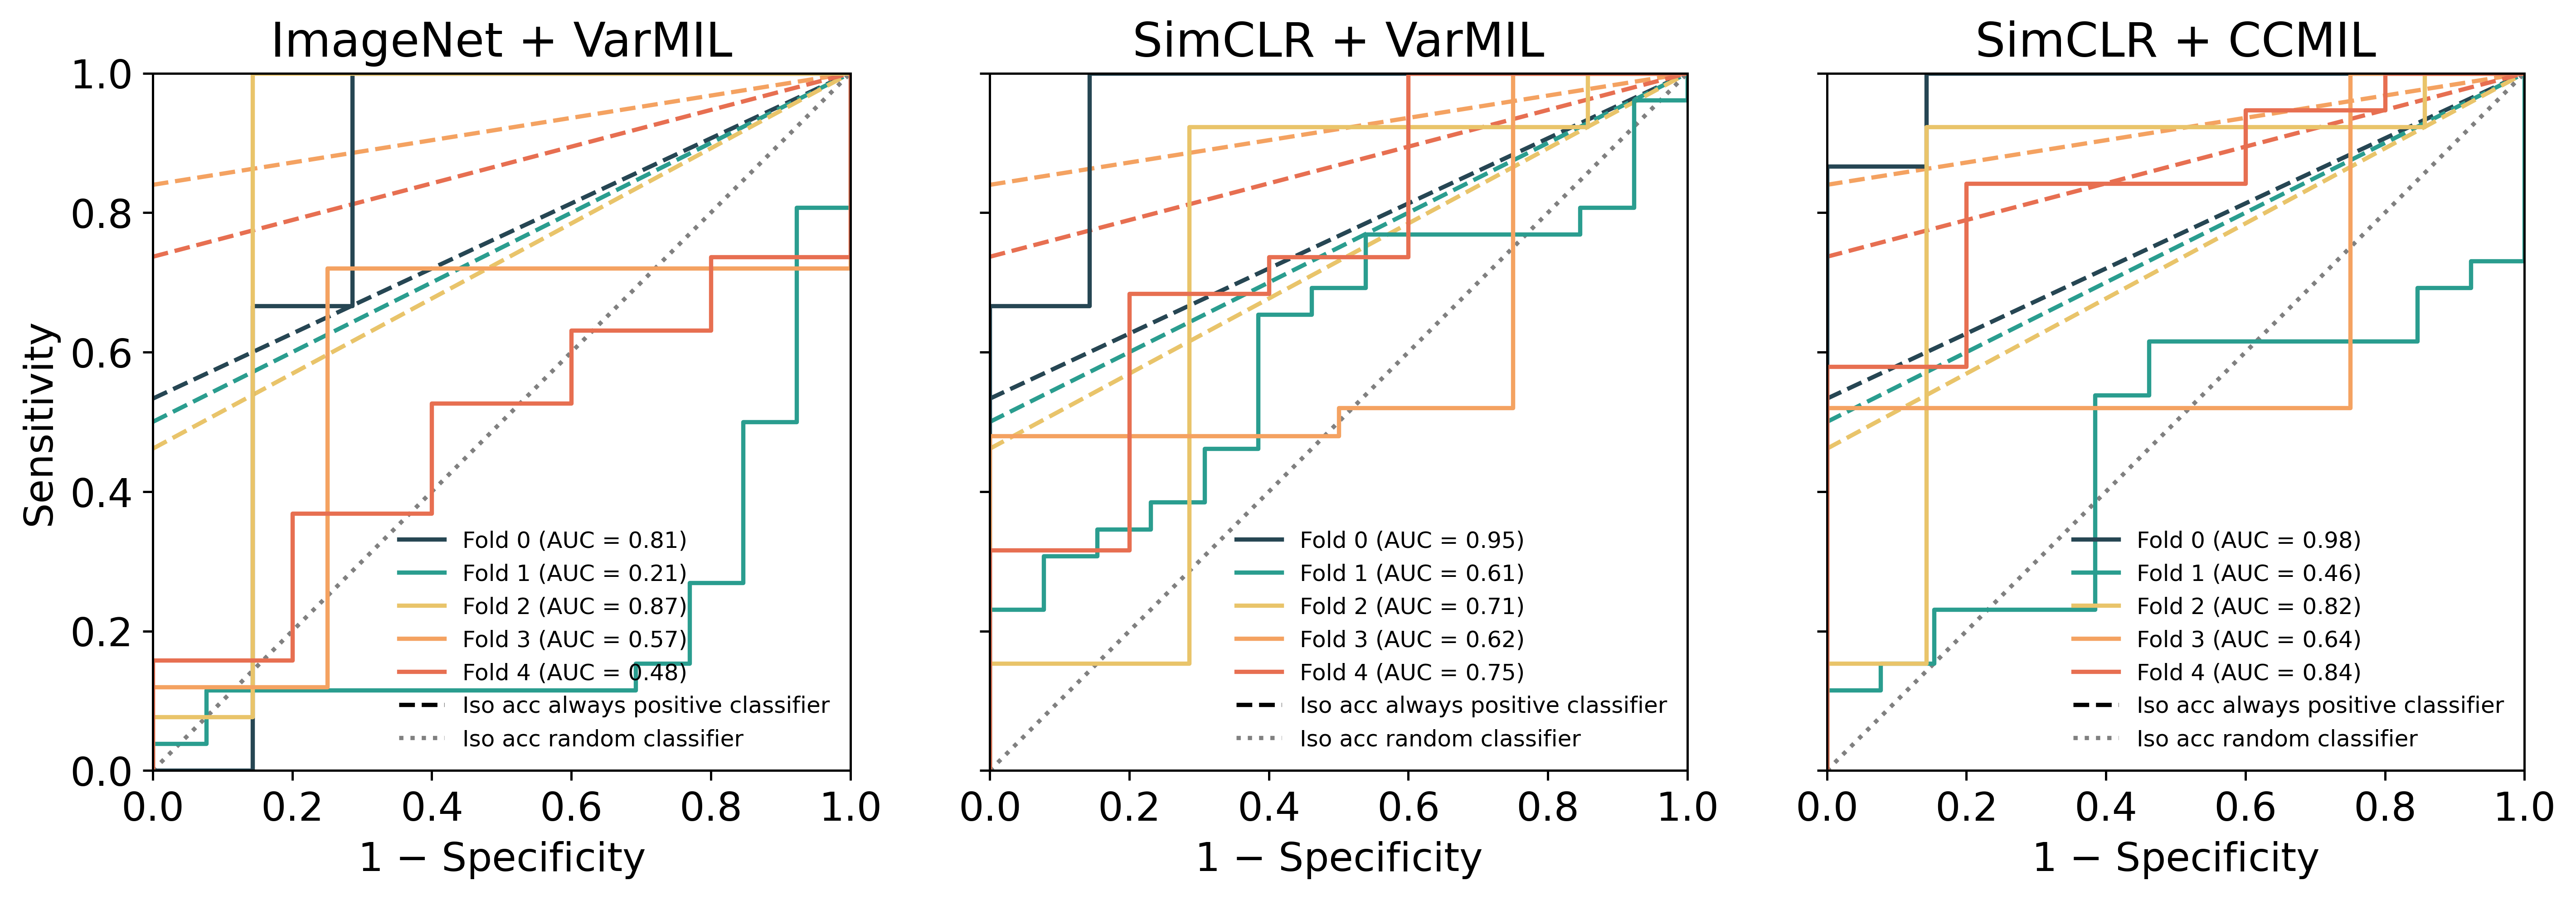

In [3]:
plt.style.use(['ipynb', "colors5-light"])
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Random lines
(l,) = ax1.plot((0, 1), (0, 1), color="gray", linestyle="dotted")
(l,) = ax2.plot((0, 1), (0, 1), color="gray", linestyle="dotted")
(l,) = ax3.plot((0, 1), (0, 1), color="gray", linestyle="dotted")

x = np.arange(0, 1, 0.01)

# IMAGENET + VARMIL
for fold in [0, 1, 2, 3, 4]:
    metrics = experiments["imagenet+varmil"][fold]
    tpr = np.array(metrics["roccurve"]["tpr"])
    fpr = np.array(metrics["roccurve"]["fpr"])
    prgauc = metrics["auc"]
    line, = ax1.plot(fpr, tpr, label=f"Fold {fold} (AUC = {prgauc:.2f})")

    target_hist, _ = np.histogram(metrics["target"], bins=[0, 1, 2])
    pos_per_N = target_hist[1] / len(metrics["target"])
    iso_acc_always_positive = (1 - pos_per_N) / pos_per_N * x + 2 - 1 / pos_per_N
    iso_acc_always_positive_line, = ax1.plot(x, iso_acc_always_positive, linestyle="--", zorder=-2, color=line.get_color())

handles, labels = ax1.get_legend_handles_labels()
handles.extend([iso_acc_always_positive_line, l])
labels.extend(["Iso acc always positive classifier", "Iso acc random classifier"])

ax1.set_title("ImageNet + VarMIL")
legend = ax1.legend(handles=handles, labels=labels, loc="lower right", fontsize=8)
legend.legend_handles[-2].set_color("black")
legend.legend_handles[-2].set_alpha(1)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_ylabel("Sensitivity")
ax1.set_xlabel("1 $-$ Specificity")
ax1.set_aspect("equal")

# SIMCLR + VARMIL
for fold in [0, 1, 2, 3, 4]:
    metrics = experiments["simclr+varmil"][fold]
    tpr = np.array(metrics["roccurve"]["tpr"])
    fpr = np.array(metrics["roccurve"]["fpr"])
    prgauc = metrics["auc"]
    line, = ax2.plot(fpr, tpr, label=f"Fold {fold} (AUC = {prgauc:.2f})")

    target_hist, _ = np.histogram(metrics["target"], bins=[0, 1, 2])
    pos_per_N = target_hist[1] / len(metrics["target"])
    iso_acc_always_positive = (1 - pos_per_N) / pos_per_N * x + 2 - 1 / pos_per_N
    iso_acc_always_positive_line, = ax2.plot(x, iso_acc_always_positive, linestyle="--", zorder=-2, color=line.get_color())

handles, labels = ax2.get_legend_handles_labels()
handles.extend([iso_acc_always_positive_line, l])
labels.extend(["Iso acc always positive classifier", "Iso acc random classifier"])

ax2.set_title("SimCLR + VarMIL")
legend = ax2.legend(handles=handles, labels=labels, loc="lower right", fontsize=8)
legend.legend_handles[-2].set_color("black")
legend.legend_handles[-2].set_alpha(1)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])
ax2.set_xlabel("1 $-$ Specificity")
ax2.set_aspect("equal")

# SIMCLR + CCMIL
for fold in [0, 1, 2, 3, 4]:
    metrics = experiments["simclr+ccmil"][fold]
    tpr = np.array(metrics["roccurve"]["tpr"])
    fpr = np.array(metrics["roccurve"]["fpr"])
    prgauc = metrics["auc"]
    line, = ax3.plot(fpr, tpr, label=f"Fold {fold} (AUC = {prgauc:.2f})")

    target_hist, _ = np.histogram(metrics["target"], bins=[0, 1, 2])
    pos_per_N = target_hist[1] / len(metrics["target"])
    iso_acc_always_positive = (1 - pos_per_N) / pos_per_N * x + 2 - 1 / pos_per_N
    iso_acc_always_positive_line, = ax3.plot(x, iso_acc_always_positive, linestyle="--", zorder=-2, color=line.get_color())


handles, labels = ax3.get_legend_handles_labels()
handles.extend([iso_acc_always_positive_line, l])
labels.extend(["Iso acc always positive classifier", "Iso acc random classifier"])

ax3.set_title("SimCLR + CCMIL")
legend = ax3.legend(handles=handles, labels=labels, loc="lower right", fontsize=8)
legend.legend_handles[-2].set_color("black")
legend.legend_handles[-2].set_alpha(1)
ax3.set_xlim([0.0, 1.0])
ax3.set_ylim([0.0, 1.0])
ax3.set_xlabel("1 $-$ Specificity")
ax3.set_aspect("equal")

fig.savefig("outputs/11/roc.pdf", dpi=300)

/scratch-local/sdejong/ipykernel_476279/541412396.py:11: RuntimeWarning: divide by zero encountered in divide
  y = f1_score * x / (2 * x - f1_score)
/scratch-local/sdejong/ipykernel_476279/541412396.py:35: RuntimeWarning: divide by zero encountered in divide
  precision_always_positive = f_always_positive * x / (2 * x - f_always_positive)
/scratch-local/sdejong/ipykernel_476279/541412396.py:69: RuntimeWarning: divide by zero encountered in divide
  precision_always_positive = f_always_positive * x / (2 * x - f_always_positive)
/scratch-local/sdejong/ipykernel_476279/541412396.py:103: RuntimeWarning: divide by zero encountered in divide
  precision_always_positive = f_always_positive * x / (2 * x - f_always_positive)


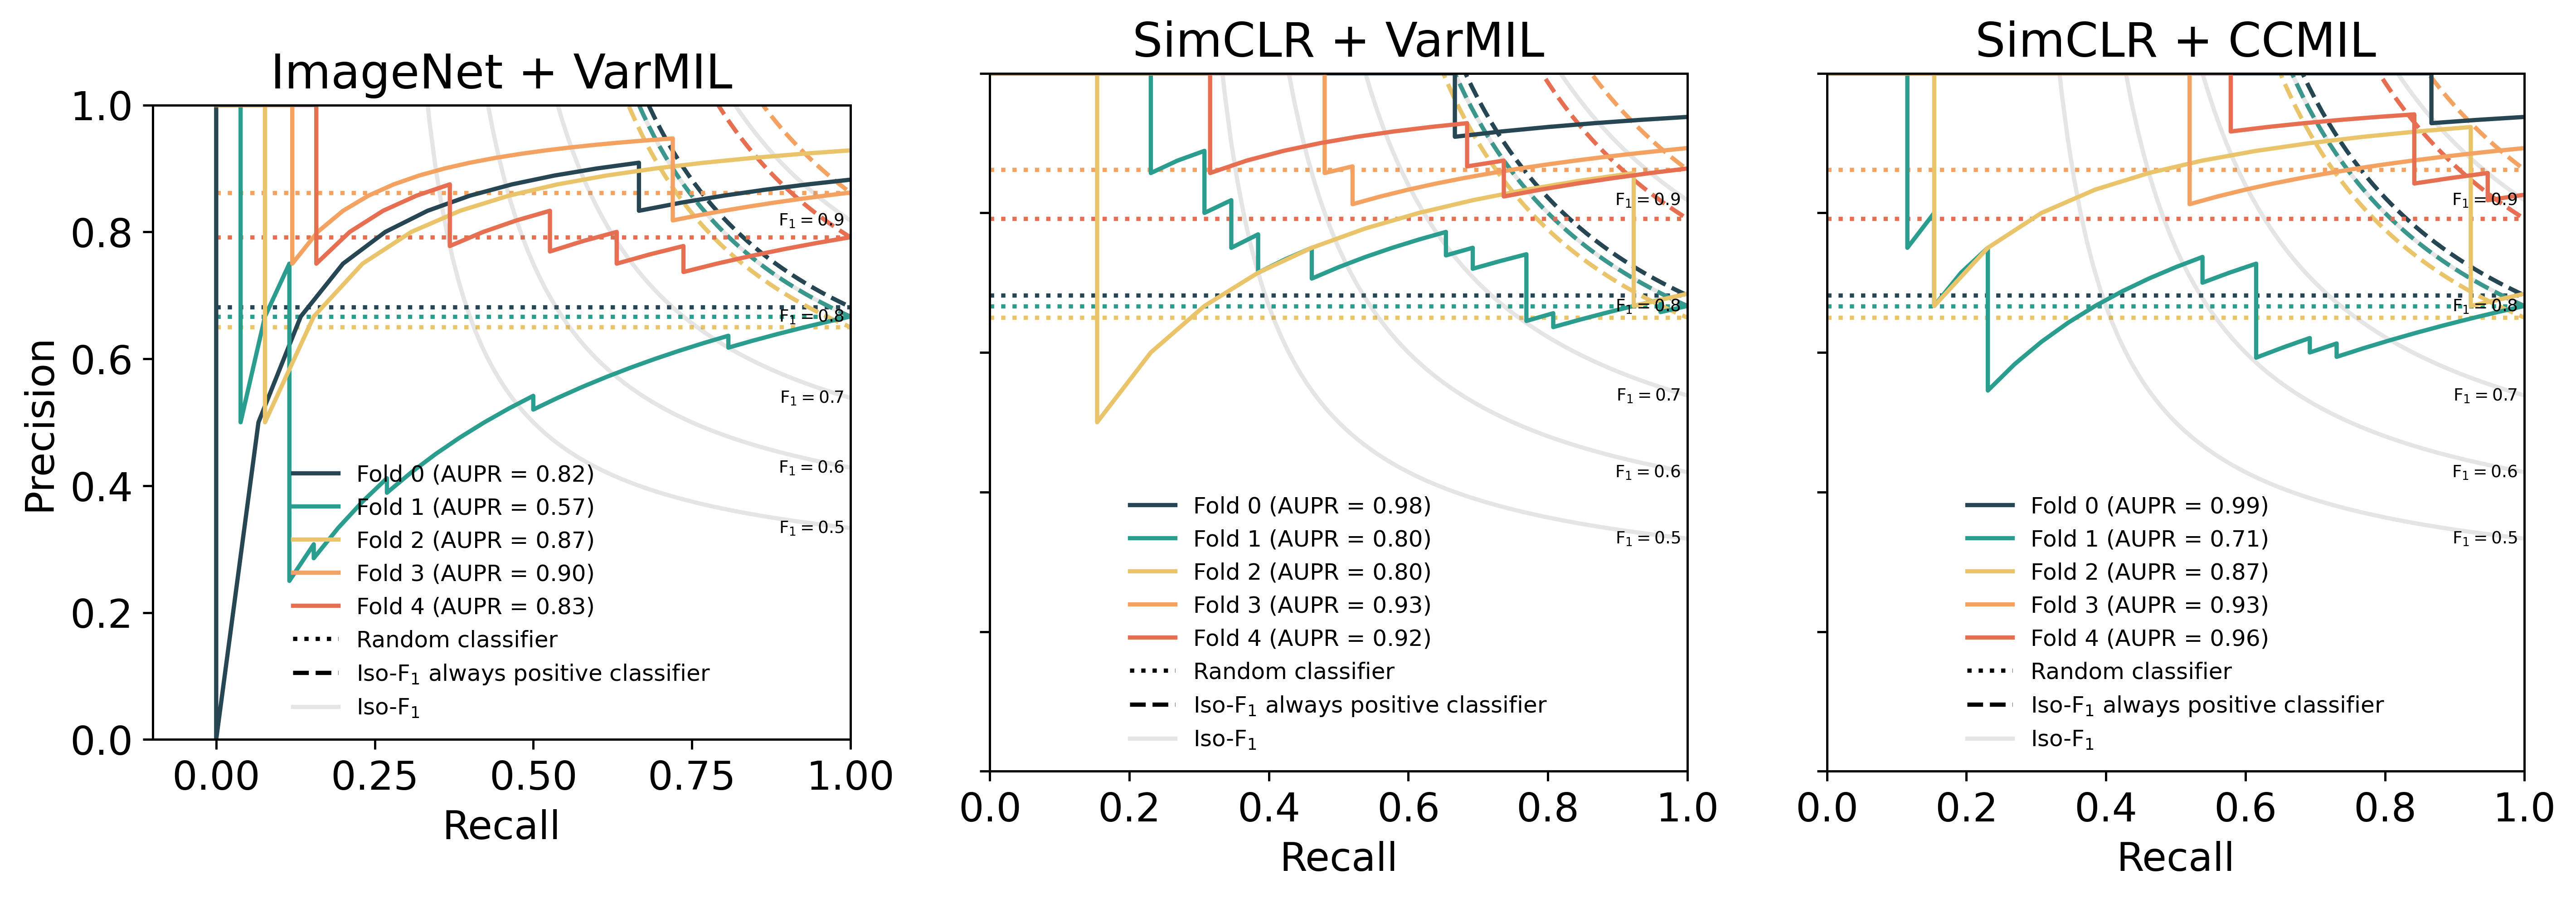

In [4]:
plt.style.use(['ipynb', "colors5-light"])
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# ax1.plot((0, 1), (0, 1), color="black", alpha=0.3)

# # Create iso-f1 lines (https://stats.stackexchange.com/questions/345204/iso-f1-curve-for-precision-recall-curve)
f1_scores = np.arange(0.5, 1, 0.1)
lines, labels = [], []
for f1_score in f1_scores:
    x = np.linspace(0.1, 1, 100)
    y = f1_score * x / (2 * x - f1_score)
    (l,) = ax1.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    (l,) = ax2.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    (l,) = ax3.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    ax1.annotate(f"F$_1={f1_score:0.1f}$", xy=(x[-1] - 0.01, y[-1]), fontsize=6, va="center", ha="right")
    ax2.annotate(f"F$_1={f1_score:0.1f}$", xy=(x[-1] - 0.01, y[-1]), fontsize=6, va="center", ha="right")
    ax3.annotate(f"F$_1={f1_score:0.1f}$", xy=(x[-1] - 0.01, y[-1]), fontsize=6, va="center", ha="right")


# IMAGENET + VARMIL
for fold in [0, 1, 2, 3, 4]:
    metrics = experiments["imagenet+varmil"][fold]
    precision = np.array(metrics["prcurve"]["precision"])
    recall = np.array(metrics["prcurve"]["recall"])
    prgauc = metrics["prauc"]
    (line,) = ax1.plot(recall, precision, label=f"Fold {fold} (AUPR = {prgauc:.2f})")

    # random baseline
    target_hist, _ = np.histogram(metrics["target"], bins=[0, 1, 2])
    random_baseline = target_hist[1] / len(metrics["target"])
    (random,) = ax1.plot((0, 1), (random_baseline, random_baseline), linestyle="dotted", zorder=-2, color=line.get_color())

    # always positive classifier
    f_always_positive = 2 * random_baseline / (1 + random_baseline)
    precision_always_positive = f_always_positive * x / (2 * x - f_always_positive)
    (apc,) = ax1.plot(x[precision_always_positive >= 0], precision_always_positive[precision_always_positive >= 0], linestyle="--", zorder=-2, color=line.get_color())

handles, labels = ax1.get_legend_handles_labels()
handles.extend([random, apc, l])
labels.extend(["Random classifier", "Iso-F$_1$ always positive classifier", "Iso-F$_1$"])

ax1.set_title("ImageNet + VarMIL")
legend = ax1.legend(handles=handles, labels=labels, loc="lower center", fontsize=8)
legend.legend_handles[-2].set_color("black")
legend.legend_handles[-2].set_alpha(1)
legend.legend_handles[-3].set_color("black")
legend.legend_handles[-3].set_alpha(1)
ax1.set_xlim([-0.1, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_ylabel("Precision")
ax1.set_xlabel("Recall")
ax1.set_aspect("equal")

# SIMCLR + VARMIL
for fold in [0, 1, 2, 3, 4]:
    metrics = experiments["simclr+varmil"][fold]
    precision = np.array(metrics["prcurve"]["precision"])
    recall = np.array(metrics["prcurve"]["recall"])
    prgauc = metrics["prauc"]
    (line,) = ax2.plot(recall, precision, label=f"Fold {fold} (AUPR = {prgauc:.2f})")

    # random baseline
    target_hist, _ = np.histogram(metrics["target"], bins=[0, 1, 2])
    random_baseline = target_hist[1] / len(metrics["target"])
    (random,) = ax2.plot((0, 1), (random_baseline, random_baseline), linestyle="dotted", zorder=-2, color=line.get_color())

    # always positive classifier
    f_always_positive = 2 * random_baseline / (1 + random_baseline)
    precision_always_positive = f_always_positive * x / (2 * x - f_always_positive)
    (apc,) = ax2.plot(x[precision_always_positive >= 0], precision_always_positive[precision_always_positive >= 0], linestyle="--", zorder=-2, color=line.get_color())


handles, labels = ax2.get_legend_handles_labels()
handles.extend([random, apc, l])
labels.extend(["Random classifier", "Iso-F$_1$ always positive classifier", "Iso-F$_1$"])

ax2.set_title("SimCLR + VarMIL")
legend = ax2.legend(handles=handles, labels=labels, loc="lower center", fontsize=8)
legend.legend_handles[-2].set_color("black")
legend.legend_handles[-2].set_alpha(1)
legend.legend_handles[-3].set_color("black")
legend.legend_handles[-3].set_alpha(1)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])
ax2.set_xlabel("Recall")
ax2.set_aspect("equal")

# SIMCLR + CCMIL
for fold in [0, 1, 2, 3, 4]:
    metrics = experiments["simclr+ccmil"][fold]
    precision = np.array(metrics["prcurve"]["precision"])
    recall = np.array(metrics["prcurve"]["recall"])
    prgauc = metrics["prauc"]
    (line,) = ax3.plot(recall, precision, label=f"Fold {fold} (AUPR = {prgauc:.2f})")

    # random baseline
    target_hist, _ = np.histogram(metrics["target"], bins=[0, 1, 2])
    random_baseline = target_hist[1] / len(metrics["target"])
    (random,) = ax3.plot((0, 1), (random_baseline, random_baseline), linestyle="dotted", zorder=-2, color=line.get_color())

    # always positive classifier
    f_always_positive = 2 * random_baseline / (1 + random_baseline)
    precision_always_positive = f_always_positive * x / (2 * x - f_always_positive)
    (apc,) = ax3.plot(x[precision_always_positive >= 0], precision_always_positive[precision_always_positive >= 0], linestyle="--", zorder=-2, color=line.get_color())


handles, labels = ax3.get_legend_handles_labels()
handles.extend([random, apc, l])
labels.extend(["Random classifier", "Iso-F$_1$ always positive classifier", "Iso-F$_1$"])

ax3.set_title("SimCLR + CCMIL")
legend = ax3.legend(handles=handles, labels=labels, loc="lower center", fontsize=8)
legend.legend_handles[-2].set_color("black")
legend.legend_handles[-2].set_alpha(1)
legend.legend_handles[-3].set_color("black")
legend.legend_handles[-3].set_alpha(1)
ax3.set_xlim([0.0, 1.0])
ax3.set_ylim([0.0, 1.0])
ax3.set_xlabel("Recall")
ax3.set_aspect("equal")

fig.savefig("outputs/11/pr.pdf", dpi=300)

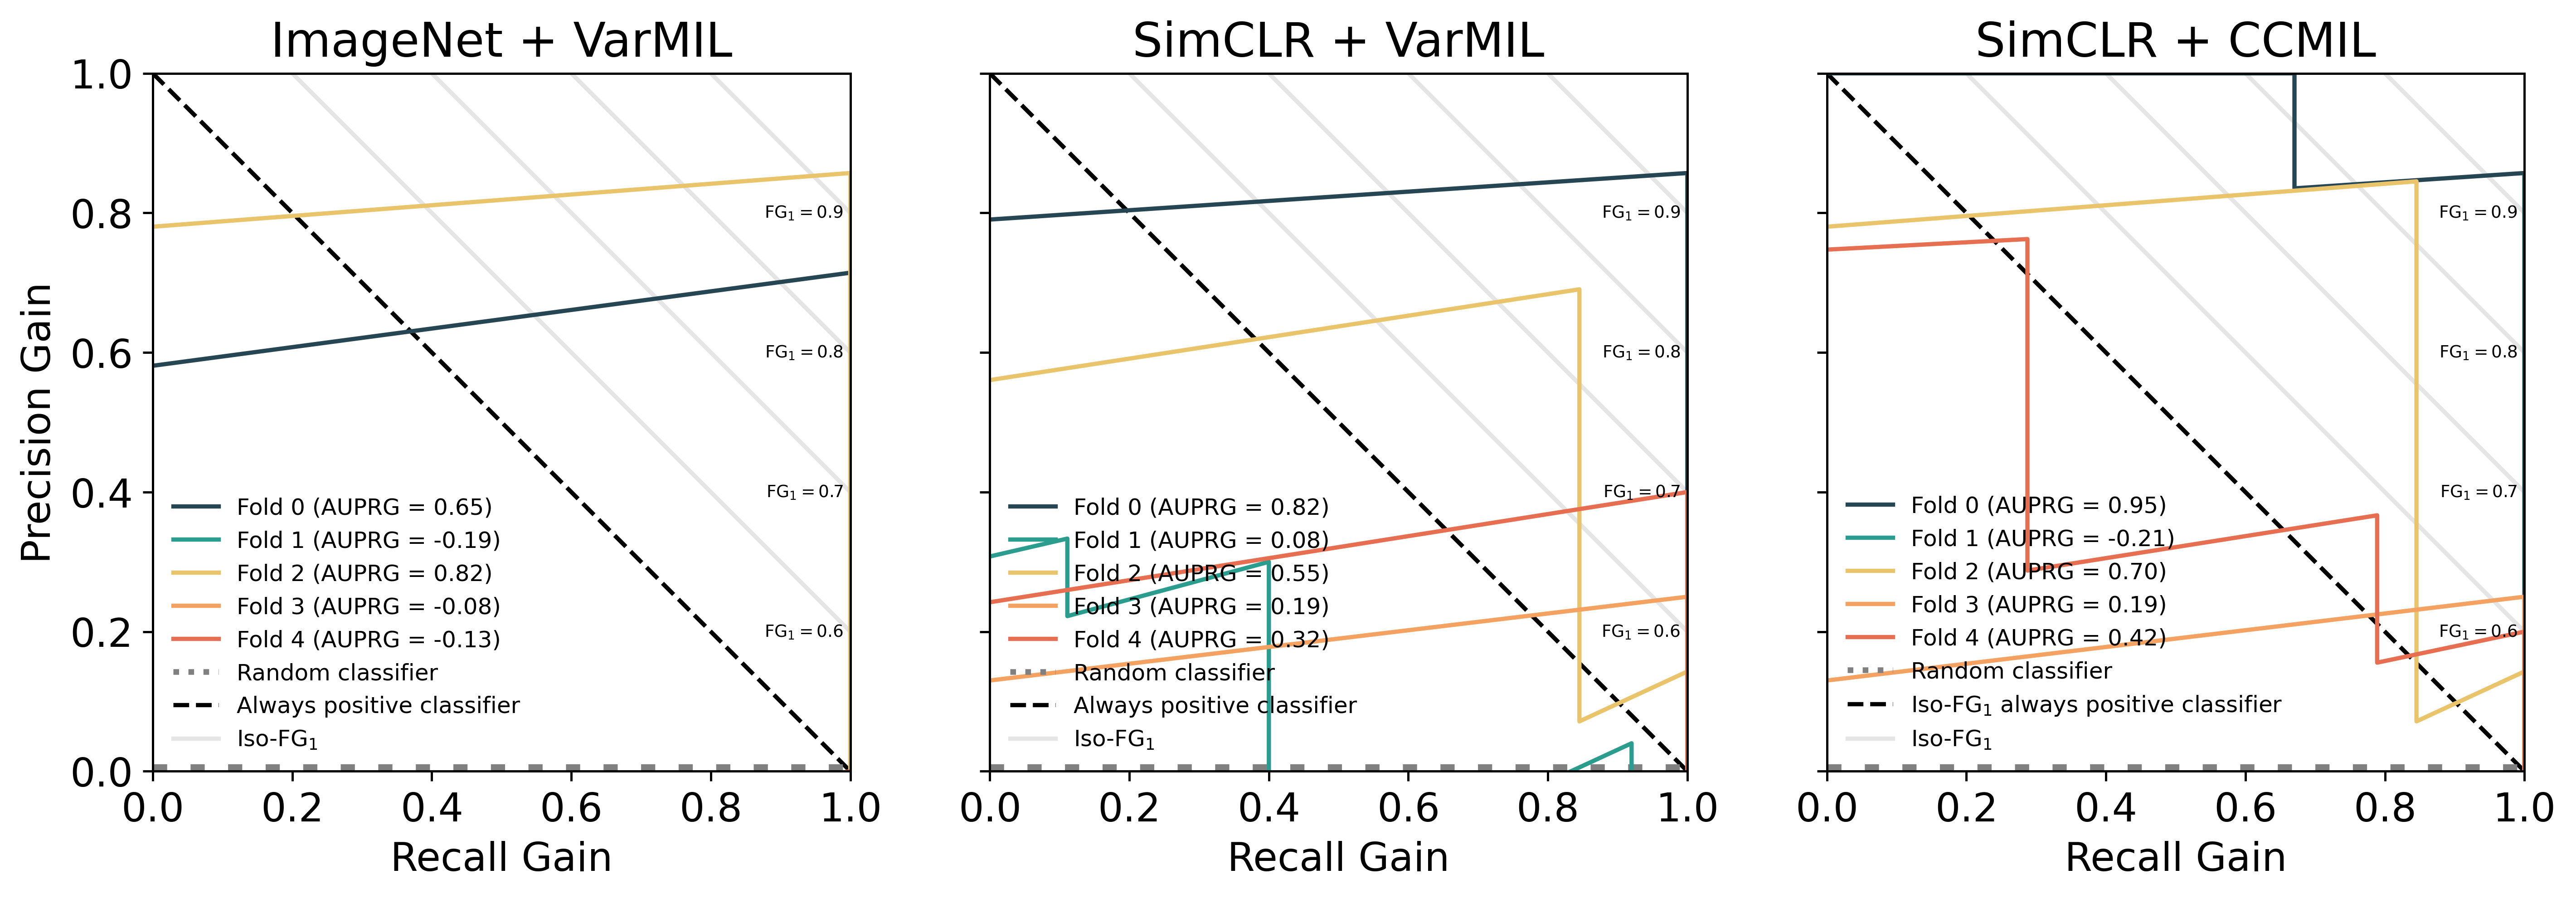

In [5]:
plt.style.use(['ipynb', "colors5-light"])
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

fg1_scores = np.arange(0.6, 1, 0.1)
lines, labels = [], []
for fg1_score in fg1_scores:
    x = np.linspace(0.1, 1, 100)
    y = 2 * fg1_score - x
    (l,) = ax1.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    (l,) = ax2.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    (l,) = ax3.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    ax1.annotate(f"FG$_1={fg1_score:0.1f}$", xy=(x[-1] - 0.01, y[-1]), fontsize=6, va="center", ha="right")
    ax2.annotate(f"FG$_1={fg1_score:0.1f}$", xy=(x[-1] - 0.01, y[-1]), fontsize=6, va="center", ha="right")
    ax3.annotate(f"FG$_1={fg1_score:0.1f}$", xy=(x[-1] - 0.01, y[-1]), fontsize=6, va="center", ha="right")

(baseline,) = ax1.plot((0, 1), (1, 0), color="black", linestyle="dashed")
(baseline,) = ax2.plot((0, 1), (1, 0), color="black", linestyle="dashed")
(baseline,) = ax3.plot((0, 1), (1, 0), color="black", linestyle="dashed")

(random,) = ax1.plot((0, 1), (0, 0), color="gray", linestyle="dotted", linewidth=5)
(random,) = ax2.plot((0, 1), (0, 0), color="gray", linestyle="dotted", linewidth=5)
(random,) = ax3.plot((0, 1), (0, 0), color="gray", linestyle="dotted", linewidth=5)

# IMAGENET + VARMIL
for fold in [0, 1, 2, 3, 4]:
    metrics = experiments["imagenet+varmil"][fold]
    precision = np.array(metrics["prgcurve"]["precision_gain"])
    recall = np.array(metrics["prgcurve"]["recall_gain"])
    prgauc = metrics["prgauc"]
    line = ax1.plot(recall, precision, label=f"Fold {fold} (AUPRG = {prgauc:.2f})")


handles, labels = ax1.get_legend_handles_labels()
handles.extend([random, baseline, l])
labels.extend(["Random classifier", "Always positive classifier", "Iso-FG$_1$"])

ax1.set_title("ImageNet + VarMIL")
legend = ax1.legend(handles=handles, labels=labels, loc="lower left", fontsize=8)
legend.legend_handles[-3].set_linewidth(2)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_ylabel("Precision Gain")
ax1.set_xlabel("Recall Gain")
ax1.set_aspect("equal")

# SIMCLR + VARMIL
for fold in [0, 1, 2, 3, 4]:
    metrics = experiments["simclr+varmil"][fold]
    precision = np.array(metrics["prgcurve"]["precision_gain"])
    recall = np.array(metrics["prgcurve"]["recall_gain"])
    prgauc = metrics["prgauc"]
    line = ax2.plot(recall, precision, label=f"Fold {fold} (AUPRG = {prgauc:.2f})")


handles, labels = ax2.get_legend_handles_labels()
handles.extend([random, baseline, l])
labels.extend(["Random classifier", "Always positive classifier", "Iso-FG$_1$"])

ax2.set_title("SimCLR + VarMIL")
legend = ax2.legend(handles=handles, labels=labels, loc="lower left", fontsize=8)
legend.legend_handles[-3].set_linewidth(2)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])
ax2.set_xlabel("Recall Gain")
ax2.set_aspect("equal")

# SIMCLR + CCMIL
for fold in [0, 1, 2, 3, 4]:
    metrics = experiments["simclr+ccmil"][fold]
    precision = np.array(metrics["prgcurve"]["precision_gain"])
    recall = np.array(metrics["prgcurve"]["recall_gain"])
    prgauc = metrics["prgauc"]
    line = ax3.plot(recall, precision, label=f"Fold {fold} (AUPRG = {prgauc:.2f})")


handles, labels = ax3.get_legend_handles_labels()
handles.extend([random, baseline, l])
labels.extend(["Random classifier", "Iso-FG$_1$ always positive classifier", "Iso-FG$_1$"])

ax3.set_title("SimCLR + CCMIL")
legend = ax3.legend(handles=handles, labels=labels, loc="lower left", fontsize=8)
legend.legend_handles[-3].set_linewidth(2)
ax3.set_xlim([0.0, 1.0])
ax3.set_ylim([0.0, 1.0])
ax3.set_xlabel("Recall Gain")
ax3.set_aspect("equal")

fig.savefig("outputs/11/prg.pdf", dpi=300)

In [6]:
all_roc_auc = {}
for exp in ["imagenet+varmil", "simclr+varmil", "simclr+ccmil"]:
    all_roc_auc[exp] = []
    for fold in [0, 1, 2, 3, 4]:
        metrics = experiments[exp][fold]
        auc = metrics["auc"]
        all_roc_auc[exp].append(auc)

all_pr_auc = {}
for exp in ["imagenet+varmil", "simclr+varmil", "simclr+ccmil"]:
    all_pr_auc[exp] = []
    for fold in [0, 1, 2, 3, 4]:
        metrics = experiments[exp][fold]
        prauc = metrics["prauc"]
        all_pr_auc[exp].append(prauc)

all_prg_auc = {}
for exp in ["imagenet+varmil", "simclr+varmil", "simclr+ccmil"]:
    all_prg_auc[exp] = []
    for fold in [0, 1, 2, 3, 4]:
        metrics = experiments[exp][fold]
        prgauc = metrics["prgauc"]
        all_prg_auc[exp].append(prgauc)

In [7]:
for exp in ["imagenet+varmil", "simclr+varmil", "simclr+ccmil"]:
    print(exp)
    print("ROC")
    print(compute_mean_and_confidence_interval(all_roc_auc[exp]))

    print("PR")
    print(compute_mean_and_confidence_interval(all_pr_auc[exp]))

    print("PRG")
    print(compute_mean_and_confidence_interval(all_prg_auc[exp]))
    print("\n")

imagenet+varmil
ROC
(0.5877933502197266, 0.3306925645017711)
PR
(0.7963726401329041, 0.16413890779299084)
PRG
(0.2119769019618644, 0.5976303532564574)


simclr+varmil
ROC
(0.7287004947662353, 0.17184996880290862)
PR
(0.8837833404541016, 0.10148362350135037)
PRG
(0.3920070827047268, 0.36894736651575216)


simclr+ccmil
ROC
(0.7497543752193451, 0.25036867546056346)
PR
(0.8924514174461364, 0.13988145115269196)
PRG
(0.41059973522572174, 0.5580087684103231)




/scratch-local/sdejong/ipykernel_476279/3636712117.py:96: RuntimeWarning: divide by zero encountered in divide
  y = f1_score * x / (2 * x - f1_score)
/scratch-local/sdejong/ipykernel_476279/3636712117.py:120: RuntimeWarning: divide by zero encountered in divide
  precision_always_positive = f_always_positive * x / (2 * x - f_always_positive)
/scratch-local/sdejong/ipykernel_476279/3636712117.py:154: RuntimeWarning: divide by zero encountered in divide
  precision_always_positive = f_always_positive * x / (2 * x - f_always_positive)
/scratch-local/sdejong/ipykernel_476279/3636712117.py:187: RuntimeWarning: divide by zero encountered in divide
  precision_always_positive = f_always_positive * x / (2 * x - f_always_positive)


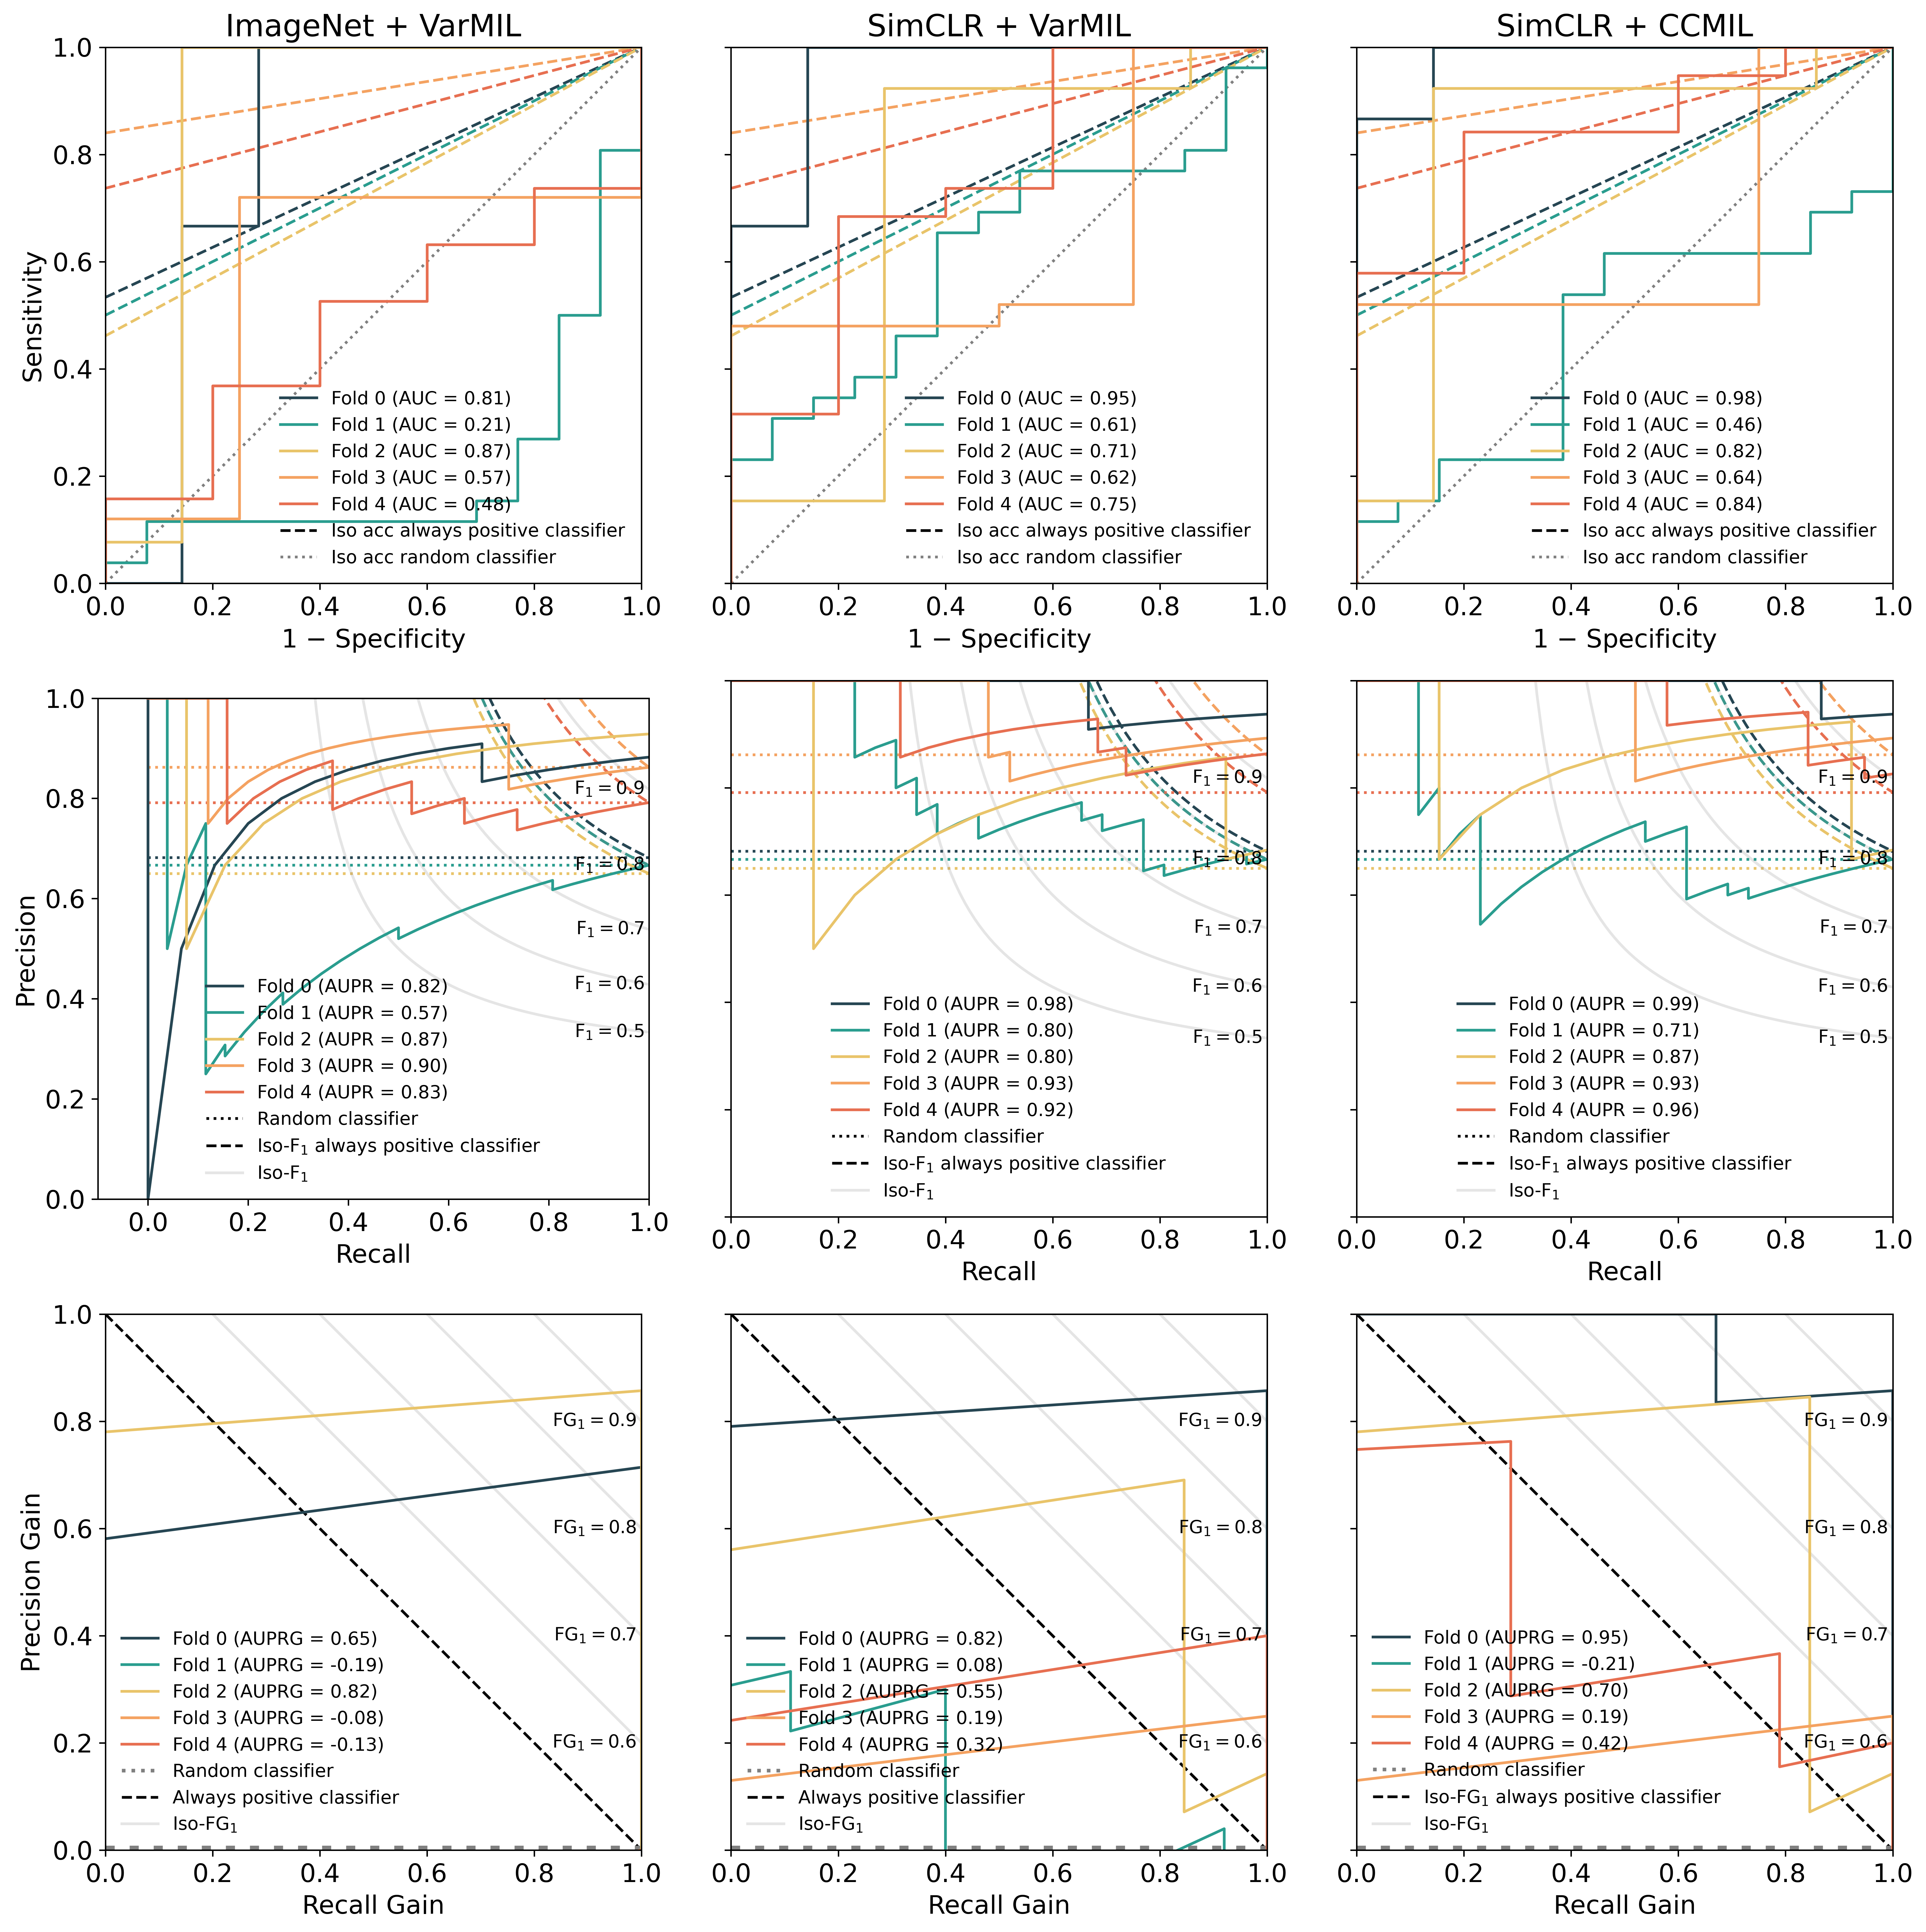

In [8]:
plt.style.use(['ipynb', "colors5-light"])
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(15, 15), sharey="row")

# Random lines
(l,) = ax1.plot((0, 1), (0, 1), color="gray", linestyle="dotted")
(l,) = ax2.plot((0, 1), (0, 1), color="gray", linestyle="dotted")
(l,) = ax3.plot((0, 1), (0, 1), color="gray", linestyle="dotted")

x = np.arange(0, 1, 0.01)

# IMAGENET + VARMIL
for fold in [0, 1, 2, 3, 4]:
    metrics = experiments["imagenet+varmil"][fold]
    tpr = np.array(metrics["roccurve"]["tpr"])
    fpr = np.array(metrics["roccurve"]["fpr"])
    prgauc = metrics["auc"]
    line, = ax1.plot(fpr, tpr, label=f"Fold {fold} (AUC = {prgauc:.2f})")

    target_hist, _ = np.histogram(metrics["target"], bins=[0, 1, 2])
    pos_per_N = target_hist[1] / len(metrics["target"])
    iso_acc_always_positive = (1 - pos_per_N) / pos_per_N * x + 2 - 1 / pos_per_N
    iso_acc_always_positive_line, = ax1.plot(x, iso_acc_always_positive, linestyle="--", zorder=-2, color=line.get_color())

handles, labels = ax1.get_legend_handles_labels()
handles.extend([iso_acc_always_positive_line, l])
labels.extend(["Iso acc always positive classifier", "Iso acc random classifier"])

ax1.set_title("ImageNet + VarMIL")
legend = ax1.legend(handles=handles, labels=labels, loc="lower right", fontsize=10)
legend.legend_handles[-2].set_color("black")
legend.legend_handles[-2].set_alpha(1)
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.0])
ax1.set_ylabel("Sensitivity")
ax1.set_xlabel("1 $-$ Specificity")
ax1.set_aspect("equal")

# SIMCLR + VARMIL
for fold in [0, 1, 2, 3, 4]:
    metrics = experiments["simclr+varmil"][fold]
    tpr = np.array(metrics["roccurve"]["tpr"])
    fpr = np.array(metrics["roccurve"]["fpr"])
    prgauc = metrics["auc"]
    line, = ax2.plot(fpr, tpr, label=f"Fold {fold} (AUC = {prgauc:.2f})")

    target_hist, _ = np.histogram(metrics["target"], bins=[0, 1, 2])
    pos_per_N = target_hist[1] / len(metrics["target"])
    iso_acc_always_positive = (1 - pos_per_N) / pos_per_N * x + 2 - 1 / pos_per_N
    iso_acc_always_positive_line, = ax2.plot(x, iso_acc_always_positive, linestyle="--", zorder=-2, color=line.get_color())

handles, labels = ax2.get_legend_handles_labels()
handles.extend([iso_acc_always_positive_line, l])
labels.extend(["Iso acc always positive classifier", "Iso acc random classifier"])

ax2.set_title("SimCLR + VarMIL")
legend = ax2.legend(handles=handles, labels=labels, loc="lower right", fontsize=10)
legend.legend_handles[-2].set_color("black")
legend.legend_handles[-2].set_alpha(1)
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.0])
ax2.set_xlabel("1 $-$ Specificity")
ax2.set_aspect("equal")

# SIMCLR + CCMIL
for fold in [0, 1, 2, 3, 4]:
    metrics = experiments["simclr+ccmil"][fold]
    tpr = np.array(metrics["roccurve"]["tpr"])
    fpr = np.array(metrics["roccurve"]["fpr"])
    prgauc = metrics["auc"]
    line, = ax3.plot(fpr, tpr, label=f"Fold {fold} (AUC = {prgauc:.2f})")

    target_hist, _ = np.histogram(metrics["target"], bins=[0, 1, 2])
    pos_per_N = target_hist[1] / len(metrics["target"])
    iso_acc_always_positive = (1 - pos_per_N) / pos_per_N * x + 2 - 1 / pos_per_N
    iso_acc_always_positive_line, = ax3.plot(x, iso_acc_always_positive, linestyle="--", zorder=-2, color=line.get_color())


handles, labels = ax3.get_legend_handles_labels()
handles.extend([iso_acc_always_positive_line, l])
labels.extend(["Iso acc always positive classifier", "Iso acc random classifier"])

ax3.set_title("SimCLR + CCMIL")
legend = ax3.legend(handles=handles, labels=labels, loc="lower right", fontsize=10)
legend.legend_handles[-2].set_color("black")
legend.legend_handles[-2].set_alpha(1)
ax3.set_xlim([0.0, 1.0])
ax3.set_ylim([0.0, 1.0])
ax3.set_xlabel("1 $-$ Specificity")
ax3.set_aspect("equal")

# # Create iso-f1 lines (https://stats.stackexchange.com/questions/345204/iso-f1-curve-for-precision-recall-curve)
f1_scores = np.arange(0.5, 1, 0.1)
lines, labels = [], []
for f1_score in f1_scores:
    x = np.linspace(0.1, 1, 100)
    y = f1_score * x / (2 * x - f1_score)
    (l,) = ax4.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    (l,) = ax5.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    (l,) = ax6.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    ax4.annotate(f"F$_1={f1_score:0.1f}$", xy=(x[-1] - 0.01, y[-1]), fontsize=10, va="center", ha="right")
    ax5.annotate(f"F$_1={f1_score:0.1f}$", xy=(x[-1] - 0.01, y[-1]), fontsize=10, va="center", ha="right")
    ax6.annotate(f"F$_1={f1_score:0.1f}$", xy=(x[-1] - 0.01, y[-1]), fontsize=10, va="center", ha="right")


# IMAGENET + VARMIL
for fold in [0, 1, 2, 3, 4]:
    metrics = experiments["imagenet+varmil"][fold]
    precision = np.array(metrics["prcurve"]["precision"])
    recall = np.array(metrics["prcurve"]["recall"])
    prgauc = metrics["prauc"]
    (line,) = ax4.plot(recall, precision, label=f"Fold {fold} (AUPR = {prgauc:.2f})")

    # random baseline
    target_hist, _ = np.histogram(metrics["target"], bins=[0, 1, 2])
    random_baseline = target_hist[1] / len(metrics["target"])
    (random,) = ax4.plot((0, 1), (random_baseline, random_baseline), linestyle="dotted", zorder=-2, color=line.get_color())

    # always positive classifier
    f_always_positive = 2 * random_baseline / (1 + random_baseline)
    precision_always_positive = f_always_positive * x / (2 * x - f_always_positive)
    (apc,) = ax4.plot(x[precision_always_positive >= 0], precision_always_positive[precision_always_positive >= 0], linestyle="--", zorder=-2, color=line.get_color())

handles, labels = ax4.get_legend_handles_labels()
handles.extend([random, apc, l])
labels.extend(["Random classifier", "Iso-F$_1$ always positive classifier", "Iso-F$_1$"])

legend = ax4.legend(handles=handles, labels=labels, loc="lower center", fontsize=10)
legend.legend_handles[-2].set_color("black")
legend.legend_handles[-2].set_alpha(1)
legend.legend_handles[-3].set_color("black")
legend.legend_handles[-3].set_alpha(1)
ax4.set_xlim([-0.1, 1.0])
ax4.set_ylim([0.0, 1.0])
ax4.ticklabel_format(scilimits=(-5, 8))
ax4.set_ylabel("Precision")
ax4.set_xlabel("Recall")
ax4.set_aspect("equal")

# SIMCLR + VARMIL
for fold in [0, 1, 2, 3, 4]:
    metrics = experiments["simclr+varmil"][fold]
    precision = np.array(metrics["prcurve"]["precision"])
    recall = np.array(metrics["prcurve"]["recall"])
    prgauc = metrics["prauc"]
    (line,) = ax5.plot(recall, precision, label=f"Fold {fold} (AUPR = {prgauc:.2f})")

    # random baseline
    target_hist, _ = np.histogram(metrics["target"], bins=[0, 1, 2])
    random_baseline = target_hist[1] / len(metrics["target"])
    (random,) = ax5.plot((0, 1), (random_baseline, random_baseline), linestyle="dotted", zorder=-2, color=line.get_color())

    # always positive classifier
    f_always_positive = 2 * random_baseline / (1 + random_baseline)
    precision_always_positive = f_always_positive * x / (2 * x - f_always_positive)
    (apc,) = ax5.plot(x[precision_always_positive >= 0], precision_always_positive[precision_always_positive >= 0], linestyle="--", zorder=-2, color=line.get_color())


handles, labels = ax5.get_legend_handles_labels()
handles.extend([random, apc, l])
labels.extend(["Random classifier", "Iso-F$_1$ always positive classifier", "Iso-F$_1$"])

legend = ax5.legend(handles=handles, labels=labels, loc="lower center", fontsize=10)
legend.legend_handles[-2].set_color("black")
legend.legend_handles[-2].set_alpha(1)
legend.legend_handles[-3].set_color("black")
legend.legend_handles[-3].set_alpha(1)
ax5.set_xlim([0.0, 1.0])
ax5.set_ylim([0.0, 1.0])
ax5.set_xlabel("Recall")
ax5.set_aspect("equal")

# SIMCLR + CCMIL
for fold in [0, 1, 2, 3, 4]:
    metrics = experiments["simclr+ccmil"][fold]
    precision = np.array(metrics["prcurve"]["precision"])
    recall = np.array(metrics["prcurve"]["recall"])
    prgauc = metrics["prauc"]
    (line,) = ax6.plot(recall, precision, label=f"Fold {fold} (AUPR = {prgauc:.2f})")

    # random baseline
    target_hist, _ = np.histogram(metrics["target"], bins=[0, 1, 2])
    random_baseline = target_hist[1] / len(metrics["target"])
    (random,) = ax6.plot((0, 1), (random_baseline, random_baseline), linestyle="dotted", zorder=-2, color=line.get_color())

    # always positive classifier
    f_always_positive = 2 * random_baseline / (1 + random_baseline)
    precision_always_positive = f_always_positive * x / (2 * x - f_always_positive)
    (apc,) = ax6.plot(x[precision_always_positive >= 0], precision_always_positive[precision_always_positive >= 0], linestyle="--", zorder=-2, color=line.get_color())


handles, labels = ax6.get_legend_handles_labels()
handles.extend([random, apc, l])
labels.extend(["Random classifier", "Iso-F$_1$ always positive classifier", "Iso-F$_1$"])

legend = ax6.legend(handles=handles, labels=labels, loc="lower center", fontsize=10)
legend.legend_handles[-2].set_color("black")
legend.legend_handles[-2].set_alpha(1)
legend.legend_handles[-3].set_color("black")
legend.legend_handles[-3].set_alpha(1)
ax6.set_xlim([0.0, 1.0])
ax6.set_ylim([0.0, 1.0])
ax6.set_xlabel("Recall")
ax6.set_aspect("equal")

fg1_scores = np.arange(0.6, 1, 0.1)
lines, labels = [], []
for fg1_score in fg1_scores:
    x = np.linspace(0.1, 1, 100)
    y = 2 * fg1_score - x
    (l,) = ax7.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    (l,) = ax8.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    (l,) = ax9.plot(x[y >= 0], y[y >= 0], color="gray", alpha=0.2)
    ax7.annotate(f"FG$_1={fg1_score:0.1f}$", xy=(x[-1] - 0.01, y[-1]), fontsize=10, va="center", ha="right")
    ax8.annotate(f"FG$_1={fg1_score:0.1f}$", xy=(x[-1] - 0.01, y[-1]), fontsize=10, va="center", ha="right")
    ax9.annotate(f"FG$_1={fg1_score:0.1f}$", xy=(x[-1] - 0.01, y[-1]), fontsize=10, va="center", ha="right")

(baseline,) = ax7.plot((0, 1), (1, 0), color="black", linestyle="dashed")
(baseline,) = ax8.plot((0, 1), (1, 0), color="black", linestyle="dashed")
(baseline,) = ax9.plot((0, 1), (1, 0), color="black", linestyle="dashed")

(random,) = ax7.plot((0, 1), (0, 0), color="gray", linestyle="dotted", linewidth=5)
(random,) = ax8.plot((0, 1), (0, 0), color="gray", linestyle="dotted", linewidth=5)
(random,) = ax9.plot((0, 1), (0, 0), color="gray", linestyle="dotted", linewidth=5)

# IMAGENET + VARMIL
for fold in [0, 1, 2, 3, 4]:
    metrics = experiments["imagenet+varmil"][fold]
    precision = np.array(metrics["prgcurve"]["precision_gain"])
    recall = np.array(metrics["prgcurve"]["recall_gain"])
    prgauc = metrics["prgauc"]
    line = ax7.plot(recall, precision, label=f"Fold {fold} (AUPRG = {prgauc:.2f})")


handles, labels = ax7.get_legend_handles_labels()
handles.extend([random, baseline, l])
labels.extend(["Random classifier", "Always positive classifier", "Iso-FG$_1$"])

legend = ax7.legend(handles=handles, labels=labels, loc="lower left", fontsize=10)
legend.legend_handles[-3].set_linewidth(2)
ax7.set_xlim([0.0, 1.0])
ax7.set_ylim([0.0, 1.0])
ax7.set_ylabel("Precision Gain")
ax7.set_xlabel("Recall Gain")
ax7.set_aspect("equal")

# SIMCLR + VARMIL
for fold in [0, 1, 2, 3, 4]:
    metrics = experiments["simclr+varmil"][fold]
    precision = np.array(metrics["prgcurve"]["precision_gain"])
    recall = np.array(metrics["prgcurve"]["recall_gain"])
    prgauc = metrics["prgauc"]
    line = ax8.plot(recall, precision, label=f"Fold {fold} (AUPRG = {prgauc:.2f})")


handles, labels = ax8.get_legend_handles_labels()
handles.extend([random, baseline, l])
labels.extend(["Random classifier", "Always positive classifier", "Iso-FG$_1$"])

legend = ax8.legend(handles=handles, labels=labels, loc="lower left", fontsize=10)
legend.legend_handles[-3].set_linewidth(2)
ax8.set_xlim([0.0, 1.0])
ax8.set_ylim([0.0, 1.0])
ax8.set_xlabel("Recall Gain")
ax8.set_aspect("equal")

# SIMCLR + CCMIL
for fold in [0, 1, 2, 3, 4]:
    metrics = experiments["simclr+ccmil"][fold]
    precision = np.array(metrics["prgcurve"]["precision_gain"])
    recall = np.array(metrics["prgcurve"]["recall_gain"])
    prgauc = metrics["prgauc"]
    line = ax9.plot(recall, precision, label=f"Fold {fold} (AUPRG = {prgauc:.2f})")


handles, labels = ax9.get_legend_handles_labels()
handles.extend([random, baseline, l])
labels.extend(["Random classifier", "Iso-FG$_1$ always positive classifier", "Iso-FG$_1$"])

legend = ax9.legend(handles=handles, labels=labels, loc="lower left", fontsize=10)
legend.legend_handles[-3].set_linewidth(2)
ax9.set_xlim([0.0, 1.0])
ax9.set_ylim([0.0, 1.0])
ax9.set_xlabel("Recall Gain")
ax9.set_aspect("equal")

fig.tight_layout()
fig.savefig("outputs/11/all.pdf", dpi=300)

In [9]:
performance = {}
for model in ["imagenet+varmil", "simclr+varmil", "simclr+ccmil"]:
    performance[model] = {}
    auc = []
    prauc = []
    auprg = []
    for fold in range(5):
        metrics = experiments[model][fold]
        _auprg = metrics["prgauc"]
        _auc = metrics["auc"]
        _prauc = metrics["prauc"]
        auprg.append(_auprg)
        auc.append(_auc)
        prauc.append(_prauc)
    performance[model]["auprg"] = auprg
    performance[model]["auc"] = auc
    performance[model]["prauc"] = prauc

In [11]:
for metric in ["auc", "prauc", "auprg"]:
    print(metric)

    for model1, model2 in combinations(["imagenet+varmil", "simclr+varmil", "simclr+ccmil"], r=2):
        print(model1, "vs", model2)
        if performance[model1][metric] < performance[model2][metric]:
            smallest = performance[model1][metric]
            largest = performance[model2][metric]
        else:
            smallest = performance[model2][metric]
            largest = performance[model1][metric]
        print(st.ttest_ind(smallest, largest, equal_var=False, alternative="less"))

        print(np.mean(performance[model1][metric]), "+-", st.sem(performance[model1][metric]))
        print(np.mean(performance[model2][metric]), "+-", st.sem(performance[model2][metric]))
        print("\n")
    
    print("\n")

auc
imagenet+varmil vs simclr+varmil
Ttest_indResult(statistic=-1.049751832326569, pvalue=0.16708831881227335)
0.5877933502197266 +- 0.11910646599231502
0.7287004947662353 +- 0.061895683974153605


imagenet+varmil vs simclr+ccmil
Ttest_indResult(statistic=-1.0841323621005021, pvalue=0.15606633742673584)
0.5877933502197266 +- 0.11910646599231502
0.7497543752193451 +- 0.0901759861889028


simclr+varmil vs simclr+ccmil
Ttest_indResult(statistic=-0.19249347768637404, pvalue=0.4263788069708498)
0.7287004947662353 +- 0.061895683974153605
0.7497543752193451 +- 0.0901759861889028




prauc
imagenet+varmil vs simclr+varmil
Ttest_indResult(statistic=-1.2576097598752258, pvalue=0.1253914460114113)
0.7963726401329041 +- 0.05911836956030769
0.8837833404541016 +- 0.036551640553368875


imagenet+varmil vs simclr+ccmil
Ttest_indResult(statistic=-1.2369463194237649, pvalue=0.12601701949695177)
0.7963726401329041 +- 0.05911836956030769
0.8924514174461364 +- 0.05038149354756523


simclr+varmil vs simclr+